# Image and Text Analysis

This notebook contains code for preprocessing images and text, running analyses on images using Google's Cloud Vision API, performing topic modeling with text, and analyzing the text and image features associated with higher view counts.

# Preprocessing

To retrive image and message text data, I used the Telegram desktop application to export messages from the channel Rus_imperia that were posted between 15 February 2022 and 15 March 2022, along with the attached images.

To retrieve additional message metadata, including the view count, I used 4Cat to export messages from the same Telegram channel over the same time period.

This dataset include 53 images, 31 of which have associated message text.

Peeters, S. & Hagen, S. (2022). The 4CAT capture and analysis toolkit: A modular tool for transparent and traceable social media research. Computational Communication Research, 4(2), 571–589. http://dx.doi.org/10.2139/ssrn.3914892

Create photo_folder in Colab notebook, upload images to that folder from: https://github.com/smorrell6/ImageAnalysisSpring2024/tree/main/data/Telegram_Rus_imperia_15022022-15032022_Export16Jan2024/photos_deduplicated.

Upload message JSON from: https://github.com/smorrell6/ImageAnalysisSpring2024/blob/main/data/Telegram_Rus_imperia_15022022-15032022_Export16Jan2024/result.json

Upload message metadata from: https://github.com/smorrell6/ImageAnalysisSpring2024/blob/main/data/Telegram_Rus_imperia_15022022-15032022_Export16Jan2024_4Cat_Messages.csv

Upload Google API credientials from: https://github.com/smorrell6/ImageAnalysisSpring2024/blob/main/Google_API/analog-medium-410714-2f9b7b03559d.json

###Imports

Imports for the Google API and image embedding are in the sections where those analyses are performed as they are highly specific, and I don't need to run them to do the final data analyses. And because I am concerned about breaking that code.

General:

In [ ]:
#imports
import os
from os import listdir
import pandas as pd #https://favtutor.com/blogs/pandas-empty-dataframe
import json  #https://stackoverflow.com/questions/20199126/reading-json-from-a-file
import pprint

In [ ]:
import requests,pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from random import randint

In [ ]:
import matplotlib.dates as mdates

In [ ]:
from matplotlib.ticker import NullFormatter, FixedLocator

Text analysis:

In [ ]:
import string

In [ ]:
import re
from typing import Text

In [ ]:
import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
import spacy
from spacy.lang.ru.examples import sentences

In [ ]:
import transformers

In [ ]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector

In [ ]:
from collections import Counter
from collections import defaultdict

In [ ]:
import seaborn as sns

Image analysis:

In [ ]:
from PIL import Image

In [ ]:
!pip install keras

In [ ]:
#Code from https://cierra-andaur.medium.com/using-k-means-clustering-for-image-segmentation-fe86c3b39bf4
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

In [ ]:
# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
import imagesize

Multimodal Analysis:

In [ ]:
from torch.nn.functional import cosine_similarity

In [ ]:
import torch

In [ ]:
!pip install torchmetrics

In [ ]:
import torchmetrics
from torchmetrics.functional.pairwise import pairwise_cosine_similarity

In [ ]:
from torch.nn.functional import cosine_similarity

In [ ]:
import torch.nn.functional as F

In [ ]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

In [ ]:
from PIL import Image
import requests
from transformers import AutoProcessor, GroupViTModel

Statistical Analysis:

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

##Images

Images exported from the Telegram desktop application. Image analysis is complete and results are in the file Text&Image_Features_4April2024_Download28Jun24.csv

In [ ]:
#Import image files and add names to a dataframe
#code from https://www.geeksforgeeks.org/how-to-iterate-through-images-in-a-folder-python/
folder_dir = "/content/photo_folder"

df_images = pd.DataFrame() #https://favtutor.com/blogs/pandas-empty-dataframe

for images in os.listdir(folder_dir):
    # check if the image ends with jpg
    if (images.endswith(".jpg")):
      #add to dataframe
      new_row = pd.Series({"image": images}) #https://www.geeksforgeeks.org/python-pandas-dataframe-append/
      df_images = pd.concat([df_images, new_row.to_frame().T], ignore_index=True) #https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [ ]:
df_images.head()

image
0  photo_3954@05-03-2022_10-38-30.jpg
1  photo_3969@13-03-2022_15-15-29.jpg
2  photo_3934@24-02-2022_14-38-26.jpg
3  photo_3943@04-03-2022_17-31-04.jpg
4  photo_3920@15-02-2022_09-32-43.jpg

##Messages

Messages exported along with photos from the Telegram desktop application. Clean message text is in the file Text&Image_Features_4April2024_Download28Jun24.csv

In [ ]:
#importing message JSON file
with open('result.json') as f:  #https://stackoverflow.com/questions/20199126/reading-json-from-a-file
    dict_messages = json.load(f)
    #print(dict_messages)

In [ ]:
type(dict_messages)

dict

In [ ]:
dict_messages['messages'][1]

{'id': 9328,
 'type': 'message',
 'date': '2022-02-15T09:28:20',
 'date_unixtime': '1644935300',
 'edited': '2022-02-15T09:35:55',
 'edited_unixtime': '1644935755',
 'from': 'Русское Имперское Движение',
 'from_id': 'channel1123102972',
 'forwarded_from': 'История России',
 'photo': 'photos/photo_3919@15-02-2022_09-28-20.jpg',
 'width': 766,
 'height': 600,
 'text': 'Солдаты в мундирах разных времен, 1912 год.',
 'text_entities': [{'type': 'plain',
   'text': 'Солдаты в мундирах разных времен, 1912 год.'}]}

In [ ]:
dict_messages['messages'][1]['id']

9328

In [ ]:
dict_messages['messages'][1]['photo']

'photos/photo_3919@15-02-2022_09-28-20.jpg'

In [ ]:
dict_messages['messages'][1]['text']

'Солдаты в мундирах разных времен, 1912 год.'

In [ ]:
#filtering to only include messages with images that are in the image df

In [ ]:
df_messages_filtered = pd.DataFrame()

In [ ]:
list_index = 0
for message in dict_messages['messages']:
  #print(dict_messages['messages'][list_index])
  for ind in df_images.index:
    if 'photo' in dict_messages['messages'][list_index].keys(): #https://www.geeksforgeeks.org/python-check-whether-given-key-already-exists-in-a-dictionary/
      #print("has a photo")
      if df_images['image'][ind] in dict_messages['messages'][list_index]['photo']:
        #print(df_images['image'][ind])
        #print(dict_messages['messages'][list_index]['photo'])
        new_row = pd.Series({"id":dict_messages['messages'][list_index]['id'],
                            "image": df_images['image'][ind],
                            "text":dict_messages['messages'][list_index]['text']}) #https://www.geeksforgeeks.org/python-pandas-dataframe-append/
        df_messages_filtered = pd.concat([df_messages_filtered, new_row.to_frame().T], ignore_index=True) #https://pandas.pydata.org/docs/reference/api/pandas.concat.html
  list_index += 1


In [ ]:
df_messages_filtered.head()
#went from 53 images to 54 images because image photo_3927@21-02-2022_16-46-33.jpg is repeated
#in messages 	9347 and 9348

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  
0        Солдаты в мундирах разных времен, 1912 год.  
1  В Украине ввели уголовную ответственность за а...  
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...  
3  Люди,которые поддерживают марксизм / Лидеры ма...  
4  Рекомендации по снятию золотых зубных протезов...

In [ ]:
#cleaning text
#Removing numbers (https://www.geeksforgeeks.org/python-ways-to-remove-numeric-digits-from-given-string/)
def remove_numbers(text):
  text = str(text)
  res = ''.join([i for i in text if not i.isdigit()])
  return res

In [ ]:
#Code from https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
no_num_string = remove_numbers(df_messages_filtered['text'][0])
print(no_num_string)

Солдаты в мундирах разных времен,  год.


In [ ]:
#Removing stop words and lematizing text function (https://www.kaggle.com/code/alxmamaev/how-to-easy-preprocess-russian-text/script)
#Since most of the text is in Russian, I will process it all as though it is Russian and see what results I get with putting multiple languages
#into a topic model or other exploratory tool


nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Create lemmatizer and stopwords list
mystem = Mystem()
russian_stopwords = stopwords.words("russian")

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]

    text = " ".join(tokens)
    text = remove_emojis(text)
    text = text.strip() #https://www.freecodecamp.org/news/how-to-strip-trailing-whitespace-in-python/
    return text

In [ ]:
preprocessed_string = preprocess_text(no_num_string)

In [ ]:
print(preprocessed_string)

солдат мундир разный время год


In [ ]:
df_messages_filtered["clean_text"] = ''
df_messages_filtered.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text clean_text  
0        Солдаты в мундирах разных времен, 1912 год.             
1  В Украине ввели уголовную ответственность за а...             
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...             
3  Люди,которые поддерживают марксизм / Лидеры ма...             
4  Рекомендации по снятию золотых зубных протезов...

In [ ]:
#Iterating through the dataframe to process the text
for row in df_messages_filtered.index:
  #print(row)
  if type(df_messages_filtered['text'][row]) == float:  #the messages without text have the type float
    #print(df_messages_filtered['id'][row])
    df_messages_filtered['clean_text'][row] = ''  #making the pre-processed row for those messages blank
  else:
    df_messages_filtered['clean_text'][row] = remove_numbers(df_messages_filtered['text'][row])
    df_messages_filtered['clean_text'][row] = preprocess_text(df_messages_filtered['clean_text'][row])

In [ ]:
df_messages_filtered.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  
0                     солдат мундир разный время год  
1  украина вводить уголовный ответственность анти...  
2  настоящий любовь день влюбленный февраль год р...  
3  человек который поддерживать марксизм лидер ма...  
4  рекомендация снятие золотой зубной протез умир...

##Views

Metadata (including message text, number of views, and date) were exported from 4Cat. They are in the file Telegram_Rus_imperia_15022022-15032022_Export16Jan2024_4Cat_Messages.csv.

In [ ]:
#importing metadata file from 4Cat

In [ ]:
df_metadata = pd.read_csv('/content/Telegram_Rus_imperia_15022022-15032022_Export16Jan2024_4Cat_Messages.csv')

In [ ]:
df_metadata.head()

id    thread_id         chat      author author_username  author_name  \
0  9443  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   
1  9442  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   
2  9441  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   
3  9440  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   
4  9439  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   

   author_is_bot                                               body  reply_to  \
0          False  Запад начал атаку на Сербскую Православную Цер...       NaN   
1          False  Высадка российского десанта ВДВ в Гостомеле. К...       NaN   
2          False  Пока меня в личке знакомые изводят позавчерашн...       NaN   
3          False  Пожалуй, лучшая фотография с сегодняшнего авто...       NaN   
4          False                        https://t.me/bulbazhor/2267       NaN   

   views  ... unix_timestamp     timestamp_edited unix_timestamp_edited  \
0    584  ...     1647292768  2022-03-14 21:22:39          1.647293e+09   
1    735  ...     1647291978  2022-03-14 21:06:34          1.647292e+09   
2    543  ...     1647237348  2022-03-14 05:58:17          1.647237e+09   
3    456  ...     1647237070  2022-03-14 11:37:25          1.647258e+09   
4    522  ...     1647208324  2022-04-13 07:38:17          1.649835e+09   

   author_forwarded_from_name author_forwarded_from_username  \
0                         NaN                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         NaN                            NaN   

   timestamp_forwarded_from unix_timestamp_forwarded_from  attachment_type  \
0       2022-03-14 19:37:35                  1.647287e+09              url   
1                       NaN                           NaN            photo   
2       2022-03-13 18:30:05                  1.647196e+09              NaN   
3       2022-03-13 19:19:04                  1.647199e+09            photo   
4       2022-03-11 19:16:38                  1.647026e+09              url   

                                     attachment_data    attachment_filename  
0                                                NaN                    NaN  
1  {"id": 5296783519353256448, "dc_id": 2, "file_...  Rus_imperia-9442.jpeg  
2                                                NaN                    NaN  
3  {"id": 5292224561892408644, "dc_id": 2, "file_...  Rus_imperia-9440.jpeg  
4                                                NaN                    NaN  

[5 rows x 21 columns]

In [ ]:
print(df_metadata['attachment_type'].value_counts()['photo'])
#this number aligns with one image being sent in two different messages as above

54


##Combination

The combination of image text and metadata are available in the file Text&Image_Features_4April2024_Download28Jun24.csv

In [ ]:
df_features = df_messages_filtered

In [ ]:
df_features['views'] = ''

In [ ]:
df_features.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text views  
0                     солдат мундир разный время год        
1  украина вводить уголовный ответственность анти...        
2  настоящий любовь день влюбленный февраль год р...        
3  человек который поддерживать марксизм лидер ма...        
4  рекомендация снятие золотой зубной протез умир...

In [ ]:
#combining the df_messages_filtered and df_metadata based on the common id
for row in df_messages_filtered.index:
  for ind in df_metadata.index:
    if str(df_messages_filtered['id'][row]) in str(df_metadata['id'][ind]):
      #print(df_messages_filtered['id'][row])
      #print(df_metadata['id'][ind])
      df_features['views'][row] = df_metadata['views'][ind]


In [ ]:
df_features.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text views  
0                     солдат мундир разный время год   328  
1  украина вводить уголовный ответственность анти...   328  
2  настоящий любовь день влюбленный февраль год р...   335  
3  человек который поддерживать марксизм лидер ма...   345  
4  рекомендация снятие золотой зубной протез умир...   327

In [ ]:
df_features['clean_text'][42] #this might need additional cleaning

"[{' type ': ' bold ', ' text ': ' черный русь '}, '\\ n пчерный русь xiii – xiv век называть область лежать бассейн верхний течение неман город городно гродно ),  новгородок слоним волковыйский несвиж турийск турец ),  здитовый n пназвание происходить дремучий темный лес пуща покрывать некогда огромный пространство область n пдо xiii век черный русь входить состав полоцкий княжество х год черный русь захватить литовский князь миндовг xiv век черный русь вместе литовский земля входить состав великий княжество литовский поляк xvi век называть весь белоруссия черный русь великороссия  —  белый ']"

In [ ]:
text_count = 0 #seeing how many of the photos are accompanied by message text
for ind in df_features.index:
  if len(df_features['text'][ind]) > 0:
    text_count += 1

In [ ]:
text_count

31

In [ ]:
df_features.to_csv('Combined_Image_Text_Views.csv', index=False)

In [ ]:
df_features = pd.read_csv("/content/Combined_Image_Text_Views.csv")

## Dates

Dates were added after the majority of the analysis was complete to check for whether the dates were influencing both the topics/cluster and the view counts.

In [ ]:
#Importing the table with the text and image analysis results to add the date
df = pd.read_csv("/content/Text&Image_Features_4April2024_Download28Jun24.csv")

In [ ]:
df.head()

Unnamed: 0.1  Unnamed: 0    id  views  \
0             0           0  9328    328   
1             1           1  9329    328   
2             2           2  9330    335   
3             3           3  9334    345   
4             4           4  9337    327   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  Crew', 'Military person', 'Suit', 'Military un...        NaN        10   
1  Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...        NaN         3   
2  Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...        NaN         1   
3  Water resources', 'Ecoregion', 'Natural enviro...        NaN         0   
4  Handwriting', 'Signature', 'Font', 'Writing', ...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8

In [ ]:
#Importing the 4Cat metadata file to get the dates for the messages
df_meta = pd.read_csv("/content/Telegram_Rus_imperia_15022022-15032022_Export16Jan2024_4Cat_Messages.csv")

In [ ]:
df_meta.head()

id    thread_id         chat      author author_username  author_name  \
0  9443  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   
1  9442  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   
2  9441  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   
3  9440  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   
4  9439  Rus_imperia  Rus_imperia  1123102972     Rus_imperia          NaN   

   author_is_bot                                               body  reply_to  \
0          False  Запад начал атаку на Сербскую Православную Цер...       NaN   
1          False  Высадка российского десанта ВДВ в Гостомеле. К...       NaN   
2          False  Пока меня в личке знакомые изводят позавчерашн...       NaN   
3          False  Пожалуй, лучшая фотография с сегодняшнего авто...       NaN   
4          False                        https://t.me/bulbazhor/2267       NaN   

   views  ... unix_timestamp     timestamp_edited unix_timestamp_edited  \
0    584  ...     1647292768  2022-03-14 21:22:39          1.647293e+09   
1    735  ...     1647291978  2022-03-14 21:06:34          1.647292e+09   
2    543  ...     1647237348  2022-03-14 05:58:17          1.647237e+09   
3    456  ...     1647237070  2022-03-14 11:37:25          1.647258e+09   
4    522  ...     1647208324  2022-04-13 07:38:17          1.649835e+09   

   author_forwarded_from_name author_forwarded_from_username  \
0                         NaN                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         NaN                            NaN   

   timestamp_forwarded_from unix_timestamp_forwarded_from  attachment_type  \
0       2022-03-14 19:37:35                  1.647287e+09              url   
1                       NaN                           NaN            photo   
2       2022-03-13 18:30:05                  1.647196e+09              NaN   
3       2022-03-13 19:19:04                  1.647199e+09            photo   
4       2022-03-11 19:16:38                  1.647026e+09              url   

                                     attachment_data    attachment_filename  
0                                                NaN                    NaN  
1  {"id": 5296783519353256448, "dc_id": 2, "file_...  Rus_imperia-9442.jpeg  
2                                                NaN                    NaN  
3  {"id": 5292224561892408644, "dc_id": 2, "file_...  Rus_imperia-9440.jpeg  
4                                                NaN                    NaN  

[5 rows x 21 columns]

In [ ]:
df_meta['timestamp'][0:5]

0    2022-03-14 21:19:28
1    2022-03-14 21:06:18
2    2022-03-14 05:55:48
3    2022-03-14 05:51:10
4    2022-03-13 21:52:04
Name: timestamp, dtype: object

In [ ]:
df['timestamp'] =''

In [ ]:
df.head()

Unnamed: 0.1  Unnamed: 0    id  views  \
0             0           0  9328    328   
1             1           1  9329    328   
2             2           2  9330    335   
3             3           3  9334    345   
4             4           4  9337    327   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  Crew', 'Military person', 'Suit', 'Military un...        NaN        10   
1  Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...        NaN         3   
2  Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...        NaN         1   
3  Water resources', 'Ecoregion', 'Natural enviro...        NaN         0   
4  Handwriting', 'Signature', 'Font', 'Writing', ...        NaN         0   

   ...                                      face_location  \
0  ...  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  ...  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2  ...           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3  ...                                                 {}   
4  ...                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...     6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...     6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...     8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...     1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...     6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...   

                                        percent_face k_means_image_cluster  \
0  {0: {'face_height': 32, 'face_width': 28, 'fac...                     8   
1  {0: {'face_height': 24, 'face_width': 21, 'fac...                     8   
2  {0: {'face_height': 249, 'fac

In [ ]:
print(df['id'][0])

9328


In [ ]:
#adding the timestamp to the results dataframe

for row1 in range(len(df)):
  for row2 in range(len(df_meta)):
    if df['id'][row1] == df_meta['id'][row2]:
      df['timestamp'][row1] = df_meta['timestamp'][row2]

In [ ]:
df.head()

In [ ]:
df.tail()

Unnamed: 0.1  Unnamed: 0    id  views  \
49            49          49  9436    462   
50            50          50  9437    559   
51            51          51  9438    482   
52            52          52  9440    456   
53            53          53  9442    735   

                                                 text  \
49  🇮🇩🇺🇦 У Пољској су се појавили леци који подсећ...   
50                                                NaN   
51  Володин отменил Ковид в Госдуме. Вот так вот. ...   
52  ['Пожалуй, лучшая фотография с сегодняшнего ав...   
53  Высадка российского десанта ВДВ в Гостомеле. К...   

                                           clean_text  \
49  пољској су се појавили леци који подсећају зло...   
50                                                NaN   
51  володин отменять ковид госдума просто бесславн...   
52  [' пожалуй хороший фотография сегодняшний авто...   
53  высадка российский десант вдв гостомель китайс...   

                            image_name  \
49  photo_3968@13-03-2022_15-14-27.jpg   
50  photo_3969@13-03-2022_15-15-29.jpg   
51  photo_3970@13-03-2022_17-48-14.jpg   
52  photo_3971@14-03-2022_01-51-10.jpg   
53  photo_3972@14-03-2022_17-06-18.jpg   

                                           label_list  \
49  Font', 'Traffic light', 'Wall', 'Public space'...   
50  Tie', 'Dress shirt', 'Collar', 'Sleeve', 'Font...   
51  Font', 'Parallel', 'Circle', 'Paper', 'Documen...   
52  Tire', 'Wheel', 'Automotive lighting', 'Motor ...   
53  Wheel', 'Tire', 'Vehicle', 'Sky', 'Military he...   

                           logos_list  face_num  ...  \
49                                NaN         0  ...   
50                                NaN         1  ...   
51                                NaN         0  ...   
52  Flag of Russia', 'Flag of Serbia'         2  ...   
53                                NaN         0  ...   

                                        face_location  \
49                                                 {}   
50         {0: '(13,15),(179,15),(179,209),(13,209)'}   
51                                                 {}   
52  {0: '(378,85),(489,85),(489,214),(378,214)', 1...   
53                                                 {}   

                                   face_roll_pan_tilt  \
49                                                 {}   
50  {0: {'roll_angle': '-6.066466331481934', 'pan_...   
51                                                 {}   
52  {0: {'roll_angle': '7.015471935272217', 'pan_a...   
53                                                 {}   

                                      image_embedding topic  \
49  ([[ 2.4078e-02,  3.8868e-01,  5.8706e-01,  1.0...     1   
50  ([[-4.0289e-01,  6.0574e-01,  3.3843e-01, -2.8...     0   
51  ([[-0.6247,  0.7737,  0.0899,  0.2724,  0.5817...     6   
52  ([[ 6.5707e-01,  7.6812e-01,  3.1552e-01,  8.2...     7   
53  ([[ 1.7153e-01,  2.1189e-01, -2.2296e-01,  2.1...     4   

                                       named_entities  \
49             пољској су се, злочина бандеровац прем   
50                                                NaN   
51  володин, госдума, россия, пандемический ад, ма...   
52  автопробег n, ппо, мень најбоља, са данашње, '...   
53                                  вдв, jeffbearholy   

                                       text_embedding  \
49  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
50  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
51  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
52  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
53  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                    cosine_similarity  \
49  ([[ 9.3743e-02,  5.2219e-01,  5.7020e-02, -1.6...   
50  ([[-0.9200,  0.9381,  0.8283,  0.9033, -0.9532...   
51  ([[-7.1064e-02,  2.4244e-01,  2.8849e-01,  4.2...   
52  ([[ 1.9737e-01,  4.6335e-02,  3.6169e-02,  2.8...   
53  ([[ 1.4051e-02, -3.1070e-01, -4.0135e-01,  7.1...   

                    

In [ ]:
#exporting this CSV
df.to_csv("RIM_Telegram_Analysis_1Aug2024.csv")

In [ ]:
df = pd.read_csv("/content/RIM_Telegram_Analysis_1Aug2024.csv")

Correcting issue with topic 0 being assigned to rows with no message text.

In [ ]:
df.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0    id  views  \
0             0             0           0  9328    328   
1             1             1           1  9329    328   
2             2             2           2  9330    335   
3             3             3           3  9334    345   
4             4             4           4  9337    327   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  ...  \
0  Crew', 'Military person', 'Suit', 'Military un...        NaN  ...   
1  Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...        NaN  ...   
2  Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...        NaN  ...   
3  Water resources', 'Ecoregion', 'Natural enviro...        NaN  ...   
4  Handwriting', 'Signature', 'Font', 'Writing', ...        NaN  ...   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...     6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...     6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...     8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...     1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...     6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...   

                                        percent_face k_means_image_cluster  \
0  {0: {'face_height': 32, 'face_width': 28, 'fac...                     8   
1  {0: {'face_height': 24, 'face_width': 21, 'fac...                     8   
2  {0: {

In [ ]:
type(df['clean_text'][10])

float

In [ ]:
type(df['clean_text'][1])

str

In [ ]:
for row in range(len(df)):
  if isinstance(df['clean_text'][row], float): #https://stackoverflow.com/questions/14113187/how-do-you-set-a-conditional-in-python-based-on-datatypes
    df['topic'][row] = 'NaN'

<ipython-input-18-a3d71c642c2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic'][row] = 'NaN'
<ipython-input-18-a3d71c642c2c>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NaN' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['topic'][row] = 'NaN'


In [ ]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0    id  views  \
0              0             0           0  9328    328   
1              1             1           1  9329    328   
2              2             2           2  9330    335   
3              3             3           3  9334    345   
4              4             4           4  9337    327   
5              5             5           5  9338    332   
6              6             6           6  9340    314   
7              7             7           7  9346    426   
8              8             8           8  9347    469   
9              9             9           9  9348    480   
10            10            10          10  9349    478   
11            11            11          11  9350    535   
12            12            12          12  9351    538   
13            13            13          13  9352    539   
14            14            14          14  9354    769   
15            15            15          15  9362    550   
16            16            16          16  9363    526   
17            17            17          17  9366    544   
18            18            18          18  9367    526   
19            19            19          19  9376    613   
20            20            20          20  9386    568   
21            21            21          21  9392    471   
22            22            22          22  9393    499   
23            23            23          23  9394    506   
24            24            24          24  9395    726   
25            25            25          25  9396    762   
26            26            26          26  9397    753   
27            27            27          27  9398    798   
28            28            28          28  9399    778   
29            29            29          29  9400    742   
30            30            30          30  9403    614   
31            31            31          31  9407    609   
32            32            32          32  9408    621   
33            33            33          33  9409    613   
34            34            34          34  9410    616   
35            35            35          35  9411    618   
36            36            36          36  9412    623   
37            37            37          37  9413    634   
38            38            38          38  9414    625   
39            39            39          39  9415    633   
40            40            40          40  9416    635   
41            41            41          41  9418    495   
42            42            42          42  9419    525   
43            43            43          43  9420    474   
44            44            44          44  9423    541   
45            45            45          45  9425    541   
46            46            46          46  9431    553   
47            47            47          47  9432    490   
48            48            48          48  9435    481   
49            49            49          49  9436    462   
50            50            50          50  9437    559   
51            51            51          51  9438    482   
52            52            52          52  9440    456   
53            53            53          53  9442    735   

                                                 text  \
0         Солдаты в мундирах разных времен, 1912 год.   
1   В Украине ввели уголовную ответственность за а...   
2   ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3   Люди,которые поддерживают марксизм / Лидеры ма...   
4   Рекомендации по снятию золотых зубных протезов...   
5                                ❗️В ДНР мобилизация.   
6   ['В начале января этого года испанские исследо...   
7   Перед вступлением на царский престол Николая I...   
8   Сегодняшний пикет Сербской Акции и Зентропи Се...   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12               

# Image Analysis

## Google Vision API

Code adapted from Google API notebook

"""
Created on Fri Dec  9 18:48:31 2022

@author: seoeunyang
"""

Functions for performing image analysis using Google API

In [ ]:
def detect_faces(path):
    """Detects faces in an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient(credentials=credentials) #Added credentials=credentials

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Faces:')

    for face in faces:
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('face bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    else:
        return faces

In [ ]:
def detect_labels(path):
    """Detects labels in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient(credentials=credentials) #Added credentials=credentials
    with io.open(path, 'rb') as image_file:
      content = image_file.read()
    image = vision.Image(content=content)
    response = client.label_detection(image=image)
    labels = response.label_annotations
    print('Labels:')
    for label in labels:
        print(label.description)
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return labels

In [ ]:
def create_bounding_box(filepath,size,folder,folder2):

    #detect face
    faces1=detect_faces(filepath)

    # Display the image
    fig, ax = plt.subplots()
    img = Image.open(filepath)
    ax.imshow(img) #640, 335
    ax.axis('off')

    # Create a Rectangle patch
    face_save={}
    for i in range(len(faces1)):
        left=faces1[i].bounding_poly.vertices[0].x
        bottom=faces1[i].bounding_poly.vertices[0].y
        right=faces1[i].bounding_poly.vertices[1].x
        top=faces1[i].bounding_poly.vertices[2].y
        width=right-left
        height=top-bottom
        rect = patches.Rectangle((left, bottom), width, height, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
        face_save[i]={'roll_angle':faces1[i].roll_angle,
        'pan_angle':faces1[i].pan_angle,
        'tilt_angle':faces1[i].tilt_angle ,
        'confidence':faces1[i].detection_confidence ,
        'landmarking_confidence':faces1[i].landmarking_confidence ,
        'joy':int(faces1[i].joy_likelihood),
        'sorrow':int(faces1[i].sorrow_likelihood),
        'anger':int(faces1[i].anger_likelihood),
        'surprise':int(faces1[i].surprise_likelihood),
        'under_exposed':int(faces1[i].under_exposed_likelihood),
        'blurred':int(faces1[i].blurred_likelihood),
        'headwear':int(faces1[i].headwear_likelihood),
        'bounding_box':((left,right),(bottom,top)),
        'bounding_box(%)':((right-left)*(top-bottom))/(size[0]*size[1])}

    plt.savefig(folder+'/'+folder2+'/'+str(filepath.split('/')[1].split('.')[0])+'_box.png')
    #plt.show()
    return face_save

In [ ]:
def detect_logos(path):
    """Detects logos in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient(credentials=credentials) #Added credentials=credentials
    with io.open(path, 'rb') as image_file:
      content = image_file.read()
    image = vision.Image(content=content)
    response = client.logo_detection(image=image)
    logos = response.logo_annotations
    print('Logos:')
    for logo in logos:
        print(logo.description)
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return logos

Performing installs and importing API credentials

In [ ]:
!pip install google.cloud

In [ ]:
import google.cloud

In [ ]:
#From https://codelabs.developers.google.com/codelabs/cloud-vision-api-python#3
!pip install ipython google-cloud-vision

In [ ]:
#From https://codelabs.developers.google.com/codelabs/cloud-vision-api-python#3
from typing import Sequence

from google.cloud import vision

In [ ]:
#Trying to connect service account
#From https://stackoverflow.com/questions/50446716/google-api-core-exceptions-serviceunavailable-503-getting-metadata-from-plugin

from google.oauth2 import service_account

In [ ]:
#Was getting error that credentials did not have universe_domain
#Added this code from https://github.com/googleapis/google-cloud-python/issues/12254
#and it seems to have fixed the issue
!pip install --upgrade google-auth


Upload Google API credientials from https://github.com/smorrell6/ImageAnalysisSpring2024/blob/main/Google_API/analog-medium-410714-2f9b7b03559d.json

In [ ]:
credentials = service_account.Credentials.from_service_account_file('/content/analog-medium-410714-2f9b7b03559d.json')

#client = vision.ImageAnnotatorClient(credentials=credentials)

### Object Detection Labels

Adding labels to photos in feature df

In [ ]:
labels_photo_3919 = detect_labels("/content/photo_folder/photo_3919@15-02-2022_09-28-20.jpg")

Labels:
Crew
Military person
Suit
Military uniform
Military organization
Event
Uniform
History
Team
Stock photography


In [ ]:
type(labels_photo_3919)

proto.marshal.collections.repeated.RepeatedComposite

In [ ]:
labels_photo_3919

[mid: "/m/01zpz"
description: "Crew"
score: 0.7347681522369385
topicality: 0.7347681522369385
, mid: "/m/02h66g5"
description: "Military person"
score: 0.7336947917938232
topicality: 0.7336947917938232
, mid: "/m/01xyhv"
description: "Suit"
score: 0.7265022397041321
topicality: 0.7265022397041321
, mid: "/m/03w1r4"
description: "Military uniform"
score: 0.7084521651268005
topicality: 0.7084521651268005
, mid: "/m/0gjwxv"
description: "Military organization"
score: 0.6995587348937988
topicality: 0.6995587348937988
, mid: "/m/081pkj"
description: "Event"
score: 0.6804164052009583
topicality: 0.6804164052009583
, mid: "/m/09jfs"
description: "Uniform"
score: 0.6690744161605835
topicality: 0.6690744161605835
, mid: "/m/03g3w"
description: "History"
score: 0.6509730219841003
topicality: 0.6509730219841003
, mid: "/m/011l78"
description: "Team"
score: 0.6443595290184021
topicality: 0.6443595290184021
, mid: "/m/036jvk"
description: "Stock photography"
score: 0.6372979283332825
topicality: 0.

In [ ]:
df_features['labels'] = ''

In [ ]:
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views labels  \
0                     солдат мундир разный время год    328          
1  украина вводить уголовный ответственность анти...    328          
2  настоящий любовь день влюбленный февраль год р...    335          
3  человек который поддерживать марксизм лидер ма...    345          
4  рекомендация снятие золотой зубной протез умир...    327          

                                          label_list  \
0  ['Crew', 'Military person', 'Suit', 'Military ...   
1  ['Table', 'Furniture', 'Chair', 'Cabinetry', '...   
2  ['Forehead', 'Eyebrow', 'Beard', 'Facial hair'...   
3  ['Water resources', 'Ecoregion', 'Natural envi...   
4  ['Handwriting', 'Signature', 'Font', 'Writing'...   

                                               faces  face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...        10    []   
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...         3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1    []   
3                                                 []         0    []   
4                                                 []         0    []   

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity  
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...  
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...  
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...  
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...  
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...

In [ ]:
for row in df_features.index:
  #print(df_features['image'][row])
  labels = detect_labels("/content/photo_folder/" + df_features['image'][row])
  #print(labels)
  df_features['labels'][row] = labels


In [ ]:
df_features['labels'].head()

0    [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...
1    [mid: "/m/04bcr3"\ndescription: "Table"\nscore...
2    [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...
3    [mid: "/m/015s2f"\ndescription: "Water resourc...
4    [mid: "/m/0gkxy13"\ndescription: "Handwriting"...
Name: labels, dtype: object

In [ ]:
df_features['labels'][0][0]

mid: "/m/01zpz"
description: "Crew"
score: 0.7347681522369385
topicality: 0.7347681522369385

In [ ]:
type(df_features['labels'][0][0])

google.cloud.vision_v1.types.image_annotator.EntityAnnotation

In [ ]:
len(df_features['labels'][0])

10

In [ ]:
df_features['labels'][0][0].description

'Crew'

In [ ]:
df_features['label_list'] = ''

In [ ]:
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels label_list  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...              
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...              
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...              
3  [mid: "/m/015s2f"\ndescription: "Water resourc...              
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...              

                                               faces  face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...        10    []   
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...         3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1    []   
3                                                 []         0    []   
4                                                 []         0    []   

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity  
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...  
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...  
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...  
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...  
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...

In [ ]:
for row in df_features['labels'].index:#Loop through the labels results
  label_list = [] #create empty list of labels for each row
  count = 0
  #print(count)
  #print(df_features['labels'][row])
  while count < len(df_features['labels'][row]): #loop through the length of the labels for that photo
    #print(count)
    label_str = df_features['labels'][row][count].description
    #print(label_str)
    label_list.append(label_str) #add it to a list
    count = count + 1
  df_features['label_list'][row] = label_list #add that list to a new column in the df

<ipython-input-46-8ea948d525f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['label_list'][row] = label_list #add that list to a new column in the df


In [ ]:
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces  face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...        10    []   
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...         3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1    []   
3                                                 []         0    []   
4                                                 []         0    []   

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity  
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...  
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...  
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...  
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...  
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...

In [ ]:
df_features['label_list'][0]

['Crew',
 'Military person',
 'Suit',
 'Military uniform',
 'Military organization',
 'Event',
 'Uniform',
 'History',
 'Team',
 'Stock photography']

### Face Detection

Adding face detection results to photos in feature df

In [ ]:
df_features['faces'] = ''

In [ ]:
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list faces  face_num logos  \
0  [Crew, Military person, Suit, Military uniform...              10    []   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...               3    []   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...               1    []   
3  [Water resources, Ecoregion, Natural environme...               0    []   
4  [Handwriting, Signature, Font, Writing, Paper,...               0    []   

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity  
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...  
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...  
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...  
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...  
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...

In [ ]:
for row in df_features.index:
  #print(df_features['image'][row])
  faces = detect_faces("/content/photo_folder/" + df_features['image'][row])
  #print(faces)
  df_features['faces'][row] = faces


In [ ]:
df_features['faces'][2]

In [ ]:
df_features['faces'][2][0].joy_likelihood

<Likelihood.VERY_UNLIKELY: 1>

In [ ]:
df_features['faces'][2][0].sorrow_likelihood

<Likelihood.VERY_UNLIKELY: 1>

In [ ]:
len(df_features['faces'][15])

2

In [ ]:
df_features['faces'][15][0].joy_likelihood

<Likelihood.VERY_LIKELY: 5>

In [ ]:
df_features['faces'][15][1].joy_likelihood

<Likelihood.VERY_UNLIKELY: 1>

Adding a count of the number of faces detected in the photo

In [ ]:
df_features['face_num'] = ''

In [ ]:
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces  face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 515\n  ...        10    []   
1  [bounding_poly {\n  vertices {\n    x: 180\n  ...         3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1    []   
3                                                 []         0    []   
4                                                 []         0    []   

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity  
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...  
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...  
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...  
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...  
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...

In [ ]:
for row in df_features.index:
  #print(df_features['image'][row])
  face_num = len(df_features['faces'][row])
  #print(face_num)
  df_features['face_num'][row] = face_num

In [ ]:
df_features.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text views  \
0                     солдат мундир разный время год   328   
1  украина вводить уголовный ответственность анти...   328   
2  настоящий любовь день влюбленный февраль год р...   335   
3  человек который поддерживать марксизм лидер ма...   345   
4  рекомендация снятие золотой зубной протез умир...   327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces face_num  
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...       10  
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...        3  
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...        1  
3                                                 []        0  
4                                                 []        0

In [ ]:
df_features['faces'][0][0]

In [ ]:
#Adding the proportion of the image that each face covers

#getting the total size of the image
print(df_features['image'][0])

img = Image.open("/content/photo_folder/" + df_features['image'][0])

img_width = img.width
print("image width: " + str(img_width))

img_height = img.height
print("image height: " + str(img_height))

img_area = img_width*img_height
print("image area: " + str(img_area))


photo_3919@15-02-2022_09-28-20.jpg
image width: 766
image height: 600
image area: 459600


In [ ]:
#getting the area covered by the face
print(df_features['faces'][0][0].bounding_poly.vertices)

face_height = df_features['faces'][0][0].bounding_poly.vertices[3].y - df_features['faces'][0][0].bounding_poly.vertices[0].y
print('face height: ' + str(face_height))

face_width = df_features['faces'][0][0].bounding_poly.vertices[1].x - df_features['faces'][0][0].bounding_poly.vertices[0].x
print('face width: ' + str(face_width))

face_area = face_height*face_width
print('face area: ' + str(face_area))

[x: 515
y: 169
, x: 543
y: 169
, x: 543
y: 201
, x: 515
y: 201
]
face height: 32
face width: 28
face area: 896


In [ ]:
face_percent_of_image = face_area/img_area * 100
print("percent of image covered by face: " + str(face_percent_of_image ) + "%")

percent of image covered by face: 0.19495213228894692%


In [ ]:
#saving the total area and the proportion of the image covered
#by each face to a dictionary

face_prop_dict = {}

face_count = len(df_features['faces'][0])
#print(face_count)

total_face_percent = 0

n = 0
while n < face_count:
  face_height = df_features['faces'][0][n].bounding_poly.vertices[3].y - df_features['faces'][0][n].bounding_poly.vertices[0].y
  #print('face height: ' + str(face_height))

  face_width = df_features['faces'][0][n].bounding_poly.vertices[1].x - df_features['faces'][0][n].bounding_poly.vertices[0].x
  #print('face width: ' + str(face_width))

  face_area = face_height*face_width
  #print('face area: ' + str(face_area))

  face_percent_of_image = face_area/img_area * 100
  #print("percent of image covered by face: " + str(face_percent_of_image ) + "%")

  face_prop_dict[n] = {'face_height' : face_height,
                       'face_width' : face_width,
                       'face_area' : face_area,
                       'face_percent_of_image': face_percent_of_image}

  total_face_percent = total_face_percent + face_percent_of_image

  n += 1

face_prop_dict['total_face_percent'] = total_face_percent
print(face_prop_dict)

{0: {'face_height': 32, 'face_width': 28, 'face_area': 896, 'face_percent_of_image': 0.19495213228894692}, 1: {'face_height': 36, 'face_width': 31, 'face_area': 1116, 'face_percent_of_image': 0.24281984334203655}, 2: {'face_height': 27, 'face_width': 24, 'face_area': 648, 'face_percent_of_image': 0.14099216710182766}, 3: {'face_height': 37, 'face_width': 32, 'face_area': 1184, 'face_percent_of_image': 0.257615317667537}, 4: {'face_height': 31, 'face_width': 27, 'face_area': 837, 'face_percent_of_image': 0.1821148825065274}, 5: {'face_height': 32, 'face_width': 28, 'face_area': 896, 'face_percent_of_image': 0.19495213228894692}, 6: {'face_height': 29, 'face_width': 25, 'face_area': 725, 'face_percent_of_image': 0.15774586597040904}, 7: {'face_height': 36, 'face_width': 31, 'face_area': 1116, 'face_percent_of_image': 0.24281984334203655}, 8: {'face_height': 34, 'face_width': 29, 'face_area': 986, 'face_percent_of_image': 0.21453437771975628}, 9: {'face_height': 31, 'face_width': 27, 'fac

In [ ]:
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces  face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 515\n  ...        10    []   
1  [bounding_poly {\n  vertices {\n    x: 180\n  ...         3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1    []   
3                                                 []         0    []   
4                                                 []         0    []   

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity  
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...  
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...  
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...  
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...  
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...

In [ ]:
df_features['percent_face'] = ''
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces  face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 515\n  ...        10    []   
1  [bounding_poly {\n  vertices {\n    x: 180\n  ...         3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1    []   
3                                                 []         0    []   
4                                                 []         0    []   

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity percent_face  
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...               
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...               
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...               
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...               
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...

In [ ]:
for row in df_features.index:

  #print(df_features['image'][row])

  img = Image.open("/content/photo_folder/" + df_features['image'][row])

  img_width = img.width
  #print("image width: " + str(img_width))

  img_height = img.height
  #print("image height: " + str(img_height))

  img_area = img_width*img_height
  #print("image area: " + str(img_area))

  face_prop_dict = {}
  face_count = len(df_features['faces'][row])
  #print(face_count)

  total_face_percent = 0

  n = 0

  while n < face_count:
    face_height = df_features['faces'][row][n].bounding_poly.vertices[3].y - df_features['faces'][row][n].bounding_poly.vertices[0].y
    #print('face height: ' + str(face_height))

    face_width = df_features['faces'][row][n].bounding_poly.vertices[1].x - df_features['faces'][row][n].bounding_poly.vertices[0].x
    #print('face width: ' + str(face_width))

    face_area = face_height*face_width
    #print('face area: ' + str(face_area))

    face_percent_of_image = face_area/img_area * 100
    #print("percent of image covered by face: " + str(face_percent_of_image ) + "%")

    face_prop_dict[n] = {'face_height' : face_height,
                         'face_width' : face_width,
                         'face_area' : face_area,
                         'face_percent_of_image': face_percent_of_image}

    total_face_percent = total_face_percent + face_percent_of_image

    n += 1

  face_prop_dict['total_face_percent'] = total_face_percent
  #print(face_prop_dict)

  df_features['percent_face'][row] = face_prop_dict


<ipython-input-154-42b7fb5cbfc2>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['percent_face'][row] = face_prop_dict


In [ ]:
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces  face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 515\n  ...        10    []   
1  [bounding_poly {\n  vertices {\n    x: 180\n  ...         3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1    []   
3                                                 []         0    []   
4                                                 []         0    []   

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity  \
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...   
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...   
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...   
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...   
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...   

                                        percent_face  
0  {0: {'face_height': 32, 'face_width': 28, 'fac...  
1  {0: {'face_height': 24, 'face_width': 21, 'fac...  
2  {0: {'face_height': 249, 'face_width': 229, 'f...  
3                          {'total_face_percent': 0}  
4                          {'total_face_percent': 0}

In [ ]:
df_features['percent_face'][0][0]['face_percent_of_image']

0.19495213228894692

In [ ]:
df_features['percent_face'][0]['total_face_percent']

2.0106614447345517

### Logo Detection

Adding logo detection results to features df

In [ ]:
df_features['logos'] = ''

In [ ]:
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces  face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 515\n  ...        10         
1  [bounding_poly {\n  vertices {\n    x: 180\n  ...         3         
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1         
3                                                 []         0         
4                                                 []         0         

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity  
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...  
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...  
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...  
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...  
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...

In [ ]:
detect_logos("/content/photo_folder/photo_3971@14-03-2022_01-51-10.jpg")

Logos:
Flag of Russia
Flag of Serbia


[mid: "/m/01w499"
description: "Flag of Russia"
score: 0.8783849477767944
bounding_poly {
  vertices {
    x: 203
    y: 255
  }
  vertices {
    x: 575
    y: 255
  }
  vertices {
    x: 575
    y: 744
  }
  vertices {
    x: 203
    y: 744
  }
}
, mid: "/m/01rgwh"
description: "Flag of Serbia"
score: 0.8612574934959412
bounding_poly {
  vertices {
    x: 576
    y: 172
  }
  vertices {
    x: 850
    y: 172
  }
  vertices {
    x: 850
    y: 726
  }
  vertices {
    x: 576
    y: 726
  }
}
]

In [ ]:
for row in df_features.index:
  #print(df_features['image'][row])
  logos = detect_logos("/content/photo_folder/" + df_features['image'][row])
  #print(logos)
  df_features['logos'][row] = logos

In [ ]:
df_features.head(10) #The detect logos function appears to generate a high number of false positives
#Overall the results appear very inaccurate
#3/14/24: somehow these results look much more relevant than before? Maybe they updated the API?

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   
5           5  9338  photo_3924@19-02-2022_02-13-56.jpg   
6           6  9340  photo_3925@19-02-2022_08-12-21.jpg   
7           7  9346  photo_3926@21-02-2022_04-30-41.jpg   
8           8  9347  photo_3927@21-02-2022_16-46-33.jpg   
9           9  9348  photo_3927@21-02-2022_16-46-33.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   
5                               ❗️В ДНР мобилизация.   
6  ['В начале января этого года испанские исследо...   
7  Перед вступлением на царский престол Николая I...   
8  Сегодняшний пикет Сербской Акции и Зентропи Се...   
9                                                NaN   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   
5                                  в днр мобилизация    332   
6  [' начало январь год испанский исследователь п...    314   
7  вступление царский престол николай ii населени...    426   
8  сегодняшний пикет сербский акция зентропить се...    469   
9                                                NaN    480   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   
5  [mid: "/m/03gq5hm"\ndescription: "Font"\nscore...   
6  [mid: "/m/01jwgf"\ndescription: "Product"\nsco...   
7  [mid: "/m/01bqvp"\ndescription: "Sky"\nscore: ...   
8  [mid: "/m/033rq4"\ndescription: "Street light"...   
9  [mid: "/m/033rq4"\ndescription: "Street light"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   
5  [Font, Parallel, Signature, Paper, Paper produ...   
6  [Product, Azure, Rectangle, Blue, Fluid, Aqua,...   
7  [Sky, Cloud, Building, Working animal, City, P...   
8  [Street light, Building, Light, Infrastructure...   
9  [Street light, Building, Light, Infrastructure...   

                                               faces  face_num  \
0  [bounding_poly {\n  vertices {\n    x: 515\n  ...        10   
1  [bounding_poly {\n  vertices {\n    x: 180\n  ...         3   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1   
3                                                 []         0   
4                                                 []         0   
5                                                 []         0   
6                                                 []         0   
7  [bounding_poly {\n  vertices {\n    x: 47\n   ...         1   
8  [bounding_poly {\n  vertices {\n    x: 248\n  ...         4   
9  [bounding_poly {\n  vertices {\n    x: 893\n  ...         4   

                                               logos  \
0                        

In [ ]:
df_features['logos'][15][0].description

'National Guard of Russia'

##Image Embedding

In [ ]:
#From https://stackoverflow.com/questions/71267212/is-there-a-way-to-select-a-device-when-running-a-python-script-on-google-colab
#Added to resolve device is not defined error
import torch

device = torch.device("cpu")

In [ ]:
# Code from https://huggingface.co/docs/transformers/main/en/tasks/image_feature_extraction
from transformers import AutoImageProcessor, AutoModel

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModel.from_pretrained("google/vit-base-patch16-224").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def infer(image):
  inputs = processor(image, return_tensors="pt").to(device)
  outputs = model(**inputs)
  return outputs.pooler_output

In [ ]:
from PIL import Image
import requests


In [ ]:
df_features["image_embed"] = ''

In [ ]:
df_features.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text views  \
0                     солдат мундир разный время год   328   
1  украина вводить уголовный ответственность анти...   328   
2  настоящий любовь день влюбленный февраль год р...   335   
3  человек который поддерживать марксизм лидер ма...   345   
4  рекомендация снятие золотой зубной протез умир...   327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...       10    []   
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...        3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...        1    []   
3                                                 []        0    []   
4                                                 []        0    []   

  image_embed  
0              
1              
2              
3              
4

In [ ]:
for row in df_features.index:
  print(df_features['image'][row])
  image = Image.open("/content/photo_folder/" + df_features['image'][row]).convert("RGB")
  embed = infer(image)
  df_features['image_embed'][row] = embed

In [ ]:
df_features.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text views  \
0                     солдат мундир разный время год   328   
1  украина вводить уголовный ответственность анти...   328   
2  настоящий любовь день влюбленный февраль год р...   335   
3  человек который поддерживать марксизм лидер ма...   345   
4  рекомендация снятие золотой зубной протез умир...   327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...       10    []   
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...        3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...        1    []   
3                                                 []        0    []   
4                                                 []        0    []   

                                         image_embed  
0  [[tensor(-0.0539, grad_fn=<UnbindBackward0>), ...  
1  [[tensor(0.2939, grad_fn=<UnbindBackward0>), t...  
2  [[tensor(-0.4646, grad_fn=<UnbindBackward0>), ...  
3  [[tensor(-0.1860, grad_fn=<UnbindBackward0>), ...  
4  [[tensor(-0.3746, grad_fn=<UnbindBackward0>), ...

In [ ]:
df_features = df_features.rename(columns={"text_embedding": "text_embed"})

In [ ]:
df_features.to_csv("Visual_Features.csv")

In [ ]:
df_features = pd.read_csv("/content/Text&Image_Features_29Feb2024.csv")

In [ ]:
df_features.head()

Unnamed: 0.1  Unnamed: 0    id                               image  \
0             0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1             1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2             2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3             3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4             4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  ☦ ️ 🇷 🇺 настоящий любовь день влюбленный февра...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                               faces  face_num  \
0  [bounding_poly {\n  vertices {\n    x: 616\n  ...        10   
1  [bounding_poly {\n  vertices {\n    x: 105\n  ...         3   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1   
3                                                 []         0   
4                                                 []         0   

                                               logos  \
0                                                 []   
1  [mid: "/m/04n2qxs"\ndescription: "SkyWork Airl...   
2                                                 []   
3                                                 []   
4                                                 []   

                                          label_list  \
0  ['Crew', 'Military person', 'Suit', 'Military ...   
1  ['Table', 'Furniture', 'Chair', 'Cabinetry', '...   
2  ['Forehead', 'Eyebrow', 'Beard', 'Facial hair'...   
3  ['Water resources', 'Ecoregion', 'Natural envi...   
4  ['Handwriting', 'Signature', 'Font', 'Writing'...   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                         image_embed  \
0  tensor([[-7.6865e-01,  9.9527e-03, -5.6129e-01...   
1  tensor([[ 0.7073, -0.5873, -0.2859, -0.4292, -...   
2  tensor([[-0.1139,  0.4100, -0.2043, -0.2189, -...   
3  tensor([[-0.1414, -0.1206,  0.8594,  0.1306,  ...   
4  tensor([[-0.6750, -0.6707, -0.3306,  0.6947, -...   

                                   cosine_similarity  
0  tensor([[-8.3871e-02,  1.8712e-04, -3.8197e-02...  
1  tensor([[ 3.3032e-03, -7.3167e-02, -4.1902e-03...  
2  tensor([[-3.8373e-02,  1.0049e-02, -3.5646e-03...  
3  tensor([[-1.0153e-02, -2.3254e-02,  3.3562e-02...  
4  tensor([[-7.6655e-02, -4.3177e-02,  1.4821e-02...

## K-Means Clustering

In [ ]:
path = r"/content/photo_folder"
# change the working directory to the path where the images are located
os.chdir(path)

In [ ]:
# this list holds all the image filename
image_names = []

In [ ]:
# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            image_names.append(file.name)

In [ ]:
#See https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553467096/553467096 [==============================] - 8s 0us/step


In [ ]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
data = {}
p = r"/content/feature_vectors"

In [ ]:
# lop through each image in the dataset
for image in image_names:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image,model)
        data[image] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

In [ ]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

In [ ]:
# get a list of just the features
feat = np.array(list(data.values()))

In [ ]:
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

In [ ]:
# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('/content/Text&Image_Features_28March2024v2-CSV.csv')
label = df['image_name'].tolist()
unique_labels = list(set(label))

In [ ]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=53, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
# this is just incase you want to see which value for k might be the best
sse = []
list_k = list(range(3, 50))

In [ ]:
for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)

    sse.append(km.inertia_)

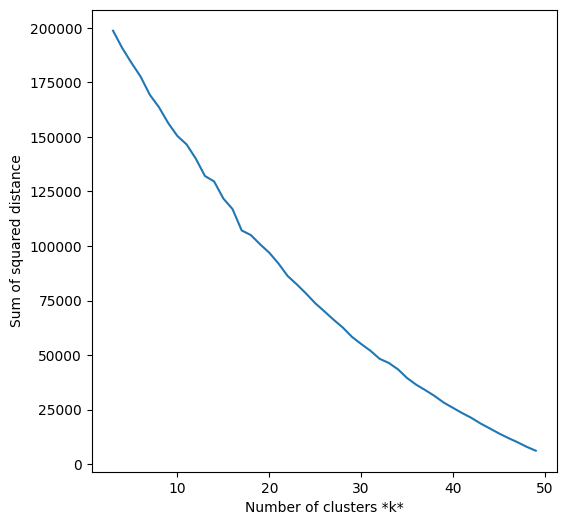

In [ ]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); #seems to be a consistent decline in error

In [ ]:
# cluster feature vectors
kmeans = KMeans(n_clusters=10, random_state=22) #setting it to find 10 clusters
#Tested having 20, 15, and 10 clusters. Having 10 appears to yeild the most meaningful
#and visually similar clusters
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=22)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)


In [ ]:
# function that lets you view a cluster (based on identifier)
def view_cluster(cluster):
    plt.figure(figsize = (50,50));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(25,25,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

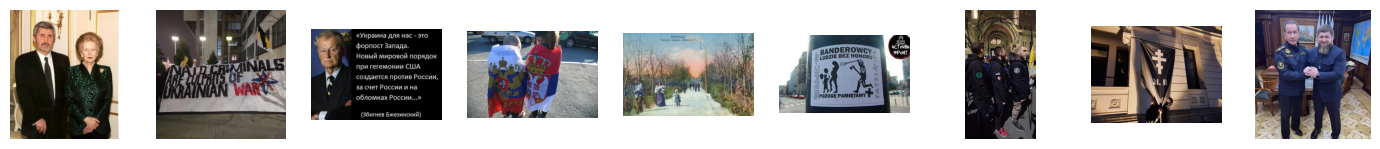

In [ ]:
view_cluster(0)

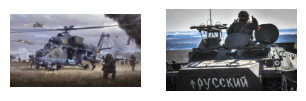

In [ ]:
view_cluster(1)

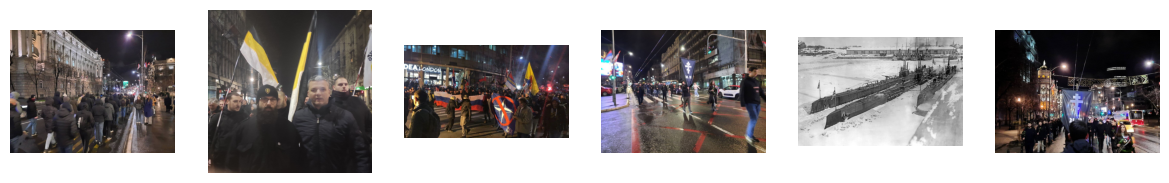

In [ ]:
view_cluster(2)

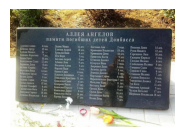

In [ ]:
view_cluster(3)

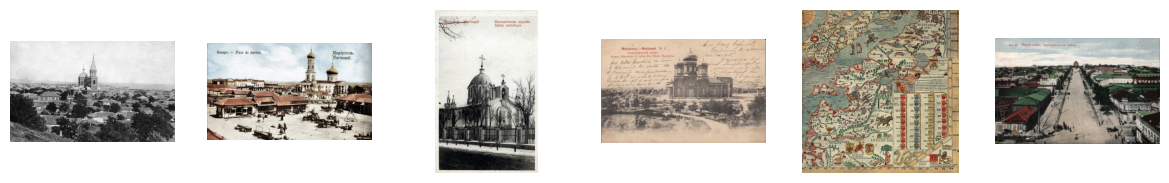

In [ ]:
view_cluster(4)

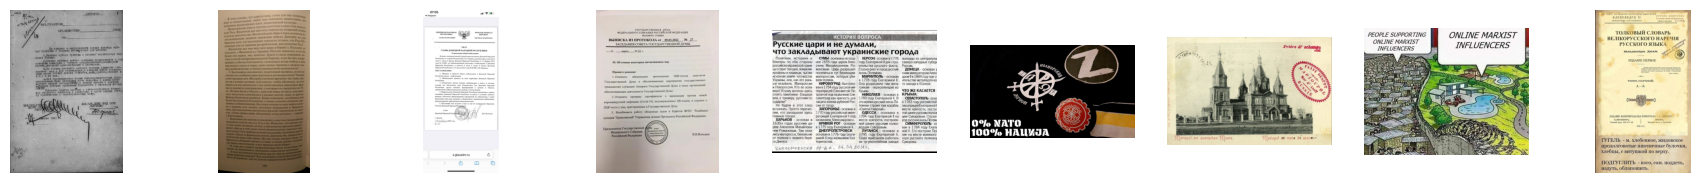

In [ ]:
view_cluster(5)

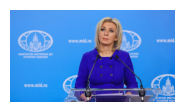

In [ ]:
view_cluster(6)

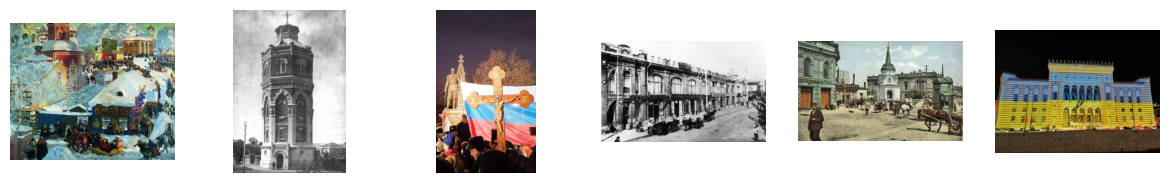

In [ ]:
view_cluster(7)

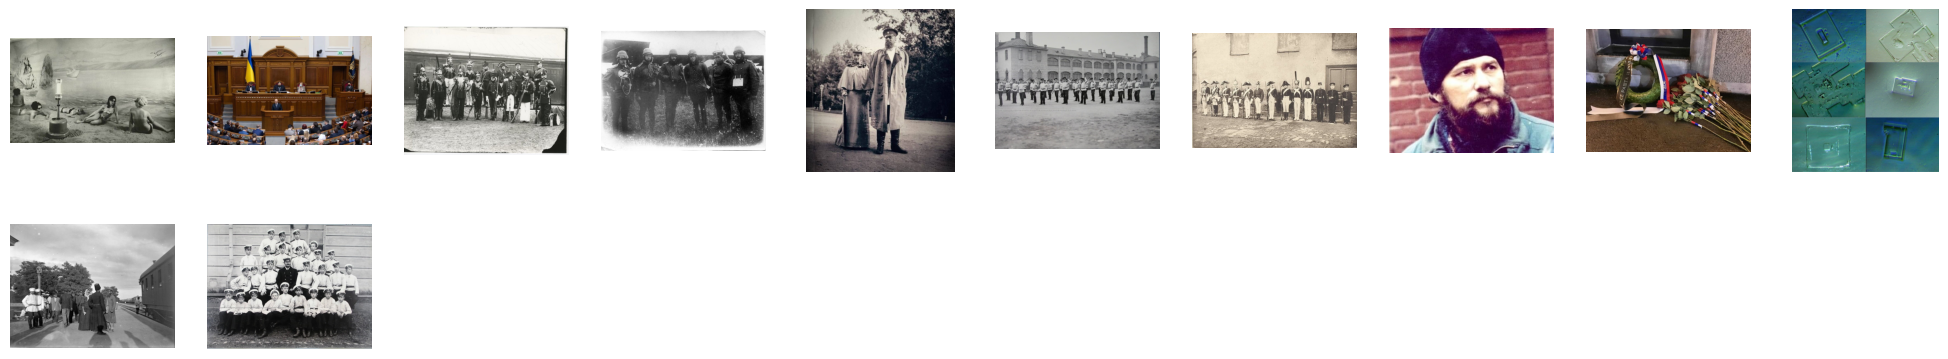

In [ ]:
view_cluster(8)

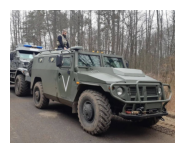

In [ ]:
view_cluster(9)

In [ ]:
pprint.pprint(groups)

{0: ['photo_3939@01-03-2022_07-26-41.jpg',
     'photo_3944@04-03-2022_17-31-04.jpg',
     'photo_3969@13-03-2022_15-15-29.jpg',
     'photo_3971@14-03-2022_01-51-10.jpg',
     'photo_3958@05-03-2022_10-38-30.jpg',
     'photo_3968@13-03-2022_15-14-27.jpg',
     'photo_3943@04-03-2022_17-31-04.jpg',
     'photo_3930@21-02-2022_16-46-33.jpg',
     'photo_3934@24-02-2022_14-38-26.jpg'],
 1: ['photo_3972@14-03-2022_17-06-18.jpg',
     'photo_3967@13-03-2022_09-23-40.jpg'],
 2: ['photo_3931@21-02-2022_16-46-33.jpg',
     'photo_3945@04-03-2022_17-31-04.jpg',
     'photo_3946@04-03-2022_17-31-04.jpg',
     'photo_3929@21-02-2022_16-46-33.jpg',
     'photo_3963@08-03-2022_15-45-22.jpg',
     'photo_3927@21-02-2022_16-46-33.jpg'],
 3: ['photo_3937@25-02-2022_15-11-14.jpg'],
 4: ['photo_3952@05-03-2022_10-38-29.jpg',
     'photo_3959@05-03-2022_10-38-30.jpg',
     'photo_3955@05-03-2022_10-38-30.jpg',
     'photo_3953@05-03-2022_10-38-30.jpg',
     'photo_3961@07-03-2022_08-31-30.jpg',
     'p

In [ ]:
df_features_kclusters = pd.read_csv("/content/Text&Image_Features_28March2024v2-CSV.csv")

In [ ]:
df_features_kclusters.head()

Unnamed: 0    id  views                                               text  \
0           0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1           1  9329    328  В Украине ввели уголовную ответственность за а...   
2           2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3           3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4           4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...   

                                        percent_face  
0  {0: {'face

In [ ]:
df_features_kclusters['image_name'][0]

'photo_3919@15-02-2022_09-28-20.jpg'

In [ ]:
groups[0][0]

'photo_3939@01-03-2022_07-26-41.jpg'

In [ ]:
df_features_kclusters['k_means_image_cluster'] = ''

In [ ]:
for row in df_features_kclusters.index:
  #print(df_features_kclusters['image_name'][row])
  for cluster in groups:
    for image in groups[cluster]:
      if image == df_features_kclusters['image_name'][row]:
        df_features_kclusters['k_means_image_cluster'][row] = cluster

In [ ]:
df_features_kclusters.head(10)

Unnamed: 0    id  views                                               text  \
0           0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1           1  9329    328  В Украине ввели уголовную ответственность за а...   
2           2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3           3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4           4  9337    327  Рекомендации по снятию золотых зубных протезов...   
5           5  9338    332                               ❗️В ДНР мобилизация.   
6           6  9340    314  ['В начале января этого года испанские исследо...   
7           7  9346    426  Перед вступлением на царский престол Николая I...   
8           8  9347    469  Сегодняшний пикет Сербской Акции и Зентропи Се...   
9           9  9348    480                                                NaN   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   
5                                  в днр мобилизация   
6  [' начало январь год испанский исследователь п...   
7  вступление царский престол николай ii населени...   
8  сегодняшний пикет сербский акция зентропить се...   
9                                                NaN   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   
5  photo_3924@19-02-2022_02-13-56.jpg   
6  photo_3925@19-02-2022_08-12-21.jpg   
7  photo_3926@21-02-2022_04-30-41.jpg   
8  photo_3927@21-02-2022_16-46-33.jpg   
9  photo_3927@21-02-2022_16-46-33.jpg   

                                          label_list  \
0  'Crew', 'Military person', 'Suit', 'Military u...   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...   
3  'Water resources', 'Ecoregion', 'Natural envir...   
4  'Handwriting', 'Signature', 'Font', 'Writing',...   
5  'Font', 'Parallel', 'Signature', 'Paper', 'Pap...   
6  'Product', 'Azure', 'Rectangle', 'Blue', 'Flui...   
7  'Sky', 'Cloud', 'Building', 'Working animal', ...   
8  'Street light', 'Building', 'Light', 'Infrastr...   
9  'Street light', 'Building', 'Light', 'Infrastr...   

                                          logos_list  face_num  \
0                                                NaN        10   
1                                                NaN         3   
2                                                NaN         1   
3                                                NaN         0   
4                                                NaN         0   
5  "Donetsk People's Republic", "Donetsk People's...         0   
6                                                NaN         0   
7                                                NaN         1   
8                                                NaN         4   
9                                                NaN         4   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   
5                                                 {}   
6                                                 {}   
7  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
8  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
9  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   

                                       face_location  \
0  {0: '(515,169),(543,16

In [ ]:
groups[8] #spot checking whether the cluster numbers went into the dataframe correctly

['photo_3936@25-02-2022_15-08-57.jpg',
 'photo_3920@15-02-2022_09-32-43.jpg',
 'photo_3919@15-02-2022_09-28-20.jpg',
 'photo_3966@11-03-2022_15-23-10.jpg',
 'photo_3962@08-03-2022_08-16-24.jpg',
 'photo_3941@04-03-2022_04-25-41.jpg',
 'photo_3942@04-03-2022_04-25-41.jpg',
 'photo_3921@15-02-2022_12-59-58.jpg',
 'photo_3932@21-02-2022_16-46-33.jpg',
 'photo_3925@19-02-2022_08-12-21.jpg',
 'photo_3960@07-03-2022_08-30-28.jpg',
 'photo_3940@04-03-2022_04-25-41.jpg']

In [ ]:
groups[5]

['photo_3923@18-02-2022_20-08-32.jpg',
 'photo_3949@05-03-2022_01-17-57.jpg',
 'photo_3924@19-02-2022_02-13-56.jpg',
 'photo_3970@13-03-2022_17-48-14.jpg',
 'photo_3965@11-03-2022_15-19-06.jpg',
 'photo_3948@04-03-2022_17-48-27.jpg',
 'photo_3956@05-03-2022_10-38-30.jpg',
 'photo_3922@17-02-2022_12-33-57.jpg',
 'photo_3933@22-02-2022_03-17-45.jpg']

In [ ]:
groups[7]

['photo_3950@05-03-2022_10-37-32.jpg',
 'photo_3954@05-03-2022_10-38-30.jpg',
 'photo_3947@04-03-2022_17-31-04.jpg',
 'photo_3951@05-03-2022_10-38-29.jpg',
 'photo_3926@21-02-2022_04-30-41.jpg',
 'photo_3938@26-02-2022_14-38-58.jpg']

In [ ]:
groups[2]

['photo_3931@21-02-2022_16-46-33.jpg',
 'photo_3945@04-03-2022_17-31-04.jpg',
 'photo_3946@04-03-2022_17-31-04.jpg',
 'photo_3929@21-02-2022_16-46-33.jpg',
 'photo_3963@08-03-2022_15-45-22.jpg',
 'photo_3927@21-02-2022_16-46-33.jpg']

In [ ]:
df_features_kclusters.to_csv('/content/Text&Image_Features_4April2024-CSV.csv')

#### Selecting number of clusters

Re-do number of cluster selection based on silhouette analysis: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# Text Analysis

## Named Entity Recognition

In [ ]:
#Code from https://spacy.io/models/ru

In [ ]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 44.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("ru_core_news_sm")
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple рассматривает возможность покупки стартапа из Соединённого Королевства за $1 млрд
Apple PROPN nsubj
рассматривает VERB ROOT
возможность NOUN obj
покупки NOUN nmod
стартапа NOUN nmod
из ADP case
Соединённого ADJ amod
Королевства PROPN nmod
за ADP case
$ NOUN nmod
1 NUM appos
млрд NOUN punct


In [ ]:
#https://spacy.io/api/entityrecognizer
doc[6].ent_type_

'LOC'

In [ ]:
doc.ents

(Apple, Соединённого Королевства)

In [ ]:
df_features['named_entities'] = ''

In [ ]:
for row in df_features.index:
  if type(df_features['clean_text'][row]) == float:
     df_features['named_entities'][row] = ''
  else:
    doc = nlp(df_features['clean_text'][row])
    df_features['named_entities'][row] = doc.ents

In [ ]:
df_features.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text views  \
0                     солдат мундир разный время год   328   
1  украина вводить уголовный ответственность анти...   328   
2  настоящий любовь день влюбленный февраль год р...   335   
3  человек который поддерживать марксизм лидер ма...   345   
4  рекомендация снятие золотой зубной протез умир...   327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...       10    []   
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...        3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...        1    []   
3                                                 []        0    []   
4                                                 []        0    []   

                                         image_embed topic  \
0  [[tensor(-0.0539, grad_fn=<UnbindBackward0>), ...     6   
1  [[tensor(0.2939, grad_fn=<UnbindBackward0>), t...     6   
2  [[tensor(-0.4646, grad_fn=<UnbindBackward0>), ...     8   
3  [[tensor(-0.1860, grad_fn=<UnbindBackward0>), ...     1   
4  [[tensor(-0.3746, grad_fn=<UnbindBackward0>), ...     6   

                                      named_entities  
0                                                 ()  
1                                       ((украина),)  
2  ((анатолий, чистоусов), (анатолий), (грозный),...  
3                                                 ()  
4                                        ((аушвиц),)

In [ ]:
df_features['named_entities'][5]

(днр,)

##Word Embedding

Word embeddings are generated using RuBERT, available as part of the HuggingFace transformers (https://huggingface.co/DeepPavlov/rubert-base-cased)

In [ ]:
#Code from https://gist.github.com/kylebgorman/d8a6b1342dddfb4e95c46ff39f87a4cb
#https://metatext.io/models/DeepPavlov-rubert-base-cased




model_name = "DeepPavlov/rubert-base-cased"
model = transformers.AutoModel.from_pretrained(model_name)
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

sentence = "Все счастливые семьи похожи друг на друга, каждая несчастливая семья несчастлива по-своему."

tokenized = tokenizer(sentence, return_tensors="pt")
embeddings = model(**tokenized, output_hidden_states=True).hidden_states[0]
print(embeddings)

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, -0.6739,  0.4493],
         [-1.1217,  0.3129,  1.0538,  ...,  0.2053, -1.2081, -1.3091],
         [ 0.9182, -0.1554,  0.3366,  ..., -0.9325, -0.7112,  0.5945],
         ...,
         [-0.3005, -0.2466,  0.0637,  ...,  0.8596,  0.7812,  0.5491],
         [-0.2888,  0.2839,  0.1186,  ..., -0.7653,  0.0961, -0.3300],
         [ 0.5299,  0.5618,  0.5591,  ..., -0.2989,  0.5252,  0.1211]]],
       grad_fn=<NativeLayerNormBackward0>)


In [ ]:
df_features['text_embed'] = ''

In [ ]:
df_features.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text views  \
0                     солдат мундир разный время год   328   
1  украина вводить уголовный ответственность анти...   328   
2  настоящий любовь день влюбленный февраль год р...   335   
3  человек который поддерживать марксизм лидер ма...   345   
4  рекомендация снятие золотой зубной протез умир...   327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...       10    []   
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...        3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...        1    []   
3                                                 []        0    []   
4                                                 []        0    []   

                                         image_embed topic  \
0  [[tensor(-0.0539, grad_fn=<UnbindBackward0>), ...     6   
1  [[tensor(0.2939, grad_fn=<UnbindBackward0>), t...     6   
2  [[tensor(-0.4646, grad_fn=<UnbindBackward0>), ...     8   
3  [[tensor(-0.1860, grad_fn=<UnbindBackward0>), ...     1   
4  [[tensor(-0.3746, grad_fn=<UnbindBackward0>), ...     6   

                                      named_entities text_embed  
0                                                 ()             
1                                       ((украина),)             
2  ((анатолий, чистоусов), (анатолий), (грозный),...             
3                                                 ()             
4                                        ((аушвиц),)

In [ ]:
for row in df_features.index:
  sentence = str(df_features['clean_text'][row])
  tokenized = tokenizer(sentence, return_tensors="pt")
  embeddings = model(**tokenized, output_hidden_states=True).hidden_states[0]
  df_features['text_embed'][row] = embeddings

In [ ]:
df_features['text_embed'][0]

tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, -0.6739,  0.4493],
         [-1.3439, -0.0665,  0.2328,  ...,  1.4817,  0.6465,  0.2194],
         [ 0.3255, -0.0419, -0.2558,  ...,  0.0188,  0.0447,  0.6400],
         ...,
         [ 0.0435,  0.2209,  1.4305,  ..., -0.0644,  0.2391, -0.1647],
         [ 1.5550, -0.0879, -0.8000,  ...,  0.4197, -0.1700, -0.5492],
         [ 0.8336,  0.0691,  0.7765,  ..., -0.0390,  0.3885, -0.4416]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
#https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

%load_ext tensorboard

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Set up a logs directory, so Tensorboard knows where to look for files.
log_dir='/logs/message_embed/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

In [ ]:
# Save Labels separately on a line-by-line manner.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
  for subwords in encoder.subwords:
    f.write("{}\n".format(subwords))
  # Fill in the rest of the labels with "unknown".
  for unknown in range(1, encoder.vocab_size - len(encoder.subwords)):
    f.write("unknown #{}\n".format(unknown))

NameError: name 'encoder' is not defined

In [ ]:
#Still trying to figure out how to visualize the word embeddings

RuBERT has also been used for sentiment analysis: https://huggingface.co/sismetanin/rubert-ru-sentiment-rusentiment?text=%D0%A2%D1%8B+%D0%BC%D0%BD%D0%B5+%D0%BD%D1%80%D0%B0%D0%B2%D0%B8%D1%88%D1%8C%D1%81%D1%8F.+%D0%AF+%D1%82%D0%B5%D0%B1%D1%8F+%D0%BB%D1%8E%D0%B1%D0%BB%D1%8E


https://towardsdatascience.com/the-bert-based-text-classification-models-of-deeppavlov-a85892f14d61



#Multimodal Analysis

## Co-occurence of visual and textual features

### Image Labels and Text Topics
The results in this section are outdated. Analysis would need to be re-run with the topics produced by the five topic model generated in https://colab.research.google.com/drive/13zieQH8kySxrqcKQ7AnR8QD75JyqhMhD?usp=drive_link

In [ ]:
type(df_features['topic'][0])

numpy.int64

In [ ]:
#Creating empty label lists for each topic
topic_0_labels =['n']
topic_1_labels =['n']
topic_2_labels =['n']
topic_3_labels =['n']
topic_4_labels =['n']
topic_5_labels =['n']
topic_6_labels =['n']
topic_7_labels =['n']
topic_8_labels =['n']
topic_9_labels =['n']

In [ ]:
type(topic_0_labels)

list

In [ ]:
#Code adapted from https://saturncloud.io/blog/how-to-iterate-through-specific-columns-and-rows-in-pandas-dataframe-to-perform-a-check/#:~:text=Iterating%20through%20specific%20columns%20and%20rows%20in%20a%20Pandas%20dataframe,the%20data%20in%20the%20row.

for index, row in df_features.iterrows():
    if row['topic'] == 0:
      topic_0_labels.append(row['label_list'])  #https://stackoverflow.com/questions/8177079/take-the-content-of-a-list-and-append-it-to-another-list

    elif row['topic'] == 1:
      topic_1_labels.append(row['label_list'])

    elif row['topic'] == 2:
      topic_2_labels.append(row['label_list'])

    elif row['topic'] == 3:
      topic_3_labels.append(row['label_list'])

    elif row['topic'] == 4:
      topic_4_labels.append(row['label_list'])

    elif row['topic'] == 5:
      topic_5_labels.append(row['label_list'])

    elif row['topic'] == 6:
      topic_6_labels.append(row['label_list'])

    elif row['topic'] == 7:
      topic_7_labels.append(row['label_list'])

    elif row['topic'] == 8:
      topic_8_labels.append(row['label_list'])

    elif row['topic'] == 9:
      topic_9_labels.append(row['label_list'])


In [ ]:
topic_0_labels.pop(0) #https://www.geeksforgeeks.org/python-removing-first-element-of-list/ removing the n that was added to keep the list from turning to NoneType
topic_1_labels.pop(0)
topic_2_labels.pop(0)
topic_3_labels.pop(0)
topic_4_labels.pop(0)
topic_5_labels.pop(0)
topic_6_labels.pop(0)
topic_7_labels.pop(0)
topic_8_labels.pop(0)
topic_9_labels.pop(0)

'n'

In [ ]:
print(topic_0_labels)

[['Street light', 'Building', 'Light', 'Infrastructure', 'Sky', 'Electricity', 'City', 'Crowd', 'Metropolis', 'Midnight'], ['Footwear', 'Building', 'Infrastructure', 'Street light', 'Asphalt', 'Road surface', 'Thoroughfare', 'Car', 'Zebra crossing', 'Road'], ['Architecture', 'Building', 'Font', 'Automotive design', 'Symmetry', 'Tints and shades', 'Facade', 'Automotive exterior', 'Rectangle', 'Metal'], ['Building', 'Infrastructure', 'Lighting', 'Street light', 'Electricity', 'Window', 'Sky', 'City', 'Road', 'Crowd'], ['Flower', 'Flower Arranging', 'Floral design', 'Event', 'Wood', 'Carmine', 'Fashion accessory', 'Floristry', 'Cut flowers', 'Still life photography'], ['Book', 'Font', 'Publication', 'Paper', 'Parallel', 'Paper product', 'Academic certificate', 'Document', 'Circle'], ['Musical instrument', 'Headgear', 'Musician', 'Wind instrument', 'Crew', 'Uniform', 'Building', 'Event', 'Military organization', 'Team'], ['Gesture', 'Crew', 'Uniform', 'Vintage clothing', 'Event', 'Monochro

In [ ]:
print(topic_1_labels)

[['Water resources', 'Ecoregion', 'Natural environment', 'World', 'Organism', 'Urban design', 'Land lot', 'Map', 'Vegetation', 'Biome'], ['Military uniform', 'Military person', 'Flag', 'Security', 'Jacket', 'Military officer', 'Event', 'Soldier', 'Official', 'Motor vehicle'], ['Outerwear', 'Microphone', 'Product', 'Azure', 'Coat', 'Spokesperson', 'Public address system', 'Public speaking', 'Podium', 'Speech'], ['Font', 'Traffic light', 'Wall', 'Public space', 'Art', 'Road', 'Signage', 'Traffic sign', 'Pedestrian', 'Poster']]


In [ ]:
#Code from https://www.geeksforgeeks.org/python-program-for-most-frequent-word-in-strings-list/ and https://www.geeksforgeeks.org/python-n-largest-values-in-dictionary/


temp = defaultdict(int)

N = 5

# memoizing count
for sub in topic_0_labels:
    for wrd in sub.split():
        temp[wrd] += 1

# getting top N
res = dict(sorted(temp.items(), key = lambda x: x[1], reverse = True)[:N])


print("The top N value pairs are  " + str(res))

AttributeError: 'list' object has no attribute 'split'

In [ ]:
#in progress

##Cosine Similarity


In [ ]:
#Code from https://huggingface.co/docs/transformers/main/en/tasks/image_feature_extraction


In [ ]:
similarity_score = cosine_similarity(df_features['text_embed'][0], df_features['image_embed'][0], dim=1)
print(similarity_score)

In [ ]:
#Based on this https://medium.com/@dhruvbird/all-pairs-cosine-similarity-in-pytorch-867e722c8572
#the multiple numbers might be legitimate and just reflect the differences between each pair in the image and text?
#and the function might be expanding the dimensions so that they match?


In [ ]:
df_features['cosine_similarity'] = ''

In [ ]:
for row in df_features.index:
  similarity_score = cosine_similarity(df_features['text_embed'][row], df_features['image_embed'][row], dim=1)
  df_features['cosine_similarity'][row] = similarity_score

In [ ]:
df_features.head()

id                               image  \
0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text views  \
0                     солдат мундир разный время год   328   
1  украина вводить уголовный ответственность анти...   328   
2  настоящий любовь день влюбленный февраль год р...   335   
3  человек который поддерживать марксизм лидер ма...   345   
4  рекомендация снятие золотой зубной протез умир...   327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  [Crew, Military person, Suit, Military uniform...   
1  [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2  [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3  [Water resources, Ecoregion, Natural environme...   
4  [Handwriting, Signature, Font, Writing, Paper,...   

                                               faces face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...       10    []   
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...        3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...        1    []   
3                                                 []        0    []   
4                                                 []        0    []   

                                         image_embed topic  \
0  [[tensor(-0.0539, grad_fn=<UnbindBackward0>), ...     6   
1  [[tensor(0.2939, grad_fn=<UnbindBackward0>), t...     6   
2  [[tensor(-0.4646, grad_fn=<UnbindBackward0>), ...     8   
3  [[tensor(-0.1860, grad_fn=<UnbindBackward0>), ...     1   
4  [[tensor(-0.3746, grad_fn=<UnbindBackward0>), ...     6   

                                      named_entities  \
0                                                 ()   
1                                       ((украина),)   
2  ((анатолий, чистоусов), (анатолий), (грозный),...   
3                                                 ()   
4                                        ((аушвиц),)   

                                          text_embed  \
0  [[[tensor(1.0899, grad_fn=<UnbindBackward0>), ...   
1  [[[tensor(1.0899, grad_fn=<UnbindBackward0>), ...   
2  [[[tensor(1.0899, grad_fn=<UnbindBackward0>), ...   
3  [[[tensor(1.0899, grad_fn=<UnbindBackward0>), ...   
4  [[[tensor(1.0899, grad_fn=<UnbindBackward0>), ...   

                                   cosine_similarity  
0  [[tensor(-0.4988, grad_fn=<UnbindBackward0>), ...  
1  [[tensor(0.0103, grad_fn=<UnbindBackward0>), t...  
2  [[tensor(-0.3134, grad_fn=<UnbindBackward0>), ...  
3  [[tensor(-0.2619, grad_fn=<UnbindBackward0>), ...  
4  [[tensor(-0.2835, grad_fn=<UnbindBackward0>), ...

In [ ]:
df_features.to_csv("Text&Image_Features_28Mar024.csv")

##Cosine Similarity Matrix Images

In [ ]:
df_features = pd.read_csv("Text&Image_Features_29Feb2024.csv")

In [ ]:
df_features.head(15)

id                               image  \
0   9328  photo_3919@15-02-2022_09-28-20.jpg   
1   9329  photo_3920@15-02-2022_09-32-43.jpg   
2   9330  photo_3921@15-02-2022_12-59-58.jpg   
3   9334  photo_3922@17-02-2022_12-33-57.jpg   
4   9337  photo_3923@18-02-2022_20-08-32.jpg   
5   9338  photo_3924@19-02-2022_02-13-56.jpg   
6   9340  photo_3925@19-02-2022_08-12-21.jpg   
7   9346  photo_3926@21-02-2022_04-30-41.jpg   
8   9347  photo_3927@21-02-2022_16-46-33.jpg   
9   9348  photo_3927@21-02-2022_16-46-33.jpg   
10  9349  photo_3929@21-02-2022_16-46-33.jpg   
11  9350  photo_3930@21-02-2022_16-46-33.jpg   
12  9351  photo_3931@21-02-2022_16-46-33.jpg   
13  9352  photo_3932@21-02-2022_16-46-33.jpg   
14  9354  photo_3933@22-02-2022_03-17-45.jpg   

                                                 text  \
0         Солдаты в мундирах разных времен, 1912 год.   
1   В Украине ввели уголовную ответственность за а...   
2   ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3   Люди,которые поддерживают марксизм / Лидеры ма...   
4   Рекомендации по снятию золотых зубных протезов...   
5                                ❗️В ДНР мобилизация.   
6   [В начале января этого года испанские исследов...   
7   Перед вступлением на царский престол Николая I...   
8   Сегодняшний пикет Сербской Акции и Зентропи Се...   
9                                                       
10                                                      
11                                                      
12                                                      
13                                                      
14                                                      

                                           clean_text views  \
0                      солдат мундир разный время год   328   
1   украина вводить уголовный ответственность анти...   328   
2   настоящий любовь день влюбленный февраль год р...   335   
3   человек который поддерживать марксизм лидер ма...   345   
4   рекомендация снятие золотой зубной протез умир...   327   
5                                   в днр мобилизация   332   
6   [' начало январь год испанский исследователь п...   314   
7   вступление царский престол николай ii населени...   426   
8   сегодняшний пикет сербский акция зентропить се...   469   
9                                                       480   
10                                                      478   
11                                                      535   
12                                                      538   
13                                                      539   
14                                                      769   

                                               labels  \
0   [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1   [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2   [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3   [mid: "/m/015s2f"\ndescription: "Water resourc...   
4   [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   
5   [mid: "/m/03gq5hm"\ndescription: "Font"\nscore...   
6   [mid: "/m/01jwgf"\ndescription: "Product"\nsco...   
7   [mid: "/m/01bqvp"\ndescription: "Sky"\nscore: ...   
8   [mid: "/m/033rq4"\ndescription: "Street light"...   
9   [mid: "/m/033rq4"\ndescription: "Street light"...   
10  [mid: "/m/09j5n"\ndescription: "Footwear"\nsco...   
11  [mid: "/m/03nfmq"\ndescription: "Architecture"...   
12  [mid: "/m/0cgh4"\ndescription: "Building"\nsco...   
13  [mid: "/m/0c9ph5"\ndescription: "Flower"\nscor...   
14  [mid: "/m/0bt_c3"\ndescription: "Book"\nscore:...   

                                           label_list  \
0   [Crew, Military person, Suit, Military uniform...   
1   [Table, Furniture, Chair, Cabinetry, Suit, Des...   
2   [Forehead, Eyebrow, Beard, Facial hair, Cap, C...   
3   [Water resources, Ecoregion, Natural environme...   
4   [Handwriting, Signature, Font, Writing, Paper,...   
5   [Font, Parallel, Signature, Paper, Paper produ...   
6  

In [ ]:
#Code from https://huggingface.co/docs/transformers/main/en/tasks/image_feature_extraction


In [ ]:
similarity_score = cosine_similarity(df_features['image_embed'][0], df_features['image_embed'][1], dim=1) #these to images are different and got a score of 0.0647
print(similarity_score)

tensor([0.1140], grad_fn=<SumBackward1>)


In [ ]:
similarity_score = cosine_similarity(df_features['image_embed'][9], df_features['image_embed'][10], dim=1)
print(similarity_score) #these images are fairly similar and got a score of 0.6662

tensor([0.6711], grad_fn=<SumBackward1>)


In [ ]:
#Code from https://lightning.ai/docs/torchmetrics/stable/pairwise/cosine_similarity.html


In [ ]:
pairwise_cosine_similarity(df_features['image_embed']) #This resulted in an error

ValueError: Expected argument `x` to be a 2D tensor of shape `[N, d]` but got (54,)

In [ ]:
#Written with ChatGPT
num_images = len(df_features['image_embed'])
similarity_matrix = np.zeros((num_images, num_images))

In [ ]:
for i, j in combinations(range(num_images), 2):
  similarity = cosine_similarity(df_features['image_embed'][i], df_features['image_embed'][j], dim=1)
  similarity_matrix[i, j] = similarity
  similarity_matrix[j, i] = similarity

In [ ]:
print(similarity_matrix)

[[ 0.          0.06471218  0.17342207 ...  0.03917193  0.0133585
   0.32076147]
 [ 0.06471218  0.          0.07266037 ...  0.06686024  0.04540648
   0.03752993]
 [ 0.17342207  0.07266037  0.         ...  0.07854998  0.12121121
   0.04581372]
 ...
 [ 0.03917193  0.06686024  0.07854998 ...  0.         -0.00305601
  -0.03456459]
 [ 0.0133585   0.04540648  0.12121121 ... -0.00305601  0.
   0.12471383]
 [ 0.32076147  0.03752993  0.04581372 ... -0.03456459  0.12471383
   0.        ]]


In [ ]:
image_similarity_df = pd.DataFrame(similarity_matrix, index=df_features['image'], columns=df_features['image'])

In [ ]:
image_similarity_df.head(10)

image                               photo_3919@15-02-2022_09-28-20.jpg  \
image                                                                    
photo_3919@15-02-2022_09-28-20.jpg                            0.000000   
photo_3920@15-02-2022_09-32-43.jpg                            0.064712   
photo_3921@15-02-2022_12-59-58.jpg                            0.173422   
photo_3922@17-02-2022_12-33-57.jpg                            0.052322   
photo_3923@18-02-2022_20-08-32.jpg                            0.126146   
photo_3924@19-02-2022_02-13-56.jpg                            0.073317   
photo_3925@19-02-2022_08-12-21.jpg                           -0.048875   
photo_3926@21-02-2022_04-30-41.jpg                            0.213118   
photo_3927@21-02-2022_16-46-33.jpg                            0.237061   
photo_3927@21-02-2022_16-46-33.jpg                            0.237061   

image                               photo_3920@15-02-2022_09-32-43.jpg  \
image                                                                    
photo_3919@15-02-2022_09-28-20.jpg                            0.064712   
photo_3920@15-02-2022_09-32-43.jpg                            0.000000   
photo_3921@15-02-2022_12-59-58.jpg                            0.072660   
photo_3922@17-02-2022_12-33-57.jpg                            0.059155   
photo_3923@18-02-2022_20-08-32.jpg                           -0.024426   
photo_3924@19-02-2022_02-13-56.jpg                            0.050024   
photo_3925@19-02-2022_08-12-21.jpg                            0.085469   
photo_3926@21-02-2022_04-30-41.jpg                            0.082473   
photo_3927@21-02-2022_16-46-33.jpg                            0.096985   
photo_3927@21-02-2022_16-46-33.jpg                            0.096985   

image                               photo_3921@15-02-2022_12-59-58.jpg  \
image                                                                    
photo_3919@15-02-2022_09-28-20.jpg                            0.173422   
photo_3920@15-02-2022_09-32-43.jpg                            0.072660   
photo_3921@15-02-2022_12-59-58.jpg                            0.000000   
photo_3922@17-02-2022_12-33-57.jpg                            0.060510   
photo_3923@18-02-2022_20-08-32.jpg                            0.083976   
photo_3924@19-02-2022_02-13-56.jpg                            0.074591   
photo_3925@19-02-2022_08-12-21.jpg                           -0.092618   
photo_3926@21-02-2022_04-30-41.jpg                            0.041986   
photo_3927@21-02-2022_16-46-33.jpg                            0.041751   
photo_3927@21-02-2022_16-46-33.jpg                            0.041751   

image                               photo_3922@17-02-2022_12-33-57.jpg  \
image                                                                    
photo_3919@15-02-2022_09-28-20.jpg                            0.052322   
photo_3920@15-02-2022_09-32-43.jpg                            0.059155   
photo_3921@15-02-2022_12-59-58.jpg                            0.060510   
photo_3922@17-02-2022_12-33-57.jpg                            0.000000   
photo_3923@18-02-2022_20-08-32.jpg                            0.137680   
photo_3924@19-02-2022_02-13-56.jpg                            0.147387   
photo_3925@19-02-2022_08-12-21.jpg                            0.013813   
photo_3926@21-02-2022_04-30-41.jpg                            0.171130   
photo_3927@21-02-2022_16-46-33.jpg                            0.143154   
photo_3927@21-02-2022_16-46-33.jpg                            0.143154   

image                               photo_3923@18-02-2022_20-08-32.jpg  \
image                                                                    
photo_3919@15-02-2022_09-28-20.jpg                            0.126146   
photo_3920@15-02-2022_09-32-43.jpg                           -0.024426   
photo_3921@15-02-2022_12-59-58.jpg                            0.083976   
photo_3922@17-02-2022_12-33-57.jpg                            0.137680   


In [ ]:
#Spot checking the image similarity df
similarity_score = cosine_similarity(df_features['image_embed'][0], df_features['image_embed'][1], dim=1) #these to images are different and got a score of 0.0647
print(similarity_score)

tensor([0.0647], grad_fn=<SumBackward1>)


In [ ]:
similarity_score = cosine_similarity(df_features['image_embed'][0], df_features['image_embed'][2], dim=1) #these to images are different and got a score of 0.0647
print(similarity_score)

tensor([0.1734], grad_fn=<SumBackward1>)


In [ ]:
similarity_score = cosine_similarity(df_features['image_embed'][1], df_features['image_embed'][4], dim=1) #these to images are different and got a score of 0.0647
print(similarity_score)

tensor([-0.0244], grad_fn=<SumBackward1>)


In [ ]:
similarity_score = cosine_similarity(df_features['image_embed'][0], df_features['image_embed'][47], dim=1) #these to images are different and got a score of 0.0647
print(similarity_score)

tensor([0.7184], grad_fn=<SumBackward1>)


## Cosine Similarity Matrix Text

In [ ]:
similarity_score = cosine_similarity(df_features['text_embed'][0], df_features['text_embed'][1], dim=0)
print(similarity_score)

RuntimeError: The size of tensor a (7) must match the size of tensor b (27) at non-singleton dimension 1

In [ ]:
df_features['text_embed'][0].shape

torch.Size([1, 7, 768])

In [ ]:
df_features['text_embed'][1].shape

torch.Size([1, 27, 768])

In [ ]:
#Code from https://pytorch.org/docs/stable/generated/torch.reshape.html

a_reshape = torch.reshape(df_features['text_embed'][0],(df_features['text_embed'][1].shape[1],))

RuntimeError: shape '[27]' is invalid for input of size 5376

In [ ]:
#According to this article https://www.geeksforgeeks.org/how-to-compute-the-cosine-similarity-between-two-tensors-in-pytorch/
#2D tensors can have multiple values on the cosine similarity tensor

In [ ]:
#Code from https://discuss.pytorch.org/t/how-to-bring-different-tensors-to-the-same-size/78958/2

x = df_features['text_embed'][0]
print(x.shape)
x_reshape = F.pad(x, (df_features['text_embed'][1].size(1) - x.size(1), 0))
print(x_reshape.shape)
print(df_features['text_embed'][1].shape)

torch.Size([1, 7, 768])
torch.Size([1, 7, 788])
torch.Size([1, 27, 768])


## Combined Similarity Matrix



### CLIP
(https://huggingface.co/docs/transformers/model_doc/clip)

Creating a similarity matrix for each image and piece of message text based on the probability that each piece of text belongs with each image based on the pretrained CLIP model

https://arxiv.org/pdf/2103.00020.pdf: "Given a batch of N (image, text) pairs, CLIP is trained to
predict which of the N × N possible (image, text) pairings
across a batch actually occurred. To do this, CLIP learns a multi-modal embedding space by jointly training an image
encoder and text encoder to maximize the cosine similarity of the image and text embeddings of the N real pairs
in the batch while minimizing the cosine similarity of the
embeddings of the N2 − N incorrect pairings. We optimize a symmetric cross entropy loss over these similarity
scores" - so these similarity scores are based on cosine similarity? Is this method directly comparable to the cosine similarity between two images calculated above?

In [ ]:
#Reassigning df column clean_text to cleaner text generated above
df_features['clean_text'] = df_messages_filtered['clean_text']
df_features.head()

Unnamed: 0.1  Unnamed: 0    id                               image  \
0             0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1             1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2             2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3             3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4             4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                               faces  face_num  \
0  [bounding_poly {\n  vertices {\n    x: 616\n  ...        10   
1  [bounding_poly {\n  vertices {\n    x: 105\n  ...         3   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1   
3                                                 []         0   
4                                                 []         0   

                                               logos  \
0                                                 []   
1  [mid: "/m/04n2qxs"\ndescription: "SkyWork Airl...   
2                                                 []   
3                                                 []   
4                                                 []   

                                          label_list  \
0  ['Crew', 'Military person', 'Suit', 'Military ...   
1  ['Table', 'Furniture', 'Chair', 'Cabinetry', '...   
2  ['Forehead', 'Eyebrow', 'Beard', 'Facial hair'...   
3  ['Water resources', 'Ecoregion', 'Natural envi...   
4  ['Handwriting', 'Signature', 'Font', 'Writing'...   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                         image_embed  \
0  tensor([[-7.6865e-01,  9.9527e-03, -5.6129e-01...   
1  tensor([[ 0.7073, -0.5873, -0.2859, -0.4292, -...   
2  tensor([[-0.1139,  0.4100, -0.2043, -0.2189, -...   
3  tensor([[-0.1414, -0.1206,  0.8594,  0.1306,  ...   
4  tensor([[-0.6750, -0.6707, -0.3306,  0.6947, -...   

                                   cosine_similarity  
0  tensor([[-8.3871e-02,  1.8712e-04, -3.8197e-02...  
1  tensor([[ 3.3032e-03, -7.3167e-02, -4.1902e-03...  
2  tensor([[-3.8373e-02,  1.0049e-02, -3.5646e-03...  
3  tensor([[-1.0153e-02, -2.3254e-02,  3.3562e-02...  
4  tensor([[-7.6655e-02, -4.3177e-02,  1.4821e-02...

In [ ]:
#Hugghing Face Clip Model
#Code from https://huggingface.co/docs/transformers/model_doc/clip



In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
#Trying with example images and labels
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs) #Indicates that the label "a photo of a cat" (first item in list) is more likely relevant than the label "a photo of a dog" (second item in list)

tensor([[0.9949, 0.0051]], grad_fn=<SoftmaxBackward0>)


In [ ]:
df_features['clean_text'][2][:75]

'настоящий любовь день влюбленный февраль год расстреливать священник анатол'

In [ ]:
#Trying with one of my images and two labels (the message text sent with the image, and the message text sent with the next image)

image = Image.open("/content/photo_folder/" + df_features['image'][0])
inputs = processor(text=[df_features['clean_text'][0][:75],df_features['clean_text'][1][:75]], images=image, return_tensors="pt", padding=True)
#for this image and these two labels, it appears that the max number of characters
#that can be included in the string without causing and error is 75
#this was discovered through a process of trial and error in trying different numbers
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs)

tensor([[0.9258, 0.0742]], grad_fn=<SoftmaxBackward0>)


In [ ]:
#Trying with one of my images and all possible labels (message text sent with images)

text_list = []

for row in df_features.index:
  text = str(df_features['clean_text'][row])[0:75]
  text_list.append(text)

print(text_list)


['солдат мундир разный время год', 'украина вводить уголовный ответственность антисемитизм максимальный наказан', 'настоящий любовь день влюбленный февраль год расстреливать священник анатол', 'человек который поддерживать марксизм лидер марксизм', 'рекомендация снятие золотой зубной протез умирать заключенный учет аушвиц д', 'в днр мобилизация', "[' начало январь год испанский исследователь показывать мир сногсшибательны", 'вступление царский престол николай ii население российский империя составля', 'сегодняшний пикет сербский акция зентропить сербия честь зоран вуйович серб', '', '', '', '', '', '', 'встреча глава чр директор федеральный служба войско национальный гвардия рф', 'пока русский армия героически держать аэропорт киев наступать нести потеря ', 'фотарий пензенский велосипедный завод фото михаил грачев год г пенза', "[' сведение весь просыпаться миротворец война начинаться год назад !!! n n ", 'сараево здание мэрия подсвечивать цвет флаг украина', 'первый вице-премьер прави

In [ ]:
for item in text_list:
  print(len(item))

In [ ]:
print(type(text_list))
print(len(text_list))

<class 'list'>
54


In [ ]:
image = Image.open("/content/photo_folder/" + df_features['image'][0])


inputs = processor(text=text_list, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs)

RuntimeError: The size of tensor a (87) must match the size of tensor b (77) at non-singleton dimension 1

In [ ]:
#trying to see if the model will run on each piece of text
for text in text_list:
  print(text)
  inputs = processor(text=text, images=image, return_tensors="pt", padding=True)
  outputs = model(**inputs)
  logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
  probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
  print(probs)

солдат мундир разный время год
tensor([[1.]], grad_fn=<SoftmaxBackward0>)
украина вводить уголовный ответственность антисемитизм максимальный наказан
tensor([[1.]], grad_fn=<SoftmaxBackward0>)
настоящий любовь день влюбленный февраль год расстреливать священник анатол


RuntimeError: The size of tensor a (84) must match the size of tensor b (77) at non-singleton dimension 1

In [ ]:
#Comparing the first image with each message text
image = Image.open("/content/photo_folder/" + df_features['image'][0])
inputs = processor(text=text_list, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs)

RuntimeError: The size of tensor a (87) must match the size of tensor b (77) at non-singleton dimension 1

In [ ]:
#it seems that the message at index 2 consistently causes an error - removing this message
#adding the text of each message manually to the list of potential labels
image = Image.open("/content/photo_folder/" + df_features['image'][0])
inputs = processor(text=[df_features['clean_text'][0][:75],
                         df_features['clean_text'][1][:75],
                         df_features['clean_text'][3][:75],
                         df_features['clean_text'][5][:75],
                         df_features['clean_text'][7][:75],
                         df_features['clean_text'][9][:75],
                         df_features['clean_text'][10][:75], #this model appears to stop calculating after
                         df_features['clean_text'][11][:75], #five labels and just givens the same result for every label
                         df_features['clean_text'][12][:75],
                         df_features['clean_text'][13][:75]], images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs)


tensor([[0.0370, 0.0030, 0.0087, 0.1782, 0.0279, 0.1491, 0.1491, 0.1491, 0.1491,
         0.1491]], grad_fn=<SoftmaxBackward0>)


It appears that the CLIP model may not work for my use case since it appears to have a limit of 5 labels and a limit of 75 characters on each label. I also got an error when entering even index numbers under 10 into my list of potential labels

### GroupViT

(https://huggingface.co/docs/transformers/model_doc/groupvit)

In [ ]:
#Code from https://huggingface.co/docs/transformers/model_doc/groupvit



model = GroupViTModel.from_pretrained("nvidia/groupvit-gcc-yfcc")
processor = AutoProcessor.from_pretrained("nvidia/groupvit-gcc-yfcc")

config.json:   0%|          | 0.00/4.64k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/223M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/997 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

In [ ]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(
    text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True
)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [ ]:
print(probs)

tensor([[9.9908e-01, 9.2074e-04]], grad_fn=<SoftmaxBackward0>)


Trying with one of my images

In [ ]:
image = Image.open("/content/photo_folder/" + df_features['image'][0])


inputs = processor(
    text=[df_features['clean_text'][0][0:75], df_features['clean_text'][1][0:75]], images=image, return_tensors="pt", padding=True
)
#this model also has a character limit
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [ ]:
print(probs)

tensor([[0.3083, 0.6917]], grad_fn=<SoftmaxBackward0>)


In [ ]:
#Trying with more labels
inputs = processor(
    text=[df_features['clean_text'][0][0:75], df_features['clean_text'][1][0:75],df_features['clean_text'][11][0:75]], images=image, return_tensors="pt", padding=True
)
#messages at even index numbers below 10 still lead to an error
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [ ]:
print(probs)

tensor([[0.0454, 0.1019, 0.8527]], grad_fn=<SoftmaxBackward0>)


This model also seems like it will not work, since messages at even index numbers below 10 still lead to an error



# View Count

Updated descriptive statistics are in the notebook v2_descriptivestats_30Sep24.ipynb: https://colab.research.google.com/drive/1bco53izftSDuiaie7L8kVBu7lTF5uYoJ?usp=sharing

Updated regression analysis is in the notebook v2_regression_1Oct2024.ipynb: https://colab.research.google.com/drive/17WHiX1I8hMRHC_JLSQ_xNXJ-3lgbJu80?usp=sharing


derivative?

##Descriptive Statistics

In [ ]:
#Histogram of the number of views

In [ ]:
df_features = pd.read_csv("/content/Text&Image_Features_4April2024-CSV.csv")

In [ ]:
df_features.head()

Unnamed: 0.1  Unnamed: 0    id  views  \
0             0           0  9328    328   
1             1           1  9329    328   
2             2           2  9330    335   
3             3           3  9334    345   
4             4           4  9337    327   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8

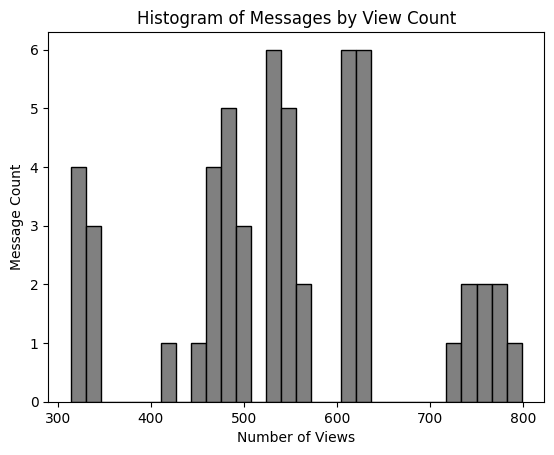

In [ ]:
#Code from https://www.w3schools.com/python/matplotlib_histograms.asp
#Adding labels assisted by ChatGPT


views = df_features['views']

# Plot histogram
plt.hist(views, bins=30, color='grey', edgecolor='black')

# Add labels to x and y axes
plt.xlabel('Number of Views')
plt.ylabel('Message Count')

# Add a title
plt.title('Histogram of Messages by View Count')

# Show plot
plt.show()


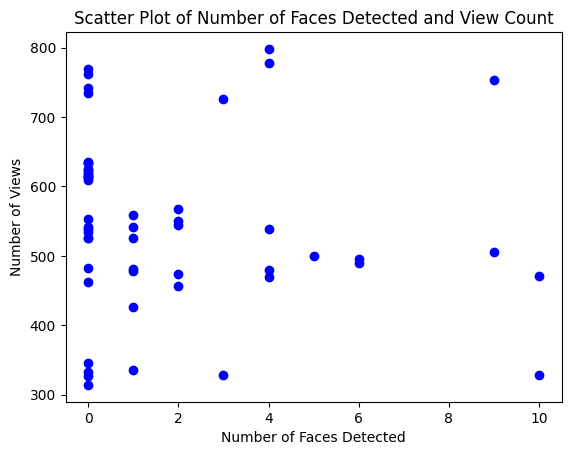

In [ ]:
#Scatter plot, face num v views
#https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
#Assisted by ChatGPT

plt.scatter(df_features['face_num'],views, c ="blue")

# Add labels to x and y axes
plt.xlabel('Number of Faces Detected')
plt.ylabel('Number of Views')

# Add a title
plt.title('Scatter Plot of Number of Faces Detected and View Count')

# Show plot
plt.show()

In [ ]:
#Number of Messages Per Topic
#Assisted by ChatGPT
num_messages_per_topic = df_features['topic'].value_counts()

print(num_messages_per_topic)

topic
0    25
6     9
3     5
1     4
4     4
2     3
8     1
5     1
9     1
7     1
Name: count, dtype: int64


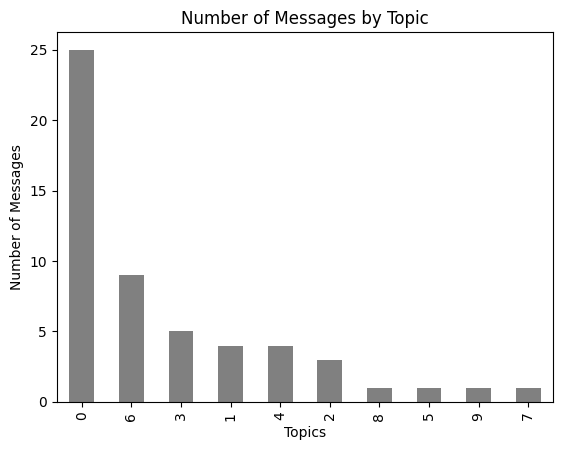

In [ ]:
num_messages_per_topic.plot(kind='bar', color='grey')

# Adding labels and title
plt.xlabel('Topics')
plt.ylabel('Number of Messages')
plt.title('Number of Messages by Topic')

# Display the plot
plt.show()

In [ ]:
#Assisted by ChatGPT
average_views_by_topic = df_features.groupby('topic')['views'].mean()

print(average_views_by_topic)

topic
0    609.920000
1    518.500000
2    563.000000
3    509.600000
4    541.500000
5    526.000000
6    441.444444
7    456.000000
8    335.000000
9    525.000000
Name: views, dtype: float64


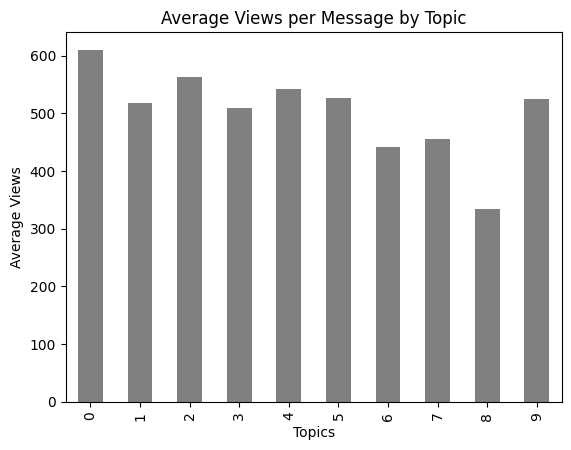

In [ ]:
average_views_by_topic.plot(kind='bar', color='grey')

# Adding labels and title
plt.xlabel('Topics')
plt.ylabel('Average Views')
plt.title('Average Views per Message by Topic')

# Display the plot
plt.show()

In [ ]:
#Number of Messages Per K-Means Cluster
#Assisted by ChatGPT
num_messages_per_cluster = df_features['k_means_image_cluster'].value_counts()

print(num_messages_per_cluster.sort_index())

k_means_image_cluster
0     9
1     2
2     7
3     1
4     6
5     9
6     1
7     6
8    12
9     1
Name: count, dtype: int64


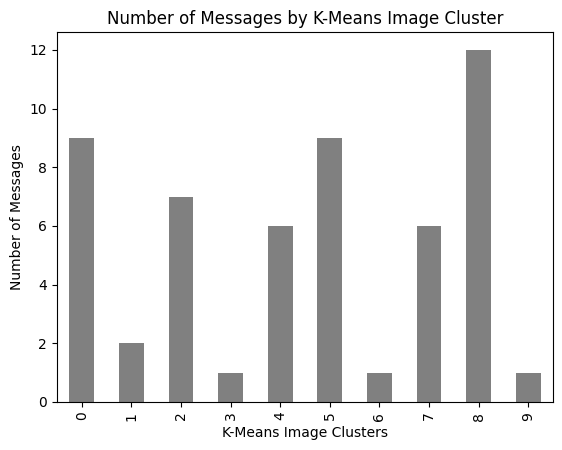

In [ ]:
#Assisted by ChatGPT

num_messages_per_cluster.sort_index().plot(kind='bar', color='grey')

# Adding labels and title
plt.xlabel('K-Means Image Clusters')
plt.ylabel('Number of Messages')
plt.title('Number of Messages by K-Means Image Cluster')

# Display the plot
plt.show()

In [ ]:
#Assisted by ChatGPT
average_views_by_cluster = df_features.groupby('k_means_image_cluster')['views'].mean()

print(average_views_by_cluster)

k_means_image_cluster
0    583.444444
1    608.000000
2    579.571429
3    526.000000
4    606.166667
5    533.111111
6    541.000000
7    610.833333
8    443.583333
9    526.000000
Name: views, dtype: float64


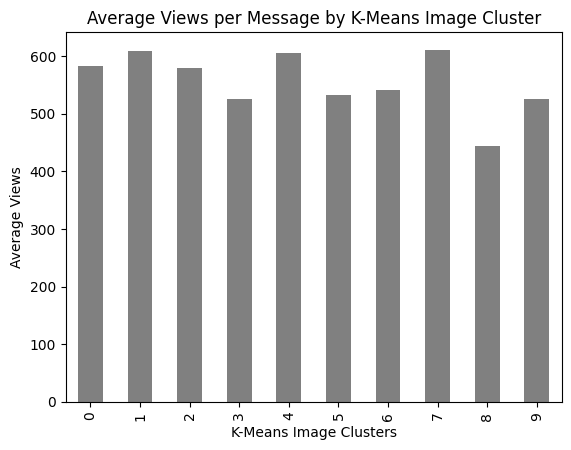

In [ ]:
average_views_by_cluster.plot(kind='bar', color='grey')

# Adding labels and title
plt.xlabel('K-Means Image Clusters')
plt.ylabel('Average Views')
plt.title('Average Views per Message by K-Means Image Cluster')

# Display the plot
plt.show()

In [ ]:
#Assisted by ChatGPT
import ast

# Convert string representation to dictionary
actual_dict = ast.literal_eval(df_features['percent_face'][0])
print(actual_dict)
print(actual_dict['total_face_percent'])

{0: {'face_height': 32, 'face_width': 28, 'face_area': 896, 'face_percent_of_image': 0.19495213228894692}, 1: {'face_height': 36, 'face_width': 31, 'face_area': 1116, 'face_percent_of_image': 0.24281984334203655}, 2: {'face_height': 27, 'face_width': 24, 'face_area': 648, 'face_percent_of_image': 0.14099216710182766}, 3: {'face_height': 37, 'face_width': 32, 'face_area': 1184, 'face_percent_of_image': 0.257615317667537}, 4: {'face_height': 31, 'face_width': 27, 'face_area': 837, 'face_percent_of_image': 0.1821148825065274}, 5: {'face_height': 32, 'face_width': 28, 'face_area': 896, 'face_percent_of_image': 0.19495213228894692}, 6: {'face_height': 29, 'face_width': 25, 'face_area': 725, 'face_percent_of_image': 0.15774586597040904}, 7: {'face_height': 36, 'face_width': 31, 'face_area': 1116, 'face_percent_of_image': 0.24281984334203655}, 8: {'face_height': 34, 'face_width': 29, 'face_area': 986, 'face_percent_of_image': 0.21453437771975628}, 9: {'face_height': 31, 'face_width': 27, 'fac

In [ ]:
print(ast.literal_eval(df_features['percent_face'][0])['total_face_percent'])

2.0106614447345517


In [ ]:
df_features['total_face_percent'] = ''

In [ ]:
df_features.head()

Unnamed: 0.1  Unnamed: 0    id  views  \
0             0           0  9328    328   
1             1           1  9329    328   
2             2           2  9330    335   
3             3           3  9334    345   
4             4           4  9337    327   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

   ...                                      face_location  \
0  ...  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  ...  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2  ...           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3  ...                                                 {}   
4  ...                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...     6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...     6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...     8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...     1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...     6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...   

                                        percent_face k_means_image_cluster  \
0  {0: {'face_height': 32, 'face_width': 28, 'fac...                     8   
1  {0: {'face_height': 24, 'face_width': 21, 'fac...                     8   
2  {0: {'face_height': 249, 'fac

In [ ]:
#Change back to dictionary to be able to index in for scatter plot
for row in df_features.index:
  actual_dict = ast.literal_eval(df_features['percent_face'][row])
  df_features['percent_face'][row] = actual_dict

In [ ]:
type(df_features['percent_face'][0])

dict

In [ ]:
print(df_features['percent_face'][0]['total_face_percent'])

2.0106614447345517


In [ ]:
#Adding values to the column total face percent
for row in df_features.index:
  df_features['total_face_percent'][row] = df_features['percent_face'][row]['total_face_percent']

<ipython-input-23-7c8d2cc292be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['total_face_percent'][row] = df_features['percent_face'][row]['total_face_percent']
<ipython-input-23-7c8d2cc292be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['total_face_percent'][row] = df_features['percent_face'][row]['total_face_percent']
<ipython-input-23-7c8d2cc292be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f

In [ ]:
df_features.head()

Unnamed: 0.1  Unnamed: 0    id  views  \
0             0           0  9328    328   
1             1           1  9329    328   
2             2           2  9330    335   
3             3           3  9334    345   
4             4           4  9337    327   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

   ...                                      face_location  \
0  ...  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  ...  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2  ...           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3  ...                                                 {}   
4  ...                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...     6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...     6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...     8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...     1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...     6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...   

                                        percent_face k_means_image_cluster  \
0  {0: {'face_height': 32, 'face_width': 28, 'fac...                     8   
1  {0: {'face_height': 24, 'face_width': 21, 'fac...                     8   
2  {0: {'face_height': 249, 'fac

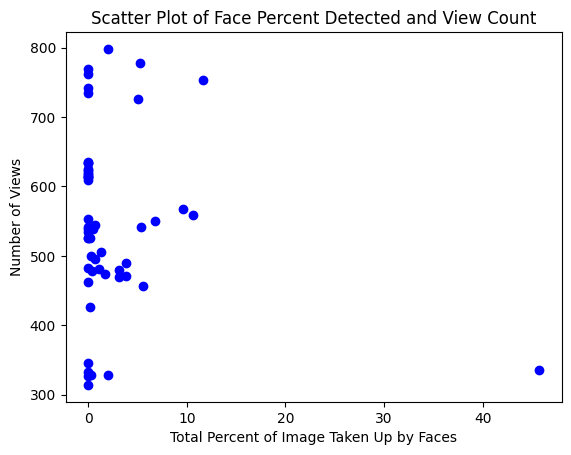

In [ ]:
#Face percentage v views
#Assisted by ChatGPT

plt.scatter(df_features['total_face_percent'],views, c ="blue")

# Add labels to x and y axes
plt.xlabel('Total Percent of Image Taken Up by Faces')
plt.ylabel('Number of Views')

# Add a title
plt.title('Scatter Plot of Face Percent Detected and View Count')

# Show plot
plt.show()

## Poisson Regression Face Num v Views

In [ ]:
#Converting data types to make regression work
#Converting face_num from numpy.int64 to float
for row in df.index:
  df['face_num'][row] = df['face_num'][row].astype(float)


<ipython-input-28-326284c46b50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['face_num'][row] = df['face_num'][row].astype(float)
<ipython-input-28-326284c46b50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['face_num'][row] = df['face_num'][row].astype(float)
<ipython-input-28-326284c46b50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['face_num'][row] = df['face_num'][row].astype(float)
<ipython-input-28-326284c46b

In [ ]:
type(df['face_num'][0])

numpy.int64

In [ ]:
type(df['total_face_percent'])

KeyError: 'total_face_percent'

In [ ]:
#Assisted by ChatGPT

import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame called 'data' with columns 'faces_detected' and 'views'
# Replace 'data' with the name of your DataFrame if it's different

# Step 1: Load your data into a DataFrame
# data = pd.read_csv('your_data.csv')

# Step 2: Perform Poisson regression
# Define independent and dependent variables
face_num = np.asarray(df['face_num'])
print(type(face_num))
#total_face_percent = np.asarray(df_features['total_face_percent'])
#print(type(total_face_percent))


X = face_num # independent variable
y = df['views']           # dependent variable

# Add a constant term to the independent variables (intercept)
X = sm.add_constant(X)

# Fit Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Step 3: Print the summary of the regression
print(poisson_model.summary())


<class 'numpy.ndarray'>
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  views   No. Observations:                   54
Model:                            GLM   Df Residuals:                       52
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -989.07
Date:                Tue, 02 Jul 2024   Deviance:                       1539.9
Time:                        11:56:01   Pearson chi2:                 1.51e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2724
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3204      0

In [ ]:
#Assisted by chatGPT

!pip install stargazer

In [ ]:
import pandas as pd
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

# Assuming you have already fit your Poisson regression model and named it poisson_model
# If not, please fit the model first

# Create a Stargazer object
stargazer = Stargazer([poisson_model])

# Customize the table format (APA style)
stargazer.custom_columns([""], [1])  # No model names, single column table
stargazer.covariate_order([])        # Exclude covariate names
stargazer.significance_levels([0.01,0.05,0.10]) # Set significance level (adjust as needed)

# Export the table to a LaTeX file
with open("poisson_regression_table.tex", "w") as f:
    f.write(stargazer.render_latex())

# Alternatively, you can export to HTML instead
with open("poisson_regression_table.html", "w") as f:
  f.write(stargazer.render_html())

# Print the LaTeX code if you want to copy it to your LaTeX document
print(stargazer.render_latex())


\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: views}} \
\cr \cline{2-2}
\\[-1.8ex] & \multicolumn{1}{c}{}  \\
\\[-1.8ex] & (1) \\
\hline \\[-1.8ex]
\hline \\[-1.8ex]
 Observations & 54 \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


In [ ]:
type(df_features['face_num'][0])

numpy.int64

In [ ]:
type(df_features['total_face_percent'][0])

float

In [ ]:
#running Poisson regression
#Code from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html

from sklearn import linear_model
clf = linear_model.PoissonRegressor()
X = df_features['face_num']
y = views
clf.fit(X, y)
print(clf.score(X, y))
print(clf.coef_)
print(clf.intercept_)


ValueError: Expected 2D array, got 1D array instead:
array=[10.  3.  1.  0.  0.  0.  0.  1.  4.  4.  1.  0.  4.  0.  0.  2.  1.  2.
  0.  0.  2. 10.  5.  9.  3.  0.  9.  4.  4.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  6.  0.  2.  0.  1.  0.  6.  1.  0.  1.  0.  2.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Code from https://medium.com/@snehabajaj108/the-poisson-exponential-distribution-using-python-2e9959fdcbc7
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Generating Poisson data
sample1 = poisson.rvs(mu=2, size=100)
sample2 = poisson.rvs(mu=5, size=100)
sample3 = poisson.rvs(mu=10, size=100)

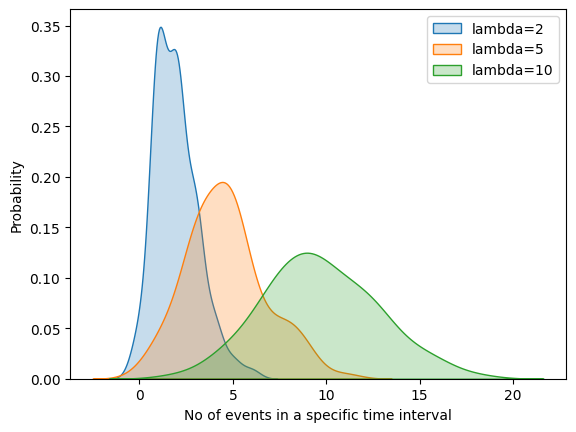

In [ ]:
#Plotting Poisson Distribution using Seaborn
sns.kdeplot(x=sample1, fill=True, label='lambda=2')
sns.kdeplot(x=sample2, fill=True, label='lambda=5')
sns.kdeplot(x=sample3, fill=True, label='lambda=10')
plt.xlabel('No of events in a specific time interval')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [ ]:
# Define the formula for Poisson regression
formula = 'views ~ face_num'

In [ ]:
# Fit the Poisson regression model
poisson_model = smf.poisson(formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 18.316180
         Iterations 4


In [ ]:
# Print the summary of the model
print(poisson_model.summary())

                          Poisson Regression Results                          
Dep. Variable:                  views   No. Observations:                   54
Model:                        Poisson   Df Residuals:                       52
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                0.008605
Time:                        12:00:29   Log-Likelihood:                -989.07
converged:                       True   LL-Null:                       -997.66
Covariance Type:            nonrobust   LLR p-value:                 3.419e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3204      0.007    910.248      0.000       6.307       6.334
face_num      -0.0089      0.002     -4.115      0.000      -0.013      -0.005


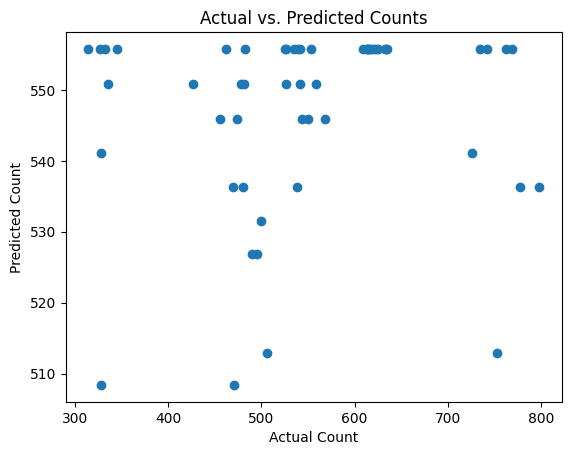

In [ ]:
# Predict the expected counts
df['predicted_count'] = poisson_model.predict(df)

# Plot predicted vs. actual counts
plt.scatter(df['views'], df['predicted_count'])
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Counts')
plt.show()

## Poisson Regression Topic v Views

In [ ]:
#importing data
# analysis assisted by ChatGPT

In [ ]:
data = pd.read_csv("/content/Text&Image_Features_4April2024_Download28Jun24.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

Unnamed: 0.1  Unnamed: 0    id  views  \
0             0           0  9328    328   
1             1           1  9329    328   
2             2           2  9330    335   
3             3           3  9334    345   
4             4           4  9337    327   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  Crew', 'Military person', 'Suit', 'Military un...        NaN        10   
1  Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...        NaN         3   
2  Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...        NaN         1   
3  Water resources', 'Ecoregion', 'Natural enviro...        NaN         0   
4  Handwriting', 'Signature', 'Font', 'Writing', ...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Define the formula for Poisson regression
formula = 'views ~ C(topic)'

In [ ]:
# Fit the Poisson regression model
poisson_model = smf.poisson(formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 13.801263
         Iterations 5


In [ ]:
# Print the summary of the model
print(poisson_model.summary())

                          Poisson Regression Results                          
Dep. Variable:                  views   No. Observations:                   54
Model:                        Poisson   Df Residuals:                       44
Method:                           MLE   Df Model:                            9
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.2530
Time:                        13:04:11   Log-Likelihood:                -745.27
converged:                       True   LL-Null:                       -997.66
Covariance Type:            nonrobust   LLR p-value:                5.445e-103
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.4133      0.008    791.936      0.000       6.397       6.429
C(topic)[T.1]    -0.1624      0.023     -6.938      0.000      -0.208      -0.117
C(topic)[T.2]    -0.0800      0.026     

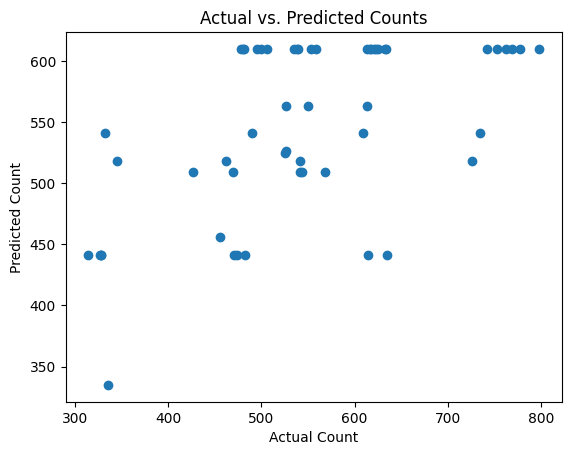

In [ ]:
# Predict the expected counts
df['predicted_count'] = poisson_model.predict(df)

# Plot predicted vs. actual counts
plt.scatter(df['views'], df['predicted_count'])
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Counts')
plt.show()

## Poisson Regression Cluster v Views

In [ ]:
df.head()

Unnamed: 0.1  Unnamed: 0    id  views  \
0             0           0  9328    328   
1             1           1  9329    328   
2             2           2  9330    335   
3             3           3  9334    345   
4             4           4  9337    327   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  Crew', 'Military person', 'Suit', 'Military un...        NaN        10   
1  Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...        NaN         3   
2  Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...        NaN         1   
3  Water resources', 'Ecoregion', 'Natural enviro...        NaN         0   
4  Handwriting', 'Signature', 'Font', 'Writing', ...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8

In [ ]:
# Define the formula for Poisson regression
formula = 'views ~ C(k_means_image_cluster)'

In [ ]:
# Fit the Poisson regression model
poisson_model = smf.poisson(formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 14.920975
         Iterations 5


In [ ]:
# Print the summary of the model
print(poisson_model.summary())

                          Poisson Regression Results                          
Dep. Variable:                  views   No. Observations:                   54
Model:                        Poisson   Df Residuals:                       44
Method:                           MLE   Df Model:                            9
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                  0.1924
Time:                        11:50:47   Log-Likelihood:                -805.73
converged:                       True   LL-Null:                       -997.66
Covariance Type:            nonrobust   LLR p-value:                 3.810e-77
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.3689      0.014    461.518      0.000       6.342       6.396
C(k_means_image_cluster)[T.1]     0.0412      0.032      1.295      0.195 

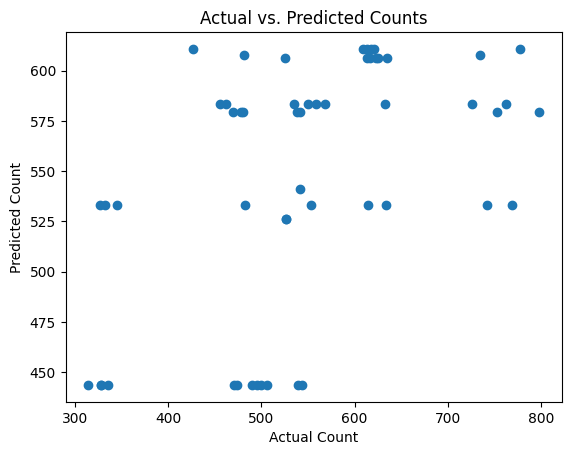

In [ ]:
# Predict the expected counts
df['predicted_count'] = poisson_model.predict(df)

# Plot predicted vs. actual counts
plt.scatter(df['views'], df['predicted_count'])
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Counts')
plt.show()

## Poisson Regression Topic, Cluster, and Face Num v Views

In [ ]:
# Convert the categorical variables to dummy variables
df_lim = pd.get_dummies(df_lim, columns=['topic', 'cluster'], dtype=int)
df_lim.head()

views  topic_0  topic_1  topic_2  topic_3  topic_4  topic_5  topic_6  \
0    328        0        0        0        0        0        0        1   
1    328        0        0        0        0        0        0        1   
2    335        0        0        0        0        0        0        0   
3    345        0        1        0        0        0        0        0   
4    327        0        0        0        0        0        0        1   

   topic_7  topic_8  ...  cluster_0  cluster_1  cluster_2  cluster_3  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        1  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  cluster_9  
0          0          0          0          0          1          0  
1          0          0          0          0          1          0  
2          0          0          0          0          1          0  
3          0          1          0          0          0          0  
4          0          1          0          0          0          0  

[5 rows x 21 columns]

In [ ]:
df_lim.sum() #checking that the counts of each one line up with the counts in my data spreadsheet
#they do

views        29540
topic_0         25
topic_1          4
topic_2          3
topic_3          5
topic_4          4
topic_5          1
topic_6          9
topic_7          1
topic_8          1
topic_9          1
cluster_0        9
cluster_1        2
cluster_2        7
cluster_3        1
cluster_4        6
cluster_5        9
cluster_6        1
cluster_7        6
cluster_8       12
cluster_9        1
dtype: int64

In [ ]:
# Define the independent variables
X = df_lim[['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4','cluster_5','cluster_6','cluster_7','cluster_8','cluster_9']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif)

#This is resulting in all variables having a VIF score of infinity
#Will try running regression to see if I can figure out why

      feature  VIF
0       const  0.0
1     topic_0  inf
2     topic_1  inf
3     topic_2  inf
4     topic_3  inf
5     topic_4  inf
6     topic_5  inf
7     topic_6  inf
8     topic_7  inf
9     topic_8  inf
10    topic_9  inf
11  cluster_0  inf
12  cluster_1  inf
13  cluster_2  inf
14  cluster_3  inf
15  cluster_4  inf
16  cluster_5  inf
17  cluster_6  inf
18  cluster_7  inf
19  cluster_8  inf
20  cluster_9  inf


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# Define the formula for Poisson regression
formula = 'views ~ topic_1 + topic_2 + topic_3 + topic_4 + topic_6 + topic_7 + topic_8 + topic_9 + cluster_1 + cluster_2 + cluster_4 + cluster_5 + cluster_6 + cluster_7 + cluster_8 + cluster_9'
#removed topic_0 and cluster_0 in regression to compare against

In [ ]:
# Fit the Poisson regression model
poisson_model = smf.poisson(formula, data=df_lim).fit()

Optimization terminated successfully.
         Current function value: 12.405057
         Iterations 5


In [ ]:
# Print the summary of the model
print(poisson_model.summary())

                          Poisson Regression Results                          
Dep. Variable:                  views   No. Observations:                   54
Model:                        Poisson   Df Residuals:                       37
Method:                           MLE   Df Model:                           16
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.3286
Time:                        12:14:06   Log-Likelihood:                -669.87
converged:                       True   LL-Null:                       -997.66
Covariance Type:            nonrobust   LLR p-value:                3.636e-129
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4501      0.016    412.759      0.000       6.419       6.481
topic_1       -0.1911      0.028     -6.740      0.000      -0.247      -0.136
topic_2       -0.0956      0.032     -2.989      0.0

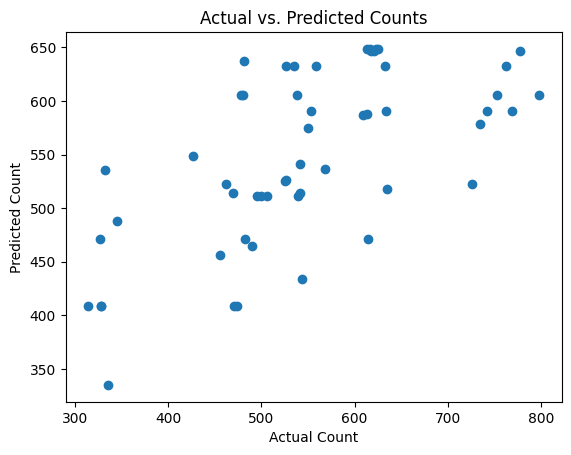

In [ ]:
# Predict the expected counts
df_lim['predicted_count'] = poisson_model.predict(df_lim)

# Plot predicted vs. actual counts
plt.scatter(df_lim['views'], df_lim['predicted_count'])
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Counts')
plt.show()

## Regression Topic and Cluster v Views

### Describing data set attributes and distribution

In [ ]:
df = pd.read_csv("/content/RIM_Telegram_Analysis_1Aug2024.csv")

In [ ]:
df.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0    id  views  \
0             0             0           0  9328    328   
1             1             1           1  9329    328   
2             2             2           2  9330    335   
3             3             3           3  9334    345   
4             4             4           4  9337    327   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  ...  \
0  Crew', 'Military person', 'Suit', 'Military un...        NaN  ...   
1  Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...        NaN  ...   
2  Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...        NaN  ...   
3  Water resources', 'Ecoregion', 'Natural enviro...        NaN  ...   
4  Handwriting', 'Signature', 'Font', 'Writing', ...        NaN  ...   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...     6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...     6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...     8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...     1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...     6   

                                      named_entities  \
0                                                NaN   
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                NaN   
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...   

                                        percent_face k_means_image_cluster  \
0  {0: {'face_height': 32, 'face_width': 28, 'fac...                     8   
1  {0: {'face_height': 24, 'face_width': 21, 'fac...                     8   
2  {0: {

In [ ]:
#Assisted by Chat GPT
#checking for multicollinearity due to error in running regression

data_lim = {
    'topic': df['topic'],
    'cluster': df['k_means_image_cluster'],
    'views': df['views'],
    'date': pd.to_datetime(df['timestamp']).dt.date
}


# Create a DataFrame
df_lim = pd.DataFrame(data_lim)

In [ ]:
df_lim.head()

topic  cluster  views        date
0      6        8    328  2022-02-15
1      6        8    328  2022-02-15
2      8        8    335  2022-02-15
3      1        5    345  2022-02-17
4      6        5    327  2022-02-19

In [ ]:
df_lim['topic'].min() #topic 0 is still there

0

In [ ]:
len(df_lim)

54

In [ ]:
print(df_lim.info()) #https://python.plainenglish.io/a-step-by-step-guide-to-count-data-analysis-in-python-a981544fc4f0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   topic    54 non-null     int64
 1   cluster  54 non-null     int64
 2   views    54 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB
None


### Testing for a normal distribution - it not a normal distribution

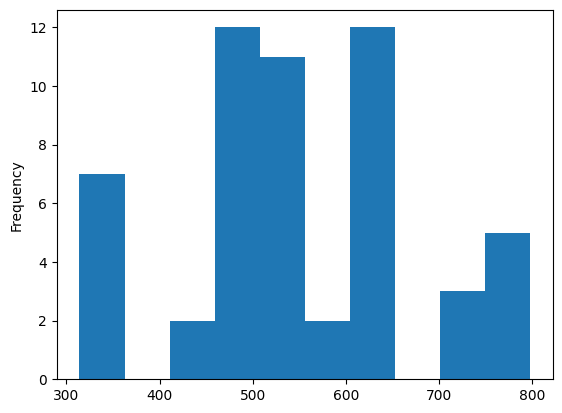

In [ ]:
#plot distribution of DV from https://python.plainenglish.io/a-step-by-step-guide-to-count-data-analysis-in-python-a981544fc4f0

histogram = df_lim['views'].plot.hist()
#sort of normal ish but not smoothly normal

In [ ]:
#Testing to see if this distribution is normal
res = stats.normaltest(df_lim['views']) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [ ]:
res.statistic

0.17330844635296186

In [ ]:
res.pvalue #shows that the rates were not not drawn from a normal distribution

0.9169941161334852

In [ ]:
#https://www.statology.org/normality-test-python/
from scipy.stats import shapiro

In [ ]:
print(shapiro(df_lim['views']))
#output: ShapiroResult(statistic=0.9556754241326626, pvalue=0.04419614421532441)
#since the p-value is less than .05 the data is not normally distributed

ShapiroResult(statistic=0.9556754241326626, pvalue=0.04419614421532441)


Since the DV is a count variable and it is not normally distributed I am trying a Poisson regression.

### Testing for a poisson distribution - it is not a poisson distribution

https://bookdown.org/roback/bookdown-BeyondMLR/ch-poissonreg.html
"4.2.1 Poisson Regression Assumptions


Much like linear least squares regression (LLSR), using Poisson regression to make inferences requires model assumptions.

1. Poisson Response The response variable is a count per unit of time or space, described by a Poisson distribution.

2. Independence The observations must be independent of one another.

3. Mean=Variance By definition, the mean of a Poisson random variable must be equal to its variance.

4. Linearity The log of the mean rate, log( λ ), must be a linear function of x."

Assessing Poisson distribution

In [ ]:
from scipy.stats import chisquare

In [ ]:
#from ChatGPT

# Calculate observed frequencies
observed_freq, _ = np.histogram(df_lim['views'], bins=range(int(df_lim['views'].max()) + 1))

lambda_ = np.mean(df_lim['views'])

# Calculate expected frequencies for Poisson distribution
expected_freq = stats.poisson.pmf(range(len(observed_freq)), lambda_) * len(df_lim['views'])

# Perform Chi-Square Test
chi2_stat, p_value = chisquare(observed_freq, expected_freq)
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-Value: {p_value}')

Chi-Square Statistic: 2.6437607608962667e+25
P-Value: 0.0


This result indicates that my data does not follow a Poisson distribution.

#### Checking over/under dispersion to see if that is why it doesn't fit a poisson distribution - the data is likely underdispersed

https://python.plainenglish.io/a-step-by-step-guide-to-count-data-analysis-in-python-a981544fc4f0


Assessing Equidispersion

In [ ]:

# Get model deviance residuals
deviance_residuals = results.resid_deviance

# Calculate residual deviance
residual_deviance = sum(deviance_residuals)

# Calculate degrees of freedom
df = results.df_resid

# Calculate the ratio
ratio = residual_deviance / df

# Display the ratio
print("Residual Deviance:", residual_deviance)
print("Degrees of Freedom:", df)
print("Residual Deviance to Degrees of Freedom Ratio:", ratio)

Residual Deviance: -6.383743341091412
Degrees of Freedom: 36
Residual Deviance to Degrees of Freedom Ratio: -0.1773262039192059


https://sakai.unc.edu/access/content/group/2842013b-58f5-4453-aa8d-3e01bacbfc3d/public/Ecol562_Spring2012/docs/lectures/lecture13.htm#:~:text=expect%20or%20equivalently-,.,we%20call%20the%20data%20underdispersed.

because the ratio is smaller than one, the data is underdispered, although this test is not always accruate for small datasets. But this underdispersion is probably good enough since it will make the estimates more conservative.



#### Checking other poisson assumptions

Assessing independence

<Figure size 1000x500 with 0 Axes>

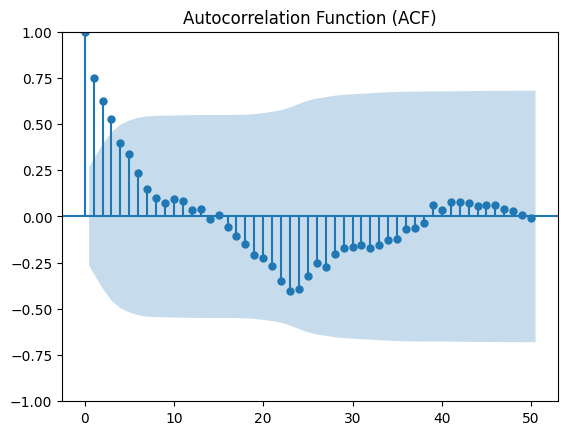

In [ ]:
#Since the views increase significantly over time I suspect they might not be independent
#Using the Autocorrelation Function (ACF) to check that
#From ChatGPT

plt.figure(figsize=(10, 5))
plot_acf(df_lim['views'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

These results show that the autocorrelation is significant at lags 1, 2, and 3. Therefore, the data points are likely not independent.

Checking mean = variance, the mean does not equal the variance

In [ ]:
#from chatGPT
mean = np.mean(df_lim['views'])
variance = np.var(df_lim['views'])
print(f'Mean: {mean}')
print(f'Variance: {variance}')
print(f'Variance-to-Mean Ratio: {variance / mean}')
#not sure if this variance is right, it seems really high?

Mean: 547.0370370370371
Variance: 15456.73936899863
Variance-to-Mean Ratio: 28.255380024574336


Assumption 4: "Linearity The log of the mean rate, log( λ ), must be a linear function of x." - have not checked this one

#### Running the poisson regression (since this was done before I checked the assumptions)

In [ ]:
#trying without already converting to dummy variables
#from https://python.plainenglish.io/a-step-by-step-guide-to-count-data-analysis-in-python-a981544fc4f0

# defining the poisson glm
poisson_glm = smf.glm(formula = 'views ~ C(topic) + C(cluster)',
                      data = df_lim,
                      family = sm.families.Poisson())

# fitting the model
results = poisson_glm.fit()

# Printing the summary of the regression results
print(results.summary())

#"The main benefit is that categorical variables in our fomula are detected automatically and treated accordingly. Additionally, we don’t have to specify our constant or intercept manually."
#pretty sure the automatic detection of categorical variables won't work
#https://www.statsmodels.org/dev/example_formulas.html using the C() operator to make sure they are treated
#as categorical
#pretty sure this is working?

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  views   No. Observations:                   54
Model:                            GLM   Df Residuals:                       36
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -658.68
Date:                Mon, 05 Aug 2024   Deviance:                       879.15
Time:                        11:42:36   Pearson chi2:                     878.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4805      0.017    3

### Mixed Effects Model

---



As far as I can tell, my data is time series data and exhibits autocorrelation at lags 1, 2, and 3 based on the results from the plot_acf() function. According to wikipedia, mixed models "are particularly useful in settings where repeated measurements are made on the same statistical units (see also longitudinal study), or where measurements are made on **clusters of related statistical units**.[2] Mixed models are often preferred over traditional analysis of variance regression models because they **don't rely on the independent observations assumption**. Further, they have their flexibility in dealing with missing values and uneven spacing of repeated measurements.[3] The Mixed model analysis allows measurements to be explicitly modeled in a wider variety of correlation and variance-covariance avoiding biased estimations. structures" emphasis added (https://en.wikipedia.org/wiki/Mixed_model). I think that my messages are clusters of related statistical units and they are not independent of one another. Therefore, I am going to try using a mixed-effects model.

https://www.st-andrews.ac.uk/media/ceed/students/mathssupport/mixedeffectsknir.pdf

Assumptions of a linear mixed effect model:

"The assumptions, for a linear mixed effects model,

• The explanatory variables are related linearly to the response. - [not sure?]

• The errors have constant variance. - [no]

• The errors are independent. - [no since there is autocorrelation]

• The errors are Normally distributed." - [there are actually kind of normally distributed]

I'm not sure if these tests work, since some of them might rely on regressions themselves? Going ahead and trying the mixed effects model. Will include potential assumption breaking in the limitations section.

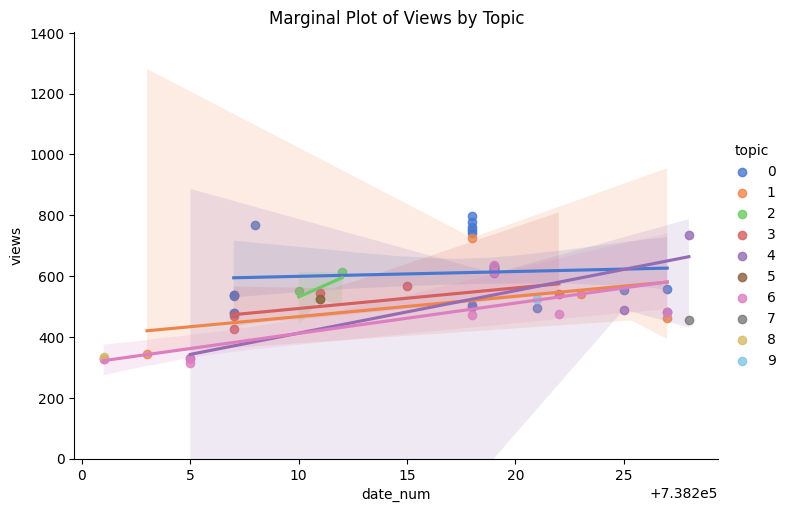

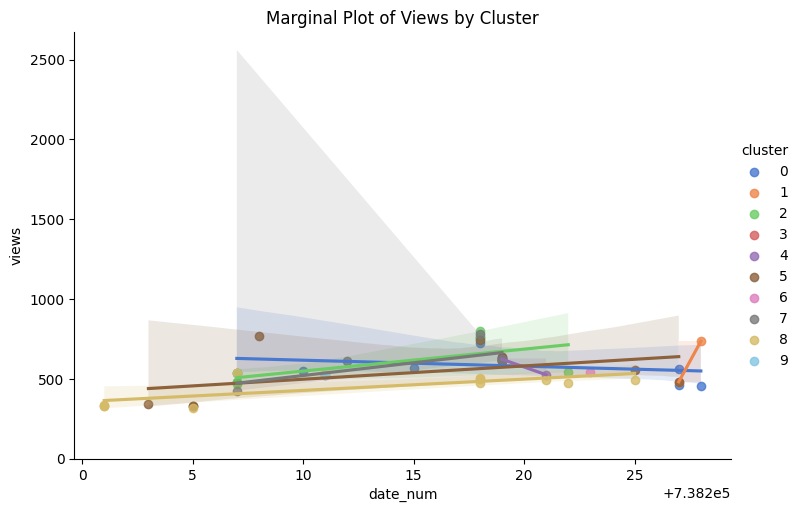

In [ ]:
#The explanatory variables are related linearly to the response.  - not sure?

#Marginal Plot - From ChatGPT

import seaborn as sns

# Marginal plot
sns.lmplot(x='date_num', y='views', hue='topic', data=df_lim, aspect=1.5, ci=95, palette='muted')
plt.ylim(bottom=0)
plt.title('Marginal Plot of Views by Topic')
plt.show()

sns.lmplot(x='date_num', y='views', hue='cluster', data=df_lim, aspect=1.5, ci=95, palette='muted')
plt.ylim(bottom=0)
plt.title('Marginal Plot of Views by Cluster')
plt.show()

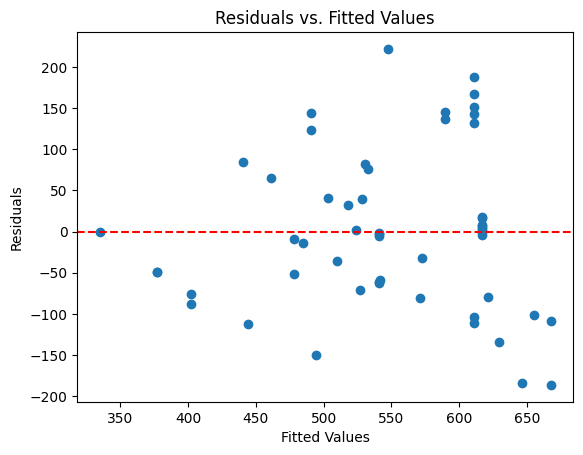

In [ ]:
#• The errors have constant variance.  - this does have a pattern, therefore there is not constant variance
# Residuals vs. Fitted Values Plot - chatGPT


# Fit a regression model
model = sm.OLS(df_lim['views'], sm.add_constant(df_lim[['date_num', 'topic']])).fit()

# Get the fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Create a residuals vs. fitted values plot
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


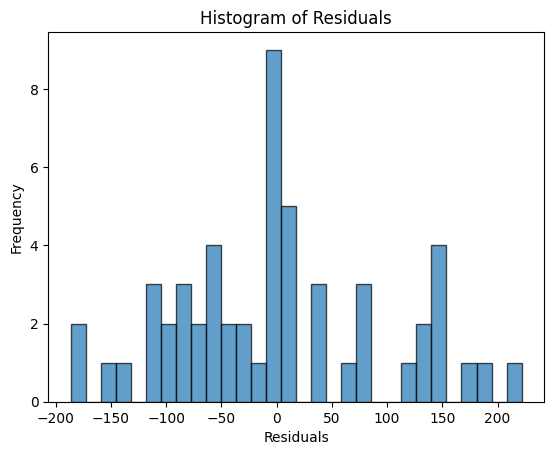

In [ ]:
#errors are normally distributed

model = sm.OLS(df_lim['views'], sm.add_constant(df_lim[['date_num', 'topic']])).fit()

# Histogram of Residuals
plt.hist(model.resid, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### Running the mixed effects model

Using every five days as a group. I originally tried using each day as a group, but the number of values in each group is too small, whihc I think might have caused the singular matrix error

In [ ]:
df_lim.head()

topic  cluster  views        date  date_num
0      6        8    328  2022-02-15    738201
1      6        8    328  2022-02-15    738201
2      8        8    335  2022-02-15    738201
3      1        5    345  2022-02-17    738203
4      6        5    327  2022-02-19    738205

In [ ]:
print(df_lim.groupby("date").count())
#there are 17 days on which messages were sent in the dataset

            topic  cluster  views  date_num
date                                       
2022-02-15      3        3      3         3
2022-02-17      1        1      1         1
2022-02-19      3        3      3         3
2022-02-21      7        7      7         7
2022-02-22      1        1      1         1
2022-02-24      1        1      1         1
2022-02-25      3        3      3         3
2022-02-26      1        1      1         1
2022-03-01      1        1      1         1
2022-03-04      9        9      9         9
2022-03-05     11       11     11        11
2022-03-07      2        2      2         2
2022-03-08      2        2      2         2
2022-03-09      1        1      1         1
2022-03-11      2        2      2         2
2022-03-13      4        4      4         4
2022-03-14      2        2      2         2


In [ ]:
print(df_lim.groupby("date_num").count())

          topic  cluster  views  date
date_num                             
738201        3        3      3     3
738203        1        1      1     1
738205        3        3      3     3
738207        7        7      7     7
738208        1        1      1     1
738210        1        1      1     1
738211        3        3      3     3
738212        1        1      1     1
738215        1        1      1     1
738218        9        9      9     9
738219       11       11     11    11
738221        2        2      2     2
738222        2        2      2     2
738223        1        1      1     1
738225        2        2      2     2
738227        4        4      4     4
738228        2        2      2     2


In [ ]:
#grouping them into five day increments to create 5 groups
#need at least 5 levels for the model https://pubmed.ncbi.nlm.nih.gov/35116198/#:~:text=As%20linear%20mixed%2Deffects%20models,associated%20with%20a%20random%20effect.

df_lim['group'] = ''

df_lim.head()

topic  cluster  views        date  date_num group
0      6        8    328  2022-02-15    738201      
1      6        8    328  2022-02-15    738201      
2      8        8    335  2022-02-15    738201      
3      1        5    345  2022-02-17    738203      
4      6        5    327  2022-02-19    738205

In [ ]:
for row in range(len(df_lim)):
  if df_lim['date_num'][row] >= 738201 and df_lim['date_num'][row] < 738206:
    df_lim['group'][row] = 0
  if df_lim['date_num'][row] >= 738206 and df_lim['date_num'][row] < 738210:
    df_lim['group'][row] = 1
  if df_lim['date_num'][row] >= 738210 and df_lim['date_num'][row] < 738215:
    df_lim['group'][row] = 2
  if df_lim['date_num'][row] >= 738215 and df_lim['date_num'][row] < 738220:
    df_lim['group'][row] = 3
  if df_lim['date_num'][row] >= 738220 and df_lim['date_num'][row] < 738225:
    df_lim['group'][row] = 4
  if df_lim['date_num'][row] >= 738225 and df_lim['date_num'][row] < 738230:
    df_lim['group'][row] = 5



In [ ]:
df_lim

topic  cluster  views        date  date_num group
0       6        8    328  2022-02-15    738201     0
1       6        8    328  2022-02-15    738201     0
2       8        8    335  2022-02-15    738201     0
3       1        5    345  2022-02-17    738203     0
4       6        5    327  2022-02-19    738205     0
5       4        5    332  2022-02-19    738205     0
6       6        8    314  2022-02-19    738205     0
7       3        7    426  2022-02-21    738207     1
8       3        2    469  2022-02-21    738207     1
9       0        2    480  2022-02-21    738207     1
10      0        2    478  2022-02-21    738207     1
11      0        0    535  2022-02-21    738207     1
12      0        2    538  2022-02-21    738207     1
13      0        8    539  2022-02-21    738207     1
14      0        5    769  2022-02-22    738208     1
15      2        0    550  2022-02-24    738210     2
16      2        9    526  2022-02-25    738211     2
17      3        8    544  2022-02-25    738211     2
18      5        3    526  2022-02-25    738211     2
19      2        7    613  2022-02-26    738212     2
20      3        0    568  2022-03-01    738215     3
21      6        8    471  2022-03-04    738218     3
22      0        8    499  2022-03-04    738218     3
23      0        8    506  2022-03-04    738218     3
24      1        0    726  2022-03-04    738218     3
25      0        0    762  2022-03-04    738218     3
26      0        2    753  2022-03-04    738218     3
27      0        2    798  2022-03-04    738218     3
28      0        7    778  2022-03-04    738218     3
29      0        5    742  2022-03-04    738218     3
30      6        5    614  2022-03-05    738219     3
31      4        7    609  2022-03-05    738219     3
32      0        7    621  2022-03-05    738219     3
33      0        4    613  2022-03-05    738219     3
34      0        4    616  2022-03-05    738219     3
35      0        7    618  2022-03-05    738219     3
36      0        4    623  2022-03-05    738219     3
37      0        5    634  2022-03-05    738219     3
38      0        4    625  2022-03-05    738219     3
39      0        0    633  2022-03-05    738219     3
40      6        4    635  2022-03-05    738219     3
41      0        8    495  2022-03-07    738221     4
42      9        4    525  2022-03-07    738221     4
43      6        8    474  2022-03-08    738222     4
44      3        2    541  2022-03-08    738222     4
45      1        6    541  2022-03-09    738223     4
46      0        5    553  2022-03-11    738225     5
47      4        8    490  2022-03-11    738225     5
48      0        1    481  2022-03-13    738227     5
49      1        0    462  2022-03-13    738227     5
50      0        0    559  2022-03-13    738227     5
51      6        5    482  2022-03-13    738227     5
52      7        0    456  2022-03-14    738228     5
53      4        1    735  2022-03-14    738228     5

In [ ]:
#running the model from Chat GPT
#import statsmodels.formula.api as smf
#grouping by each day

# Fit a mixed-effects model
mixed_model = smf.mixedlm("views ~ C(topic) + C(cluster)", df_lim, groups=df_lim["group"]).fit()

# Print summary
print(mixed_model.summary())

LinAlgError: Singular matrix

In [ ]:
#Due to the error  LinAlgError: Singular matrix checking for multicollinearity
#from chat GPT
print(df_lim.describe())


           topic    cluster       views       date_num
count  54.000000  54.000000   54.000000      54.000000
mean    2.296296   4.462963  547.037037  738215.592593
std     2.689109   2.957006  125.492533       7.766689
min     0.000000   0.000000  314.000000  738201.000000
25%     0.000000   2.000000  478.500000  738207.250000
50%     1.000000   5.000000  540.000000  738218.000000
75%     4.000000   7.000000  620.250000  738219.000000
max     9.000000   9.000000  798.000000  738228.000000


In [ ]:
# Running VIF
# Convert the categorical variables to dummy variables
df_dummies = pd.get_dummies(df_lim, columns=['topic', 'cluster'], dtype=int)
df_dummies

views        date  date_num group  topic_0  topic_1  topic_2  topic_3  \
0     328  2022-02-15    738201     0        0        0        0        0   
1     328  2022-02-15    738201     0        0        0        0        0   
2     335  2022-02-15    738201     0        0        0        0        0   
3     345  2022-02-17    738203     0        0        1        0        0   
4     327  2022-02-19    738205     0        0        0        0        0   
5     332  2022-02-19    738205     0        0        0        0        0   
6     314  2022-02-19    738205     0        0        0        0        0   
7     426  2022-02-21    738207     1        0        0        0        1   
8     469  2022-02-21    738207     1        0        0        0        1   
9     480  2022-02-21    738207     1        1        0        0        0   
10    478  2022-02-21    738207     1        1        0        0        0   
11    535  2022-02-21    738207     1        1        0        0        0   
12    538  2022-02-21    738207     1        1        0        0        0   
13    539  2022-02-21    738207     1        1        0        0        0   
14    769  2022-02-22    738208     1        1        0        0        0   
15    550  2022-02-24    738210     2        0        0        1        0   
16    526  2022-02-25    738211     2        0        0        1        0   
17    544  2022-02-25    738211     2        0        0        0        1   
18    526  2022-02-25    738211     2        0        0        0        0   
19    613  2022-02-26    738212     2        0        0        1        0   
20    568  2022-03-01    738215     3        0        0        0        1   
21    471  2022-03-04    738218     3        0        0        0        0   
22    499  2022-03-04    738218     3        1        0        0        0   
23    506  2022-03-04    738218     3        1        0        0        0   
24    726  2022-03-04    738218     3        0        1        0        0   
25    762  2022-03-04    738218     3        1        0        0        0   
26    753  2022-03-04    738218     3        1        0        0        0   
27    798  2022-03-04    738218     3        1        0        0        0   
28    778  2022-03-04    738218     3        1        0        0        0   
29    742  2022-03-04    738218     3        1        0        0        0   
30    614  2022-03-05    738219     3        0        0        0        0   
31    609  2022-03-05    738219     3        0        0        0        0   
32    621  2022-03-05    738219     3        1        0        0        0   
33    613  2022-03-05    738219     3        1        0        0        0   
34    616  2022-03-05    738219     3        1        0        0        0   
35    618  2022-03-05    738219     3        1        0        0        0   
36    623  2022-03-05    738219     3        1        0        0        0   
37    634  2022-03-05    738219     3        1        0        0        0   
38    625  2022-03-05    738219     3        1        0        0        0   
39    633  2022-03-05    738219     3        1        0        0        0   
40    635  2022-03-05    738219     3        0        0        0        0   
41    495  2022-03-07    738221     4        1        0        0        0   
42    525  2022-03-07    738221     4        0        0        0        0   
43    474  2022-03-08    738222     4        0        0        0        0   
44    541  2022-03-08    738222     4        0        0        0        1   
45    541  2022-03-09    738223     4        0        1        0        0   
46    553  2022-03-11    738225     5        1        0        0        0   
47    490  2022-03-11    738225     5        0        0        0        0   
48    481  2022-03-13    738227     5        1        0        0        0   
49    462  2022-03-13    738227     5        0        1        0        0   
50    559  2022-03-13    738227     5        1        0        0        0   


In [ ]:
# Define the independent variables
X = df_dummies[['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4','cluster_5','cluster_6','cluster_7','cluster_8','cluster_9']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif)

      feature  VIF
0       const  0.0
1     topic_0  inf
2     topic_1  inf
3     topic_2  inf
4     topic_3  inf
5     topic_4  inf
6     topic_5  inf
7     topic_6  inf
8     topic_7  inf
9     topic_8  inf
10    topic_9  inf
11  cluster_0  inf
12  cluster_1  inf
13  cluster_2  inf
14  cluster_3  inf
15  cluster_4  inf
16  cluster_5  inf
17  cluster_6  inf
18  cluster_7  inf
19  cluster_8  inf
20  cluster_9  inf


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
#since VIF is infinity, trying a correlation matrix
correlation_matrix = df_dummies.drop(columns = ['date']).corr()

print(correlation_matrix)

              views  date_num     group   topic_0   topic_1   topic_2  \
views      1.000000  0.453332  0.419081  0.469618 -0.064922  0.031141   
date_num   0.453332  1.000000  0.985450  0.150523  0.079305 -0.144763   
group      0.419081  0.985450  1.000000  0.113543  0.071212 -0.095957   
topic_0    0.469618  0.150523  0.113543  1.000000 -0.262613 -0.225189   
topic_1   -0.064922  0.079305  0.071212 -0.262613  1.000000 -0.068599   
topic_2    0.031141 -0.144763 -0.095957 -0.225189 -0.068599  1.000000   
topic_3   -0.096190 -0.132542 -0.085022 -0.296591 -0.090351 -0.077475   
topic_4   -0.012597  0.134444  0.116991 -0.262613 -0.080000 -0.068599   
topic_5   -0.023243 -0.081987 -0.054346 -0.127536 -0.038851 -0.033315   
topic_6   -0.379830 -0.150686 -0.176937 -0.415227 -0.126491 -0.108465   
topic_7   -0.100582  0.221496  0.212442 -0.127536 -0.038851 -0.033315   
topic_8   -0.234269 -0.260506 -0.232204 -0.127536 -0.038851 -0.033315   
topic_9   -0.024348  0.096533  0.123513 -0.127536 -

In [ ]:
#adapted from chat GPT

print("\nUsing iteritems():")
for col in correlation_matrix.columns:
    for index in correlation_matrix.index:
      if correlation_matrix.at[index, col] >= .5:
        print(f'Correlation between {index} and {col}: {correlation_matrix.at[index, col]:.2f}')
#there is a perfect correlation between cluster 3 and topic 5
#excluding cluster 3 and topic 5 from the model


Using iteritems():
Correlation between views and views: 1.00
Correlation between date_num and date_num: 1.00
Correlation between group and date_num: 0.99
Correlation between date_num and group: 0.99
Correlation between group and group: 1.00
Correlation between topic_0 and topic_0: 1.00
Correlation between topic_1 and topic_1: 1.00
Correlation between topic_2 and topic_2: 1.00
Correlation between cluster_9 and topic_2: 0.57
Correlation between topic_3 and topic_3: 1.00
Correlation between topic_4 and topic_4: 1.00
Correlation between topic_5 and topic_5: 1.00
Correlation between cluster_3 and topic_5: 1.00
Correlation between topic_6 and topic_6: 1.00
Correlation between topic_7 and topic_7: 1.00
Correlation between topic_8 and topic_8: 1.00
Correlation between topic_9 and topic_9: 1.00
Correlation between cluster_0 and cluster_0: 1.00
Correlation between cluster_1 and cluster_1: 1.00
Correlation between cluster_2 and cluster_2: 1.00
Correlation between topic_5 and cluster_3: 1.00
Corr

In [ ]:
df_dummies

views        date  date_num group  topic_0  topic_1  topic_2  topic_3  \
0     328  2022-02-15    738201     0        0        0        0        0   
1     328  2022-02-15    738201     0        0        0        0        0   
2     335  2022-02-15    738201     0        0        0        0        0   
3     345  2022-02-17    738203     0        0        1        0        0   
4     327  2022-02-19    738205     0        0        0        0        0   
5     332  2022-02-19    738205     0        0        0        0        0   
6     314  2022-02-19    738205     0        0        0        0        0   
7     426  2022-02-21    738207     1        0        0        0        1   
8     469  2022-02-21    738207     1        0        0        0        1   
9     480  2022-02-21    738207     1        1        0        0        0   
10    478  2022-02-21    738207     1        1        0        0        0   
11    535  2022-02-21    738207     1        1        0        0        0   
12    538  2022-02-21    738207     1        1        0        0        0   
13    539  2022-02-21    738207     1        1        0        0        0   
14    769  2022-02-22    738208     1        1        0        0        0   
15    550  2022-02-24    738210     2        0        0        1        0   
16    526  2022-02-25    738211     2        0        0        1        0   
17    544  2022-02-25    738211     2        0        0        0        1   
18    526  2022-02-25    738211     2        0        0        0        0   
19    613  2022-02-26    738212     2        0        0        1        0   
20    568  2022-03-01    738215     3        0        0        0        1   
21    471  2022-03-04    738218     3        0        0        0        0   
22    499  2022-03-04    738218     3        1        0        0        0   
23    506  2022-03-04    738218     3        1        0        0        0   
24    726  2022-03-04    738218     3        0        1        0        0   
25    762  2022-03-04    738218     3        1        0        0        0   
26    753  2022-03-04    738218     3        1        0        0        0   
27    798  2022-03-04    738218     3        1        0        0        0   
28    778  2022-03-04    738218     3        1        0        0        0   
29    742  2022-03-04    738218     3        1        0        0        0   
30    614  2022-03-05    738219     3        0        0        0        0   
31    609  2022-03-05    738219     3        0        0        0        0   
32    621  2022-03-05    738219     3        1        0        0        0   
33    613  2022-03-05    738219     3        1        0        0        0   
34    616  2022-03-05    738219     3        1        0        0        0   
35    618  2022-03-05    738219     3        1        0        0        0   
36    623  2022-03-05    738219     3        1        0        0        0   
37    634  2022-03-05    738219     3        1        0        0        0   
38    625  2022-03-05    738219     3        1        0        0        0   
39    633  2022-03-05    738219     3        1        0        0        0   
40    635  2022-03-05    738219     3        0        0        0        0   
41    495  2022-03-07    738221     4        1        0        0        0   
42    525  2022-03-07    738221     4        0        0        0        0   
43    474  2022-03-08    738222     4        0        0        0        0   
44    541  2022-03-08    738222     4        0        0        0        1   
45    541  2022-03-09    738223     4        0        1        0        0   
46    553  2022-03-11    738225     5        1        0        0        0   
47    490  2022-03-11    738225     5        0        0        0        0   
48    481  2022-03-13    738227     5        1        0        0        0   
49    462  2022-03-13    738227     5        0        1        0        0   
50    559  2022-03-13    738227     5        1        0        0        0   


In [ ]:
#dropping the cluster 3 and topic 5 columns from the df

df_dummies_lim = df_dummies.drop(columns = ['topic_5','cluster_3'])

In [ ]:
df_dummies_lim.head()

views        date  date_num group  topic_0  topic_1  topic_2  topic_3  \
0    328  2022-02-15    738201     0        0        0        0        0   
1    328  2022-02-15    738201     0        0        0        0        0   
2    335  2022-02-15    738201     0        0        0        0        0   
3    345  2022-02-17    738203     0        0        1        0        0   
4    327  2022-02-19    738205     0        0        0        0        0   

   topic_4  topic_6  ...  topic_9  cluster_0  cluster_1  cluster_2  cluster_4  \
0        0        1  ...        0          0          0          0          0   
1        0        1  ...        0          0          0          0          0   
2        0        0  ...        0          0          0          0          0   
3        0        0  ...        0          0          0          0          0   
4        0        1  ...        0          0          0          0          0   

   cluster_5  cluster_6  cluster_7  cluster_8  cluster_9  
0          0          0          0          1          0  
1          0          0          0          1          0  
2          0          0          0          1          0  
3          1          0          0          0          0  
4          1          0          0          0          0  

[5 rows x 22 columns]

In [ ]:
#Running the mixed-effects model without cluster 3 or topic 5

# Fit a mixed-effects model
mixed_model = smf.mixedlm("views ~ 'topic_0' + 'topic_1' + 'topic_2' + 'topic_3' + 'topic_4' + 'topic_6' + 'topic_7' + 'topic_8' + 'topic_9' + 'cluster_0' + 'cluster_1' + 'cluster_2' + 'cluster_4' + 'cluster_5' + 'cluster_6' + 'cluster_7' + 'cluster_8' + 'cluster_9'", df_dummies, groups=df_dummies["group"]).fit()

# Print summary
print(mixed_model.summary())

PatsyError: Number of rows mismatch between data argument and 'topic_0' (54 versus 1)
    views ~ 'topic_0' + 'topic_1' + 'topic_2' + 'topic_3' + 'topic_4' + 'topic_6' + 'topic_7' + 'topic_8' + 'topic_9' + 'cluster_0' + 'cluster_1' + 'cluster_2' + 'cluster_4' + 'cluster_5' + 'cluster_6' + 'cluster_7' + 'cluster_8' + 'cluster_9'
            ^^^^^^^^^

In [ ]:
df_lim

topic  cluster  views        date  date_num group
0       6        8    328  2022-02-15    738201     0
1       6        8    328  2022-02-15    738201     0
2       8        8    335  2022-02-15    738201     0
3       1        5    345  2022-02-17    738203     0
4       6        5    327  2022-02-19    738205     0
5       4        5    332  2022-02-19    738205     0
6       6        8    314  2022-02-19    738205     0
7       3        7    426  2022-02-21    738207     1
8       3        2    469  2022-02-21    738207     1
9       0        2    480  2022-02-21    738207     1
10      0        2    478  2022-02-21    738207     1
11      0        0    535  2022-02-21    738207     1
12      0        2    538  2022-02-21    738207     1
13      0        8    539  2022-02-21    738207     1
14      0        5    769  2022-02-22    738208     1
15      2        0    550  2022-02-24    738210     2
16      2        9    526  2022-02-25    738211     2
17      3        8    544  2022-02-25    738211     2
18      5        3    526  2022-02-25    738211     2
19      2        7    613  2022-02-26    738212     2
20      3        0    568  2022-03-01    738215     3
21      6        8    471  2022-03-04    738218     3
22      0        8    499  2022-03-04    738218     3
23      0        8    506  2022-03-04    738218     3
24      1        0    726  2022-03-04    738218     3
25      0        0    762  2022-03-04    738218     3
26      0        2    753  2022-03-04    738218     3
27      0        2    798  2022-03-04    738218     3
28      0        7    778  2022-03-04    738218     3
29      0        5    742  2022-03-04    738218     3
30      6        5    614  2022-03-05    738219     3
31      4        7    609  2022-03-05    738219     3
32      0        7    621  2022-03-05    738219     3
33      0        4    613  2022-03-05    738219     3
34      0        4    616  2022-03-05    738219     3
35      0        7    618  2022-03-05    738219     3
36      0        4    623  2022-03-05    738219     3
37      0        5    634  2022-03-05    738219     3
38      0        4    625  2022-03-05    738219     3
39      0        0    633  2022-03-05    738219     3
40      6        4    635  2022-03-05    738219     3
41      0        8    495  2022-03-07    738221     4
42      9        4    525  2022-03-07    738221     4
43      6        8    474  2022-03-08    738222     4
44      3        2    541  2022-03-08    738222     4
45      1        6    541  2022-03-09    738223     4
46      0        5    553  2022-03-11    738225     5
47      4        8    490  2022-03-11    738225     5
48      0        1    481  2022-03-13    738227     5
49      1        0    462  2022-03-13    738227     5
50      0        0    559  2022-03-13    738227     5
51      6        5    482  2022-03-13    738227     5
52      7        0    456  2022-03-14    738228     5
53      4        1    735  2022-03-14    738228     5

In [ ]:
#dropping the one data point that is in cluster 3
df_lim_noc3 = df = df_lim.drop(df_lim[df_lim['cluster'] == 3].index) #https://saturncloud.io/blog/how-to-delete-dataframe-rows-in-pandas-based-on-column-value/#:~:text=Deleting%20Rows%20based%20on%20Column,of%20row%20labels%20to%20delete.&text=In%20this%20example%2C%20we%20created,name%20%2C%20age%20%2C%20and%20city%20.

In [ ]:
#Running the mixed-effects model without the data point that had cluster 3

# Fit a mixed-effects model
mixed_model = smf.mixedlm("views ~ C(topic) + C(cluster)", df_lim_noc3, groups=df_lim_noc3["group"]).fit()

# Print summary
print(mixed_model.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    views    
No. Observations:    53         Method:                REML     
No. Groups:          6          Scale:                 6579.4054
Min. group size:     4          Log-Likelihood:        -223.1480
Max. group size:     21         Converged:             Yes      
Mean group size:     8.8                                        
----------------------------------------------------------------
                  Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
----------------------------------------------------------------
Intercept         580.090   59.657  9.724 0.000  463.164 697.016
C(topic)[T.1]     -39.575   57.324 -0.690 0.490 -151.928  72.779
C(topic)[T.2]     -72.147  108.339 -0.666 0.505 -284.488 140.194
C(topic)[T.3]     -83.125   47.033 -1.767 0.077 -175.308   9.058
C(topic)[T.4]       4.557   50.463  0.090 0.928  -94.349 103.463
C(topic)[T.6]     -46.791   40.663 -1.1

None of the topics or clusters are significant. The only two that got closer were topic 3 and cluster 8.

#### Past attempts

In [ ]:
#Assisted by Chat GPT
#checking for multicollinearity due to error in running regression

# Sample data with categorical and numerical variables
data_lim = {
    'topic': df['topic'][0:],
    'cluster': df['k_means_image_cluster'][0:],
    'face_num': df['face_num'],
    'views': df['views']
}


# Create a DataFrame
df_lim = pd.DataFrame(data_lim)

In [ ]:
df_lim.head()

topic  cluster  face_num  views
0      6        8        10    328
1      6        8         3    328
2      8        8         1    335
3      1        5         0    345
4      6        5         0    327

In [ ]:
# Define the formula for Poisson regression
formula = 'views ~ topic_1 + topic_2 + topic_3 + topic_4 + topic_6 + topic_7 + topic_8 + topic_9 + cluster_1 + cluster_2 + cluster_4 + cluster_5 + cluster_6 + cluster_7 + cluster_8 + cluster_9 + face_num'

In [ ]:
# Fit the Poisson regression model
poisson_model = smf.poisson(formula, data=df_lim).fit()

Optimization terminated successfully.
         Current function value: 12.152150
         Iterations 5


In [ ]:
# Print the summary of the model
print(poisson_model.summary())

                          Poisson Regression Results                          
Dep. Variable:                  views   No. Observations:                   54
Model:                        Poisson   Df Residuals:                       36
Method:                           MLE   Df Model:                           17
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                  0.3422
Time:                        11:47:44   Log-Likelihood:                -656.22
converged:                       True   LL-Null:                       -997.66
Covariance Type:            nonrobust   LLR p-value:                3.765e-134
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4360      0.016    404.498      0.000       6.405       6.467
topic_1       -0.1987      0.028     -6.992      0.000      -0.254      -0.143
topic_2       -0.0961      0.032     -3.005      0.0

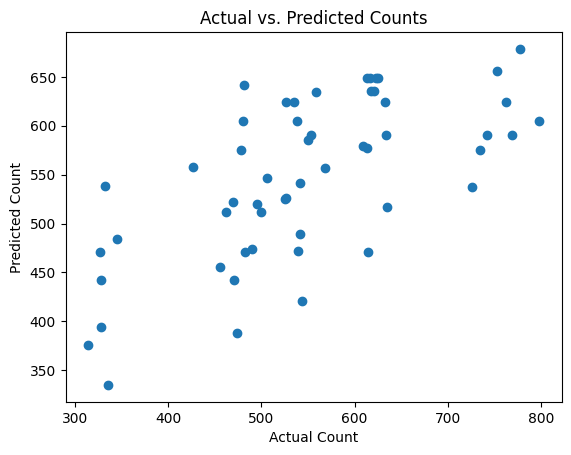

In [ ]:
# Predict the expected counts
df_lim['predicted_count'] = poisson_model.predict(df_lim)

# Plot predicted vs. actual counts
plt.scatter(df_lim['views'], df_lim['predicted_count'])
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Counts')
plt.show()

# Data Reformatting for Export

Reformatting data so that it is more legible when opening as an Excel. Largely following the format: post metadata, post text, image labels, number of people, facial attributes, image embedding, text attributes, and multimodal attributes

## Reformatting Feature Dataframe

In [ ]:
df_features = pd.read_csv("/content/Text&Image_Features_28Mar024.csv")

In [ ]:
df_features.head()

Unnamed: 0    id                               image  \
0           0  9328  photo_3919@15-02-2022_09-28-20.jpg   
1           1  9329  photo_3920@15-02-2022_09-32-43.jpg   
2           2  9330  photo_3921@15-02-2022_12-59-58.jpg   
3           3  9334  photo_3922@17-02-2022_12-33-57.jpg   
4           4  9337  photo_3923@18-02-2022_20-08-32.jpg   

                                                text  \
0        Солдаты в мундирах разных времен, 1912 год.   
1  В Украине ввели уголовную ответственность за а...   
2  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  Люди,которые поддерживают марксизм / Лидеры ма...   
4  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  views  \
0                     солдат мундир разный время год    328   
1  украина вводить уголовный ответственность анти...    328   
2  настоящий любовь день влюбленный февраль год р...    335   
3  человек который поддерживать марксизм лидер ма...    345   
4  рекомендация снятие золотой зубной протез умир...    327   

                                              labels  \
0  [mid: "/m/01zpz"\ndescription: "Crew"\nscore: ...   
1  [mid: "/m/04bcr3"\ndescription: "Table"\nscore...   
2  [mid: "/m/025kyy"\ndescription: "Forehead"\nsc...   
3  [mid: "/m/015s2f"\ndescription: "Water resourc...   
4  [mid: "/m/0gkxy13"\ndescription: "Handwriting"...   

                                          label_list  \
0  ['Crew', 'Military person', 'Suit', 'Military ...   
1  ['Table', 'Furniture', 'Chair', 'Cabinetry', '...   
2  ['Forehead', 'Eyebrow', 'Beard', 'Facial hair'...   
3  ['Water resources', 'Ecoregion', 'Natural envi...   
4  ['Handwriting', 'Signature', 'Font', 'Writing'...   

                                               faces  face_num logos  \
0  [bounding_poly {\n  vertices {\n    x: 482\n  ...        10    []   
1  [bounding_poly {\n  vertices {\n    x: 424\n  ...         3    []   
2  [bounding_poly {\n  vertices {\n    x: 93\n  }...         1    []   
3                                                 []         0    []   
4                                                 []         0    []   

                                         image_embed  topic  \
0  tensor([[-5.3945e-02,  4.8141e-01, -1.5532e-01...      6   
1  tensor([[ 2.9389e-01, -3.0918e-01,  2.4409e-01...      6   
2  tensor([[-0.4646,  0.5783,  0.4078, -0.2127, -...      8   
3  tensor([[-1.8600e-01,  4.2391e-01, -2.4769e-01...      1   
4  tensor([[-3.7463e-01,  8.6842e-01,  1.3163e-01...      6   

                                      named_entities  \
0                                                 ()   
1                                         (украина,)   
2  (анатолий чистоусов, анатолий, грозный, анатол...   
3                                                 ()   
4                                          (аушвиц,)   

                                          text_embed  \
0  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
1  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
2  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
3  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   
4  tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0....   

                                   cosine_similarity  
0  tensor([[-4.9880e-01,  8.5947e-02, -3.1109e-01...  
1  tensor([[ 1.0315e-02, -2.7515e-01,  3.2369e-02...  
2  tensor([[-3.1335e-01,  7.0742e-02,  9.5767e-03...  
3  tensor([[-2.6191e-01,  7.0323e-01, -1.4242e-01...  
4  tensor([[-2.8352e-01,  1.6074e-01, -1.1193e-01...

In [ ]:
#Code from https://saturncloud.io/blog/how-to-create-an-empty-dataframe-with-only-column-names-in-pandas/

df_features_formatted = pd.DataFrame(columns=['id','views', 'text','clean_text','image_name','label_list','logos_list','face_num','face_emotion','face_location','face_roll_pan_tilt','image_embedding','topic','named_entities','text_embedding','cosine_similarity'])
df_features_formatted.head()

Empty DataFrame
Columns: [id, views, text, clean_text, image_name, label_list, logos_list, face_num, face_emotion, face_location, face_roll_pan_tilt, image_embedding, topic, named_entities, text_embedding, cosine_similarity]
Index: []

In [ ]:
df_features_formatted['id'] = df_features['id']
df_features_formatted.head()

id views text clean_text image_name label_list logos_list face_num  \
0  9328   NaN  NaN        NaN        NaN        NaN        NaN      NaN   
1  9329   NaN  NaN        NaN        NaN        NaN        NaN      NaN   
2  9330   NaN  NaN        NaN        NaN        NaN        NaN      NaN   
3  9334   NaN  NaN        NaN        NaN        NaN        NaN      NaN   
4  9337   NaN  NaN        NaN        NaN        NaN        NaN      NaN   

  face_emotion face_location face_roll_pan_tilt image_embedding topic  \
0          NaN           NaN                NaN             NaN   NaN   
1          NaN           NaN                NaN             NaN   NaN   
2          NaN           NaN                NaN             NaN   NaN   
3          NaN           NaN                NaN             NaN   NaN   
4          NaN           NaN                NaN             NaN   NaN   

  named_entities text_embedding cosine_similarity  
0            NaN            NaN               NaN  
1            NaN            NaN               NaN  
2            NaN            NaN               NaN  
3            NaN            NaN               NaN  
4            NaN            NaN               NaN

In [ ]:
df_features_formatted['views'] = df_features['views']
df_features_formatted.head()

id  views text clean_text image_name label_list logos_list face_num  \
0  9328    328  NaN        NaN        NaN        NaN        NaN      NaN   
1  9329    328  NaN        NaN        NaN        NaN        NaN      NaN   
2  9330    335  NaN        NaN        NaN        NaN        NaN      NaN   
3  9334    345  NaN        NaN        NaN        NaN        NaN      NaN   
4  9337    327  NaN        NaN        NaN        NaN        NaN      NaN   

  face_emotion face_location face_roll_pan_tilt image_embedding topic  \
0          NaN           NaN                NaN             NaN   NaN   
1          NaN           NaN                NaN             NaN   NaN   
2          NaN           NaN                NaN             NaN   NaN   
3          NaN           NaN                NaN             NaN   NaN   
4          NaN           NaN                NaN             NaN   NaN   

  named_entities text_embedding cosine_similarity  
0            NaN            NaN               NaN  
1            NaN            NaN               NaN  
2            NaN            NaN               NaN  
3            NaN            NaN               NaN  
4            NaN            NaN               NaN

In [ ]:
df_features_formatted['text'] = df_features['text']
df_features_formatted.head()

id  views                                               text clean_text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.        NaN   
1  9329    328  В Украине ввели уголовную ответственность за а...        NaN   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...        NaN   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...        NaN   
4  9337    327  Рекомендации по снятию золотых зубных протезов...        NaN   

  image_name label_list logos_list face_num face_emotion face_location  \
0        NaN        NaN        NaN      NaN          NaN           NaN   
1        NaN        NaN        NaN      NaN          NaN           NaN   
2        NaN        NaN        NaN      NaN          NaN           NaN   
3        NaN        NaN        NaN      NaN          NaN           NaN   
4        NaN        NaN        NaN      NaN          NaN           NaN   

  face_roll_pan_tilt image_embedding topic named_entities text_embedding  \
0                NaN             NaN   NaN            NaN            NaN   
1                NaN             NaN   NaN            NaN            NaN   
2                NaN             NaN   NaN            NaN            NaN   
3                NaN             NaN   NaN            NaN            NaN   
4                NaN             NaN   NaN            NaN            NaN   

  cosine_similarity  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [ ]:
df_features_formatted['clean_text'] = df_features['clean_text']
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text image_name label_list  \
0                     солдат мундир разный время год        NaN        NaN   
1  украина вводить уголовный ответственность анти...        NaN        NaN   
2  настоящий любовь день влюбленный февраль год р...        NaN        NaN   
3  человек который поддерживать марксизм лидер ма...        NaN        NaN   
4  рекомендация снятие золотой зубной протез умир...        NaN        NaN   

  logos_list face_num face_emotion face_location face_roll_pan_tilt  \
0        NaN      NaN          NaN           NaN                NaN   
1        NaN      NaN          NaN           NaN                NaN   
2        NaN      NaN          NaN           NaN                NaN   
3        NaN      NaN          NaN           NaN                NaN   
4        NaN      NaN          NaN           NaN                NaN   

  image_embedding topic named_entities text_embedding cosine_similarity  
0             NaN   NaN            NaN            NaN               NaN  
1             NaN   NaN            NaN            NaN               NaN  
2             NaN   NaN            NaN            NaN               NaN  
3             NaN   NaN            NaN            NaN               NaN  
4             NaN   NaN            NaN            NaN               NaN

In [ ]:
df_features_formatted['image_name'] = df_features['image']
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name label_list logos_list face_num  \
0  photo_3919@15-02-2022_09-28-20.jpg        NaN        NaN      NaN   
1  photo_3920@15-02-2022_09-32-43.jpg        NaN        NaN      NaN   
2  photo_3921@15-02-2022_12-59-58.jpg        NaN        NaN      NaN   
3  photo_3922@17-02-2022_12-33-57.jpg        NaN        NaN      NaN   
4  photo_3923@18-02-2022_20-08-32.jpg        NaN        NaN      NaN   

  face_emotion face_location face_roll_pan_tilt image_embedding topic  \
0          NaN           NaN                NaN             NaN   NaN   
1          NaN           NaN                NaN             NaN   NaN   
2          NaN           NaN                NaN             NaN   NaN   
3          NaN           NaN                NaN             NaN   NaN   
4          NaN           NaN                NaN             NaN   NaN   

  named_entities text_embedding cosine_similarity  
0            NaN            NaN               NaN  
1            NaN            NaN               NaN  
2            NaN            NaN               NaN  
3            NaN            NaN               NaN  
4            NaN            NaN               NaN

In [ ]:
for row in df_features_formatted.index:
  if type(df_features['label_list'][row]) == str:
    df_features_formatted['label_list'][row] = df_features['label_list'][row].strip("[]") #https://tech.sadaalomma.com/python/remove-the-first-and-last-character-from-string-python/#:~:text=The%20strip()%20method%20removes,we%20can%20effectively%20remove%20them.
  else:
    df_features_formatted['label_list'][row] = df_features['label_list'][row].astype(str).strip("[]")
df_features_formatted.head()

In [ ]:
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

  face_emotion face_location face_roll_pan_tilt image_embedding topic  \
0          NaN           NaN                NaN             NaN   NaN   
1          NaN           NaN                NaN             NaN   NaN   
2          NaN           NaN                NaN             NaN   NaN   
3          NaN           NaN                NaN             NaN   NaN   
4          NaN           NaN                NaN             NaN   NaN   

  named_entities text_embedding cosine_similarity  
0            NaN            NaN               NaN  
1            NaN            NaN               NaN  
2            NaN            NaN               NaN  
3            NaN            NaN               NaN  
4            NaN            NaN               NaN

In [ ]:
df_features['logos'][15][0].description

'National Guard of Russia'

In [ ]:
for row in df_features_formatted.index:
  if len(df_features['logos'][row]) > 0:
    #print(df_features['logos'][row])
    logos_list = []
    iter = 0
    while iter < len(df_features['logos'][row]):
      logos_list += [df_features['logos'][row][iter].description] #https://www.geeksforgeeks.org/python-append-string-to-list/
      iter += 1
      #print(logos_list)
    df_features_formatted['logos_list'][row] = logos_list
    df_features_formatted['logos_list'][row] = str(df_features_formatted['logos_list'][row]).strip("[]")

<ipython-input-67-0288c66379e2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_formatted['logos_list'][row] = logos_list
<ipython-input-67-0288c66379e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_formatted['logos_list'][row] = str(df_features_formatted['logos_list'][row]).strip("[]")


In [ ]:
df_features_formatted.head(10)

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   
5  9338    332                               ❗️В ДНР мобилизация.   
6  9340    314  ['В начале января этого года испанские исследо...   
7  9346    426  Перед вступлением на царский престол Николая I...   
8  9347    469  Сегодняшний пикет Сербской Акции и Зентропи Се...   
9  9348    480                                                NaN   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   
5                                  в днр мобилизация   
6  [' начало январь год испанский исследователь п...   
7  вступление царский престол николай ii населени...   
8  сегодняшний пикет сербский акция зентропить се...   
9                                                NaN   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   
5  photo_3924@19-02-2022_02-13-56.jpg   
6  photo_3925@19-02-2022_08-12-21.jpg   
7  photo_3926@21-02-2022_04-30-41.jpg   
8  photo_3927@21-02-2022_16-46-33.jpg   
9  photo_3927@21-02-2022_16-46-33.jpg   

                                          label_list  \
0  'Crew', 'Military person', 'Suit', 'Military u...   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...   
3  'Water resources', 'Ecoregion', 'Natural envir...   
4  'Handwriting', 'Signature', 'Font', 'Writing',...   
5  'Font', 'Parallel', 'Signature', 'Paper', 'Pap...   
6  'Product', 'Azure', 'Rectangle', 'Blue', 'Flui...   
7  'Sky', 'Cloud', 'Building', 'Working animal', ...   
8  'Street light', 'Building', 'Light', 'Infrastr...   
9  'Street light', 'Building', 'Light', 'Infrastr...   

                                          logos_list  face_num face_emotion  \
0                                                NaN        10          NaN   
1                                                NaN         3          NaN   
2                                                NaN         1          NaN   
3                                                NaN         0          NaN   
4                                                NaN         0          NaN   
5  "Donetsk People's Republic", "Donetsk People's...         0          NaN   
6                                                NaN         0          NaN   
7                                                NaN         1          NaN   
8                                                NaN         4          NaN   
9                                                NaN         4          NaN   

  face_location face_roll_pan_tilt image_embedding topic named_entities  \
0           NaN                NaN             NaN   NaN            NaN   
1           NaN                NaN             NaN   NaN            NaN   
2           NaN                NaN             NaN   NaN            NaN   
3           NaN                NaN             NaN   NaN            NaN   
4           NaN                NaN             NaN   NaN            NaN   
5           NaN                NaN             NaN   NaN            NaN   
6           NaN                NaN             NaN   NaN            NaN   
7           NaN                NaN             NaN   NaN            NaN   
8           Na

In [ ]:
df_features_formatted['face_num'] = df_features['face_num']
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

  face_emotion face_location face_roll_pan_tilt image_embedding topic  \
0          NaN           NaN                NaN             NaN   NaN   
1          NaN           NaN                NaN             NaN   NaN   
2          NaN           NaN                NaN             NaN   NaN   
3          NaN           NaN                NaN             NaN   NaN   
4          NaN           NaN                NaN             NaN   NaN   

  named_entities text_embedding cosine_similarity  
0            NaN            NaN               NaN  
1            NaN            NaN               NaN  
2            NaN            NaN               NaN  
3            NaN            NaN               NaN  
4            NaN            NaN               NaN

In [ ]:
for row in df_features_formatted.index:
  face_emotion_dict = {}
  face_count = 0
  for face in df_features['faces'][row]:
    emotion_dict = {'anger': '{}'.format(face.anger_likelihood),'joy':'{}'.format(face.joy_likelihood),'surprise':'{}'.format(face.surprise_likelihood),'sorrow':'{}'.format(face.sorrow_likelihood)}
    face_emotion_dict[face_count] = emotion_dict
    face_count += 1
  df_features_formatted['face_emotion'][row] = face_emotion_dict


<ipython-input-70-8d4e01c82653>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_formatted['face_emotion'][row] = face_emotion_dict


In [ ]:
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion face_location  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...           NaN   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...           NaN   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...           NaN   
3                                                 {}           NaN   
4                                                 {}           NaN   

  face_roll_pan_tilt image_embedding topic named_entities text_embedding  \
0                NaN             NaN   NaN            NaN            NaN   
1                NaN             NaN   NaN            NaN            NaN   
2                NaN             NaN   NaN            NaN            NaN   
3                NaN             NaN   NaN            NaN            NaN   
4                NaN             NaN   NaN            NaN            NaN   

  cosine_similarity  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [ ]:
df_features_formatted['face_emotion'][0]

{0: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'},
 1: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'},
 2: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'},
 3: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'},
 4: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'},
 5: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'},
 6: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'},
 7: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'},
 8: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'},
 9: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'}}

In [ ]:
df_features_formatted['face_emotion'][15]

{0: {'anger': '1', 'joy': '5', 'surprise': '1', 'sorrow': '1'},
 1: {'anger': '1', 'joy': '1', 'surprise': '1', 'sorrow': '1'}}

In [ ]:
for face in df_features['faces'][15]:
  print('anger: {}'.format(face.anger_likelihood))
  print('joy: {}'.format(face.joy_likelihood))
  print('surprise: {}'.format(face.surprise_likelihood))
  print('sorrow: {}'.format(face.sorrow_likelihood))
  vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in face.bounding_poly.vertices])
  print('face bounds: {}'.format(','.join(vertices)))

anger: 1
joy: 1
surprise: 1
sorrow: 1
face bounds: (259,109),(477,109),(477,363),(259,363)
anger: 1
joy: 5
surprise: 1
sorrow: 1
face bounds: (592,160),(785,160),(785,385),(592,385)


In [ ]:
for row in df_features_formatted.index:
  face_bounds_dict = {}
  face_count = 0
  for face in df_features['faces'][row]:
    vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in face.bounding_poly.vertices])
    face_bounds_dict[face_count] = '{}'.format(','.join(vertices))
    face_count += 1
  df_features_formatted['face_location'][row] = face_bounds_dict

<ipython-input-73-2a2ace78f283>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_formatted['face_location'][row] = face_bounds_dict


In [ ]:
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location face_roll_pan_tilt  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...                NaN   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...                NaN   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}                NaN   
3                                                 {}                NaN   
4                                                 {}                NaN   

  image_embedding topic named_entities text_embedding cosine_similarity  
0             NaN   NaN            NaN            NaN               NaN  
1             NaN   NaN            NaN            NaN               NaN  
2             NaN   NaN            NaN            NaN               NaN  
3             NaN   NaN            NaN            NaN               NaN  
4             NaN   NaN            NaN            NaN               NaN

In [ ]:
df_features_formatted['face_location'][0]

{0: '(515,169),(543,169),(543,201),(515,201)',
 1: '(150,208),(181,208),(181,244),(150,244)',
 2: '(401,229),(425,229),(425,256),(401,256)',
 3: '(72,194),(104,194),(104,231),(72,231)',
 4: '(290,168),(317,168),(317,199),(290,199)',
 5: '(482,220),(510,220),(510,252),(482,252)',
 6: '(203,157),(228,157),(228,186),(203,186)',
 7: '(246,197),(277,197),(277,233),(246,233)',
 8: '(616,164),(645,164),(645,198),(616,198)',
 9: '(448,172),(475,172),(475,203),(448,203)'}

In [ ]:
#Adding the pan, tilt, and roll of each face to a column as a dictionary
df_features['faces'][0][0]

In [ ]:
for row in df_features_formatted.index:
  face_rpt_dict = {}
  face_count = 0
  for face in df_features['faces'][row]:
    rpt_dict = {'roll_angle': '{}'.format(face.roll_angle),'pan_angle':'{}'.format(face.pan_angle),'tilt_angle':'{}'.format(face.tilt_angle)}
    face_rpt_dict[face_count] = rpt_dict
    face_count += 1
  df_features_formatted['face_roll_pan_tilt'][row] = face_rpt_dict

<ipython-input-91-22f6dd76a3e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_formatted['face_roll_pan_tilt'][row] = face_rpt_dict


In [ ]:
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                      
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                      
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...  
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...  
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...  
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...  
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...

In [ ]:
df_features['faces'][0][0]

In [ ]:
df_features_formatted['face_roll_pan_tilt'][0][0]

{'roll_angle': '1.9105457067489624',
 'pan_angle': '-3.254810094833374',
 'tilt_angle': '-4.79587459564209'}

In [ ]:
df_features_formatted['face_roll_pan_tilt'][0]

{0: {'roll_angle': '1.9105457067489624',
  'pan_angle': '-3.254810094833374',
  'tilt_angle': '-4.79587459564209'},
 1: {'roll_angle': '0.8251024484634399',
  'pan_angle': '21.526338577270508',
  'tilt_angle': '1.4293179512023926'},
 2: {'roll_angle': '2.60649037361145',
  'pan_angle': '-11.858592987060547',
  'tilt_angle': '1.1290422677993774'},
 3: {'roll_angle': '-1.9331120252609253',
  'pan_angle': '32.51991653442383',
  'tilt_angle': '-1.3638168573379517'},
 4: {'roll_angle': '3.205063581466675',
  'pan_angle': '-15.313648223876953',
  'tilt_angle': '0.8967790007591248'},
 5: {'roll_angle': '-0.4967311918735504',
  'pan_angle': '11.987631797790527',
  'tilt_angle': '8.763991355895996'},
 6: {'roll_angle': '1.614374041557312',
  'pan_angle': '15.374388694763184',
  'tilt_angle': '0.4165399372577667'},
 7: {'roll_angle': '3.8862016201019287',
  'pan_angle': '-24.696819305419922',
  'tilt_angle': '5.530987739562988'},
 8: {'roll_angle': '1.4025335311889648',
  'pan_angle': '1.4354765

In [ ]:
df_features_formatted['percent_face'] = df_features['percent_face']

In [ ]:
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                      
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                      
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...   

                                        percent_face  
0  {0: {'face_height': 32, 'face_width': 28, 'fac...  
1  {0: {'face_height': 24, 'face

In [ ]:
for row in df_features_formatted.index:
  df_features_formatted['image_embedding'][row] = df_features['image_embed'][row].strip('tensor[]')

<ipython-input-76-18c8e043321c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_formatted['image_embedding'][row] = df_features['image_embed'][row].strip('tensor[]')


In [ ]:
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                      
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                      
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  \
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...   
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...   
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...   
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...   
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...   

                                        percent_face  
0  {0: {'face_height': 32, 'face_width': 28, 'fac...  
1  {0: {'face_height': 24, 'face

In [ ]:
df_features_formatted['topic'] = df_features['topic']

In [ ]:
df_features_formatted.head()

id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}   
3                                                 {}   
4                                                 {}   

                                  face_roll_pan_tilt  \
0  {0: {'roll_angle': '1.9105457067489624', 'pan_...   
1  {0: {'roll_angle': '3.806079864501953', 'pan_a...   
2  {0: {'roll_angle': '-12.167364120483398', 'pan...   
3                                                 {}   
4                                                 {}   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                      
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                      
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...  
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...  
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...  
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...  
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...

In [ ]:
type(df_features['named_entities'][1])

str

In [ ]:
for row in df_features_formatted.index:
  df_features_formatted['named_entities'][row] = str(df_features['named_entities'][row]).strip("()")
df_features_formatted.head()

<ipython-input-81-bfc38fcd467e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_formatted['named_entities'][row] = str(df_features['named_entities'][row]).strip("()")


id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location face_roll_pan_tilt  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...                NaN   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...                NaN   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}                NaN   
3                                                 {}                NaN   
4                                                 {}                NaN   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities text_embedding  \
0                                                               NaN   
1                                           украина,            NaN   
2  анатолий чистоусов, анатолий, грозный, анатоли...            NaN   
3                                                               NaN   
4                                            аушвиц,            NaN   

  cosine_similarity  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [ ]:
for row in df_features_formatted.index:
  df_features_formatted['text_embedding'][row] = df_features['text_embed'][row].strip('tensor[]')
df_features_formatted.head()

<ipython-input-82-d0d08bbd29eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_formatted['text_embedding'][row] = df_features['text_embed'][row].strip('tensor[]')


id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location face_roll_pan_tilt  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...                NaN   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...                NaN   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}                NaN   
3                                                 {}                NaN   
4                                                 {}                NaN   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                      
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                      
4                                            аушвиц,   

                                      text_embedding cosine_similarity  
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...               NaN  
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...               NaN  
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...               NaN  
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...               NaN  
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...               NaN

In [ ]:
for row in df_features_formatted.index:
  df_features_formatted['cosine_similarity'][row] = df_features['cosine_similarity'][row].strip('tensor[]')
df_features_formatted.head()

<ipython-input-83-6a10a5ada26e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_formatted['cosine_similarity'][row] = df_features['cosine_similarity'][row].strip('tensor[]')


id  views                                               text  \
0  9328    328        Солдаты в мундирах разных времен, 1912 год.   
1  9329    328  В Украине ввели уголовную ответственность за а...   
2  9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3  9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4  9337    327  Рекомендации по снятию золотых зубных протезов...   

                                          clean_text  \
0                     солдат мундир разный время год   
1  украина вводить уголовный ответственность анти...   
2  настоящий любовь день влюбленный февраль год р...   
3  человек который поддерживать марксизм лидер ма...   
4  рекомендация снятие золотой зубной протез умир...   

                           image_name  \
0  photo_3919@15-02-2022_09-28-20.jpg   
1  photo_3920@15-02-2022_09-32-43.jpg   
2  photo_3921@15-02-2022_12-59-58.jpg   
3  photo_3922@17-02-2022_12-33-57.jpg   
4  photo_3923@18-02-2022_20-08-32.jpg   

                                          label_list logos_list  face_num  \
0  'Crew', 'Military person', 'Suit', 'Military u...        NaN        10   
1  'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...        NaN         3   
2  'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...        NaN         1   
3  'Water resources', 'Ecoregion', 'Natural envir...        NaN         0   
4  'Handwriting', 'Signature', 'Font', 'Writing',...        NaN         0   

                                        face_emotion  \
0  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
1  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
2  {0: {'anger': '1', 'joy': '1', 'surprise': '1'...   
3                                                 {}   
4                                                 {}   

                                       face_location face_roll_pan_tilt  \
0  {0: '(515,169),(543,169),(543,201),(515,201)',...                NaN   
1  {0: '(180,558),(201,558),(201,582),(180,582)',...                NaN   
2           {0: '(93,0),(322,0),(322,249),(93,249)'}                NaN   
3                                                 {}                NaN   
4                                                 {}                NaN   

                                     image_embedding  topic  \
0  ([[-5.3945e-02,  4.8141e-01, -1.5532e-01,  4.4...      6   
1  ([[ 2.9389e-01, -3.0918e-01,  2.4409e-01,  4.4...      6   
2  ([[-0.4646,  0.5783,  0.4078, -0.2127, -0.1296...      8   
3  ([[-1.8600e-01,  4.2391e-01, -2.4769e-01,  1.8...      1   
4  ([[-3.7463e-01,  8.6842e-01,  1.3163e-01,  1.6...      6   

                                      named_entities  \
0                                                      
1                                           украина,   
2  анатолий чистоусов, анатолий, грозный, анатоли...   
3                                                      
4                                            аушвиц,   

                                      text_embedding  \
0  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
1  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
2  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
3  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   
4  ([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, ...   

                                   cosine_similarity  
0  ([[-4.9880e-01,  8.5947e-02, -3.1109e-01, -8.2...  
1  ([[ 1.0315e-02, -2.7515e-01,  3.2369e-02,  7.7...  
2  ([[-3.1335e-01,  7.0742e-02,  9.5767e-03, -1.7...  
3  ([[-2.6191e-01,  7.0323e-01, -1.4242e-01,  4.0...  
4  ([[-2.8352e-01,  1.6074e-01, -1.1193e-01, -2.4...

In [ ]:
df_features_formatted.head(15)

id  views                                               text  \
0   9328    328        Солдаты в мундирах разных времен, 1912 год.   
1   9329    328  В Украине ввели уголовную ответственность за а...   
2   9330    335  ☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день "влюбленных".\n\n...   
3   9334    345  Люди,которые поддерживают марксизм / Лидеры ма...   
4   9337    327  Рекомендации по снятию золотых зубных протезов...   
5   9338    332                               ❗️В ДНР мобилизация.   
6   9340    314  ['В начале января этого года испанские исследо...   
7   9346    426  Перед вступлением на царский престол Николая I...   
8   9347    469  Сегодняшний пикет Сербской Акции и Зентропи Се...   
9   9348    480                                                NaN   
10  9349    478                                                NaN   
11  9350    535                                                NaN   
12  9351    538                                                NaN   
13  9352    539                                                NaN   
14  9354    769                                                NaN   

                                           clean_text  \
0                      солдат мундир разный время год   
1   украина вводить уголовный ответственность анти...   
2   настоящий любовь день влюбленный февраль год р...   
3   человек который поддерживать марксизм лидер ма...   
4   рекомендация снятие золотой зубной протез умир...   
5                                   в днр мобилизация   
6   [' начало январь год испанский исследователь п...   
7   вступление царский престол николай ii населени...   
8   сегодняшний пикет сербский акция зентропить се...   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   

                            image_name  \
0   photo_3919@15-02-2022_09-28-20.jpg   
1   photo_3920@15-02-2022_09-32-43.jpg   
2   photo_3921@15-02-2022_12-59-58.jpg   
3   photo_3922@17-02-2022_12-33-57.jpg   
4   photo_3923@18-02-2022_20-08-32.jpg   
5   photo_3924@19-02-2022_02-13-56.jpg   
6   photo_3925@19-02-2022_08-12-21.jpg   
7   photo_3926@21-02-2022_04-30-41.jpg   
8   photo_3927@21-02-2022_16-46-33.jpg   
9   photo_3927@21-02-2022_16-46-33.jpg   
10  photo_3929@21-02-2022_16-46-33.jpg   
11  photo_3930@21-02-2022_16-46-33.jpg   
12  photo_3931@21-02-2022_16-46-33.jpg   
13  photo_3932@21-02-2022_16-46-33.jpg   
14  photo_3933@22-02-2022_03-17-45.jpg   

                                           label_list  \
0   'Crew', 'Military person', 'Suit', 'Military u...   
1   'Table', 'Furniture', 'Chair', 'Cabinetry', 'S...   
2   'Forehead', 'Eyebrow', 'Beard', 'Facial hair',...   
3   'Water resources', 'Ecoregion', 'Natural envir...   
4   'Handwriting', 'Signature', 'Font', 'Writing',...   
5   'Font', 'Parallel', 'Signature', 'Paper', 'Pap...   
6   'Product', 'Azure', 'Rectangle', 'Blue', 'Flui...   
7   'Sky', 'Cloud', 'Building', 'Working animal', ...   
8   'Street light', 'Building', 'Light', 'Infrastr...   
9   'Street light', 'Building', 'Light', 'Infrastr...   
10  'Footwear', 'Building', 'Infrastructure', 'Str...   
11  'Architecture', 'Building', 'Font', 'Automotiv...   
12  'Building', 'Infrastructure', 'Lighting', 'Str...   
13  'Flower', 'Flower Arranging', 'Floral design',...   
14  'Book', 'Font', 'Publication', 'Paper', 'Paral...   

                                           logos_list  face_num  \
0                                                 NaN        10   
1                                                 NaN         3   
2                                                 NaN         1   
3                                                 NaN         0   
4                                                 N

In [ ]:
#https://www.digitalocean.com/community/tutorials/python-pickle-example

import pickle

In [ ]:
# dump information to that file
pickle.dump(df_features_formatted, open("Text&Image_Features_28March2024v2-Pickle.pkl",'wb'))

In [ ]:
df_features_formatted.to_excel("Text&Image_Features_28March2024v2-Excel.xlsx")

In [ ]:
df_features_formatted.to_csv("Text&Image_Features_28March2024v2-CSV.csv")

## Exporting Image Cosine Similarity Matrix

In [ ]:
pickle.dump(image_similarity_df, open("Image_Pairwise_Cosine_Similarity20March2024-Pickle.pkl",'wb'))

In [ ]:
image_similarity_df.to_excel("Image_Pairwise_Cosine_Similarity20March2024-Excel.xlsx")

In [ ]:
image_similarity_df.to_csv("Image_Pairwise_Cosine_Similarity20March2024-CSV.csv")